## Analysis of Hotel Reviews, Segmentation & Building a Recommender System 

### Business Problem: 
Today's world living and depending on reviews, If you want to buy a product, if you want to visit a place, if you want stay in hotel you will first look at the reviews. There are many sources reviews are being written like websites, twitter, facebook and this reviews are in text format.  <rb> 
    
This is becoming very difficult to the Hotel managemnt on the areas where to improve as they do not have clear picture on reviews. It is also becoming unworth for the users to select a hotel which is good. 

###  Business Objective: 
Coming to our businees,  hotel owners  must be quick to the keyboard in responding to users reviews coming from any of the platforms mentioned above. It shows the loyality of the hotel especially in case of negative reviews. In todays world processing of these reviews which are generating tremendoulsy is a tedious job. 

I would like to help the hotel owners by giving them the Sentiment of the review whether it is Excellent, good or bad so that the hotel management can take necessary actions for the negative review. Also I would like to help hotel management by showing them in which group of hotels they fall in based on customer reviews. 

Not only hotel management, I will help the users by recommending the best hotels which they didnt visit yet based on the similarities with other users. 

####  Summary of the Project:
1. Identifying the Sentiment of hotels based on text review
2. Segmenting the hotels based on other aspects of ratings given by users
3. Recommending the best hotels to the users which they have not visited

## Table of Contents

### 1. [Classification of Hotel Reviews based on the review text (Excellent,Good or Bad)](#task1)<br>
   - [Task 1.1 Importing required Libraries](#libraries)
   - [Task 1.2 Reading and Exploring the Data](#read)
   - [Task 1.3 Feature Engineering With Date Column](#date)
   - [Task 1.4 : Visualizing the trend of reviews over the time](#trend)
   - [Task 1.5 :  Working with Text (Reviewtext) Column](#text)
   - [Task 1.6 : Preprocessing the review text](#pretext)
   - [Task 1.7 : FeatureEngineering review text](#fetext)
   - [Task 1.8: Building Machine Learning algorithms](#machine)
   - [Task 1.9: Validation and Parameter tuning](#grid)
   - [Task 1.10 Comparing Machine Learning Models](#compare)
   - [Task 1.11: Bulding the Deep Learning Models](#deep)
   - [Task 1.12: Deploying the Classification model to production using Flask](#dep)

### 2. [Hotel Segmentation Baased on Reviews)](#task2)<br>
   - [Task 2.1: Reading and Exploring the Data](#seg)
   - [Task 2.1 Creating new feature from text for segmentation](#seg1)
   - [Task 2.3: Grouping the Hotels by averaging thier respective ratings](#avg)
   - [Task 2.4: Standardizing the data](#std)
   - [Task 2.5: Building KMeans Algorithm](#kmeans)
   - [Task 2.6: Predicting the trained KMeans on new hotels data](#new)
   - [Task 2.7 : Conclusion](#con)

### 3: [Building Recommendation System on User Ratings](#task3)
   - [Task 3.1: Reading and Analysing the ratings data](#recread)
   - [Task 3.2 : Building Recommendation system based on correlations](#cor)
   - [Task 3.3 : Output of Hotels Recommendation using correlation Model](#corout)
   - [Task 3.4 : KNN based Recommendation system building](#recmod)
   - [Task 3.5 : KNNBaseline algorithm using paramaeter tuning](#knn)
   - [Task 3.6 : KNNBaseline model - Best Predictions Vs Worst Predictions](#bvsw)
   - [Task 3.7 : Recommendation Engine using model based algorithm (SVD)](#svd)
   - [Task 3.8:  Cheking the visted hotels and recommending new hotels for a user](#svdpred)
   
### 4: [Business Conclusion](#task4)

<a id='task1'></a>
### Task 1: Classification of Hotel Reviews based on the review text (Excellent,Good or Bad)

<a id='libraries'></a>
###  Task 1.1 Importing required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import warnings

In [2]:
import keras
import nltk
import re
import codecs

C:\Users\Gnanendra\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec

# Warnings
import warnings
warnings.filterwarnings('ignore')


C:\Users\Gnanendra\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [4]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

<a id='read'></a>
### Task 1.2 Reading and Exploring the Data

In [5]:
os.chdir("D:/PhD")

In [6]:
hotels = pd.read_csv("Train-1554810061973.csv", parse_dates=[3])

#### While reading the date I have provided parse_dates for the conversion of Date column to datetime format

In [7]:
hotels.head()

Reviewid    Hotelid      userid       Date  \
0  Review_1  hotel_101  hotel_1608 2007-11-16   
1  Review_2  hotel_101  hotel_6939 2007-10-30   
2  Review_3  hotel_101  hotel_3976 2007-10-12   
3  Review_4  hotel_101  hotel_2851 2007-08-31   
4  Review_5  hotel_101  hotel_7897 2007-07-18   

                                          reviewtext Sentiment  
0        Nice Marriot       View of my king bed room      good  
1  Good hotel, charges for internet access The Ma...      good  
2  Small but adequate rooms If you have an early ...      good  
3  Better than average, some noisy rooms I have s...      good  
4  Ordinary Although it is highly rated in these ...       bad

In [8]:
hotels.tail()

Reviewid    Hotelid       userid       Date  \
6282  Review_6283  hotel_200  hotel_10272 2004-07-31   
6283  Review_6284  hotel_200   hotel_1120 2004-07-16   
6284  Review_6285  hotel_200   hotel_7086 2004-07-08   
6285  Review_6286  hotel_200   hotel_7909 2004-06-18   
6286  Review_6287  hotel_200   hotel_4472 2004-05-18   

                                             reviewtext  Sentiment  
6282  A Very Nice Boutique Hotel Had a recent stay i...       good  
6283  My Home in NYC I happened upon the Giraffe in ...  excellent  
6284  Fantastic New York Hotel! My husband and I don...  excellent  
6285  It's our new favorite hotel!! After staying at...  excellent  
6286  Terrific Hotel in the Union Square/Grammercy P...  excellent

In [9]:
print ('The train data has {0} rows and {1} columns'.format(hotels.shape[0],hotels.shape[1]))

The train data has 6287 rows and 6 columns


#### Attributes given are Hotels ID's, ReviewID, UserID, Date, reviewtext and the corresponding Sentimnet

In [10]:
hotels.describe(include='all' )

Reviewid    Hotelid      userid                 Date  \
count          6287       6287        6287                 6287   
unique         6287        100        6100                 1310   
top     Review_3136  hotel_188  hotel_4370  2007-05-29 00:00:00   
freq              1        521           4                   21   
first           NaN        NaN         NaN  2004-01-04 00:00:00   
last            NaN        NaN         NaN  2007-12-31 00:00:00   

                                               reviewtext Sentiment  
count                                                6287      6287  
unique                                               6287         3  
top     We recomend the Hyatt This Hyatt has some nega...      good  
freq                                                    1      3213  
first                                                 NaN       NaN  
last                                                  NaN       NaN

#### Setting the MaxColmun width to 500 for the better reading of reviewtext

In [11]:
pd.set_option('max_colwidth', 500)

In [12]:
hotels.tail(2)

Reviewid    Hotelid      userid       Date  \
6285  Review_6286  hotel_200  hotel_7909 2004-06-18   
6286  Review_6287  hotel_200  hotel_4472 2004-05-18   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               reviewtext  \
6285                                 It's our new favorite hotel!! After staying at many New york City Hotels-- including grand old and boutique-- this was by far the best, Our one bedroom suite was spacious for NYC...beautiful decor with a balcony! The staff was consistently friendly, helpful and professional, from reservations to turn-down service. The complimentary food and beverage offerings went beyond the norm as well. Location was great-- and QUIET!! It's the only place we'll stay from now on.   
6286  Terrific Hotel in the Union Square/Grammercy Park Area The Hotel Giraffe is a very, very good hotel in an area where there are relatively few hotels. The location was just about perfect for my visit--I needed to be near my friends @ the W Union Square. The hotel is immaculately maintained. The lobby is extremely spacious for a relatively small hotel, and the decor/furninshings are tasteful, comfortable, and welcoming. The staff are, for the most part, excellent, though I did encounter one be...   

      Sentiment  
6285  excellent  
6286  excellent

In [13]:
dtype_df = hotels.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df
dtype_df.groupby("Column Type").aggregate('count').reset_index()

Column Type  Count
0  datetime64[ns]      1
1          object      5

#### There are 6 attributes.. 5 are object Type and 1 is Date Type

### Checking for the missing values

In [14]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [15]:
missing_values_table(hotels)

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

#### There are no missing values in the given data set

### Checking the Unique value counts

In [16]:
unique_counts = pd.DataFrame.from_records([(col, hotels[col].nunique()) for col in hotels.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

Column_Name  Num_Unique
5   Sentiment           3
1     Hotelid         100
3        Date        1310
2      userid        6100
0    Reviewid        6287
4  reviewtext        6287

#### Target attribute Sentiment has 3 classes, Data given is for reviews of 100 hotels, 6100 userid's means there are few users given ratings more than one time. ReviewID and ReviewText are unique. Reviews date spread across 1310 days

### Understanding the Distribution of Sentiment Class (Target Varaible)

In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

2.2.2
0.8.1


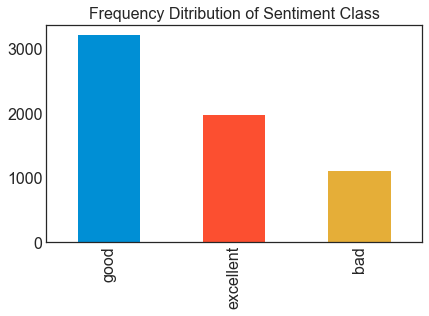

In [18]:
hotels['Sentiment'].value_counts().plot.bar(title="Frequency Ditribution of Sentiment Class")

#### From the above distribution given hotels are having 3000+ Good Ratings, nearly 2000 Excellent ratings and about 1000 bad ratings. There seems to be no Data Imbalance here

<a id='date'></a>
### Task 1.3 Feature Engineering With Date Column

#### Just extracting Date column for the analysis

In [19]:
dates = hotels['Date']

In [20]:
dates.head()

0   2007-11-16
1   2007-10-30
2   2007-10-12
3   2007-08-31
4   2007-07-18
Name: Date, dtype: datetime64[ns]

#### Feature Engineering the Date and getting new values like quarter, month, week, day from it

In [21]:
date_expanded = pd.DataFrame({"year": dates.dt.year,
              "month": dates.dt.month,
              "dayofmonth": dates.dt.day,
              "dayofyear": dates.dt.dayofyear,
              "week": dates.dt.week,
              "weekofyear": dates.dt.weekofyear,
              "dayofweek": dates.dt.dayofweek,
              "weekday": dates.dt.weekday,
              "quarter": dates.dt.quarter,
             })

In [22]:
date_expanded.head()

year  month  dayofmonth  dayofyear  week  weekofyear  dayofweek  weekday  \
0  2007     11          16        320    46          46          4        4   
1  2007     10          30        303    44          44          1        1   
2  2007     10          12        285    41          41          4        4   
3  2007      8          31        243    35          35          4        4   
4  2007      7          18        199    29          29          2        2   

   quarter  
0        4  
1        4  
2        4  
3        3  
4        3

In [23]:
date_expanded['quarter'] = date_expanded['quarter'].map({1: 'Quarter 1', 2: "Quarter 2", 3:'Quarter 3', 4: 'Quarter 4'})
date_expanded['month'] = date_expanded['month'].map({1: 'Jan', 2: "Feb", 3:'Mar', 4: 'Apr',5: 'May', 6: "Jun", 7:'Jul', 8: 'Aug',9: 'Sep', 10: "Oct", 11:'Nov', 12: 'Dec'})
date_expanded['dayofweek'] = date_expanded['dayofweek'].map({0: 'Monday', 1: "Tuesday", 2:'Wednesday', 4: 'Thursday',5: 'Friday', 6: "Saturday", 7:'Sunday'})

In [24]:
date_expanded.head()

year month  dayofmonth  dayofyear  week  weekofyear  dayofweek  weekday  \
0  2007   Nov          16        320    46          46   Thursday        4   
1  2007   Oct          30        303    44          44    Tuesday        1   
2  2007   Oct          12        285    41          41   Thursday        4   
3  2007   Aug          31        243    35          35   Thursday        4   
4  2007   Jul          18        199    29          29  Wednesday        2   

     quarter  
0  Quarter 4  
1  Quarter 4  
2  Quarter 4  
3  Quarter 3  
4  Quarter 3

<a id='trend'></a>
### Task 1.4 : Visualizing the trend of reviews over the time

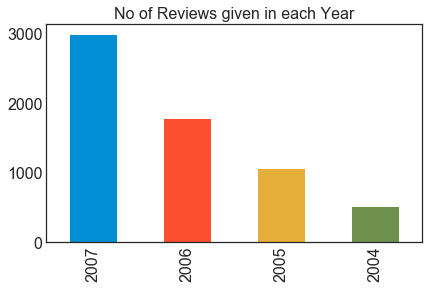

In [25]:
date_expanded['year'].value_counts().plot.bar(title="No of Reviews given in each Year")

#### In the year 2007 there are more no of reviews given and 2004 is least. Reviews are in descending order from 2007 to 2004

#### Let us look at the No of Reviews given each quarter for all the years

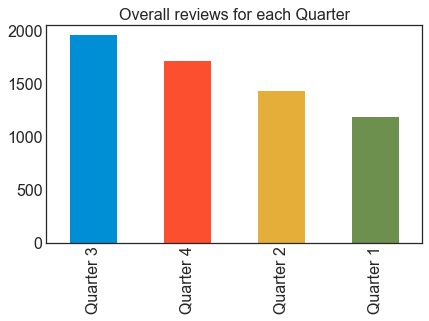

In [26]:
date_expanded['quarter'].value_counts().plot.bar(title= "Overall reviews for each Quarter")

#### Quarter 3 has more no of reviews means more visits to hotel, and Quarter 1 has less no of reviews

#### A look at the no of reviews given for each month across all the years

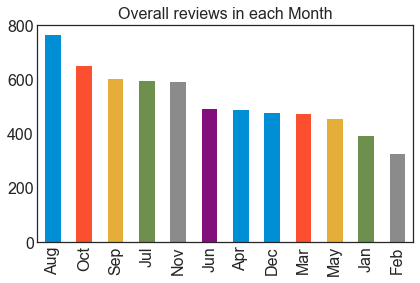

In [27]:
date_expanded['month'].value_counts().plot.bar(title= "Overall reviews in each Month")

#### August month has more no of reviews followed by October where as Feb and Jan months has the least no of reviews

#### Let's check the review trend for weeks in all the years

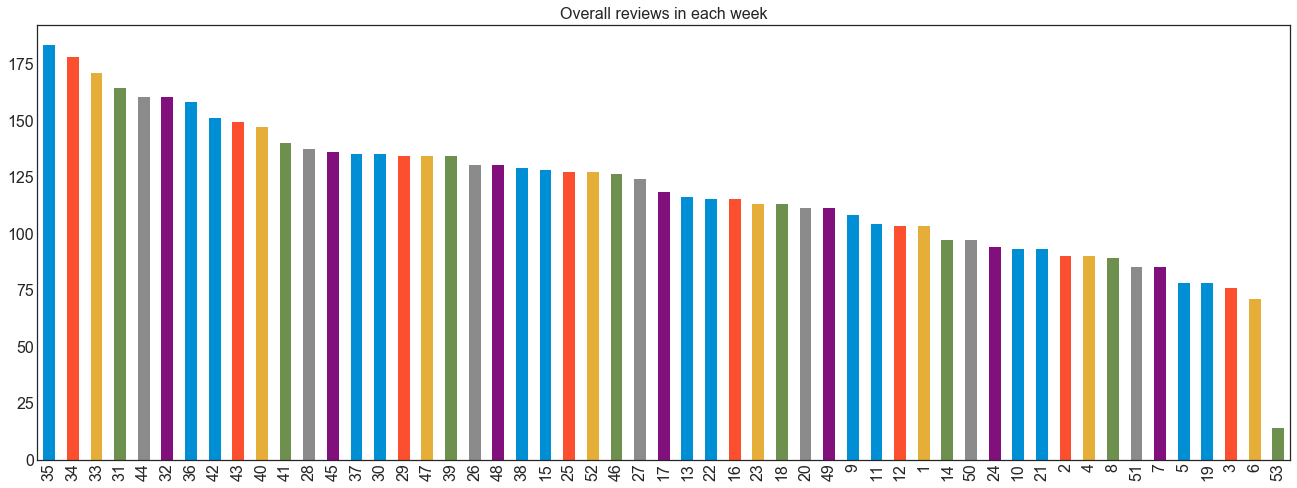

In [28]:
date_expanded['week'].value_counts().plot.bar(title= "Overall reviews in each week",figsize = (20,8))

#### Week 35,33,34 and31 in the calender year has more no of reviews, and those weeks belongs to August month in 2004,2005,2006 and in 2007.. So again we can confirm that more no of reviews in August month

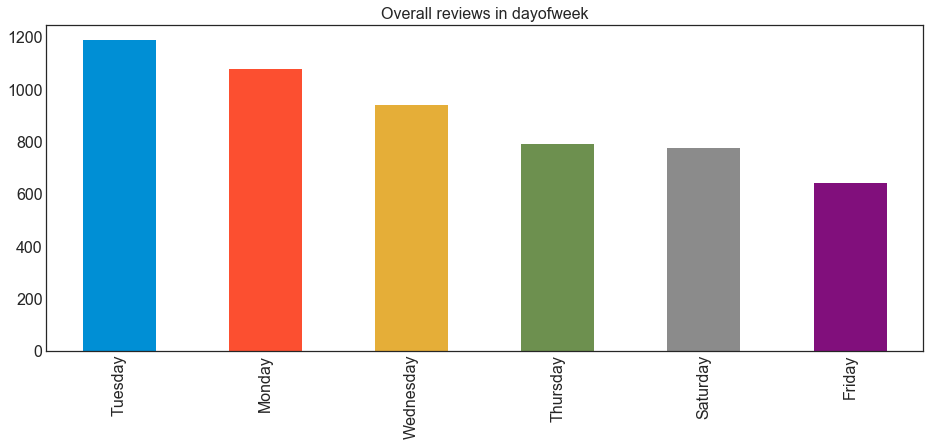

In [29]:
date_expanded['dayofweek'].value_counts().plot.bar(title= "Overall reviews in dayofweek", figsize = (14,6))

#### There are no reviews on Sunday

### Let us look at the Day wise reviews in a month for all the years

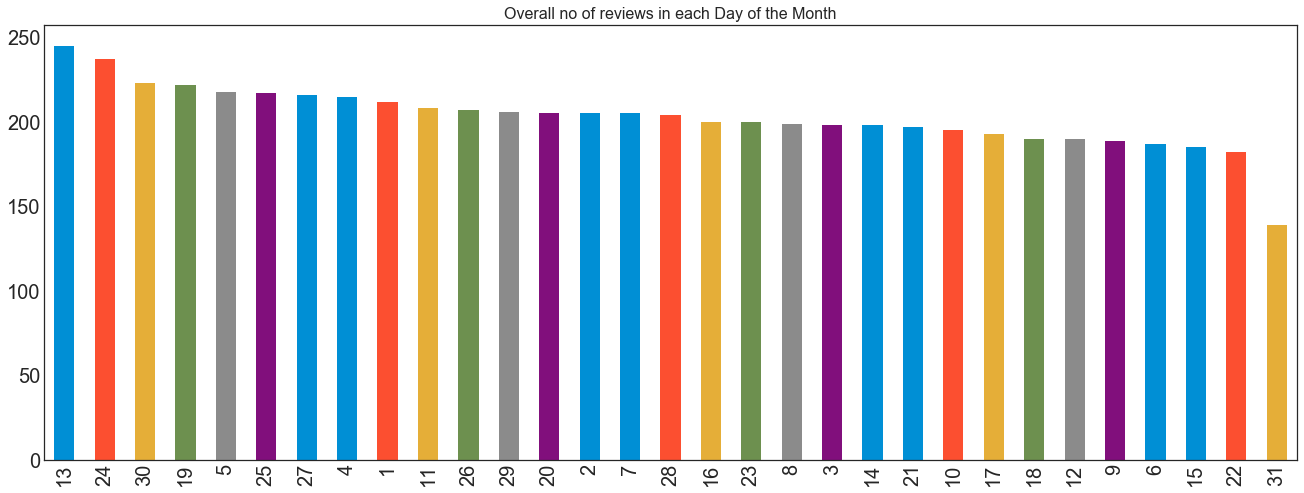

In [30]:
date_expanded['dayofmonth'].value_counts().plot.bar(title="Overall no of reviews in each Day of the Month", figsize = (20,8), fontsize = 20)

In [31]:
date_new = date_expanded['dayofyear'].value_counts().head(20)

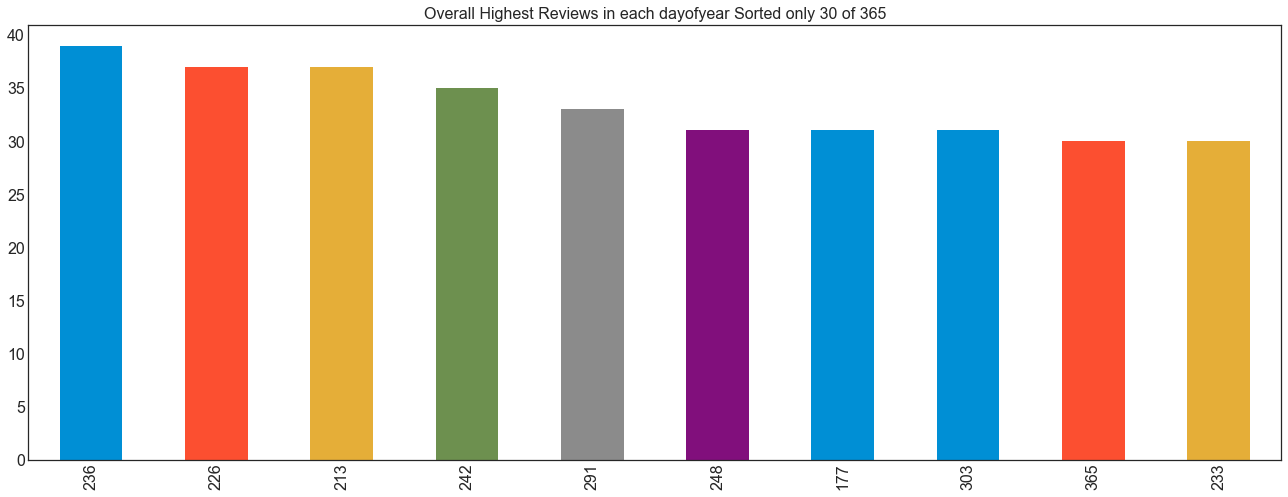

In [32]:
date_expanded['dayofyear'].value_counts().head(10).plot.bar(title= "Overall Highest Reviews in each dayofyear Sorted only 30 of 365",figsize = (20,8))

#### Again 236th day, 226th day are falls in August month, maximum reviews are 40

#### Let us have a look at the review ditribution in each day of the year with least count

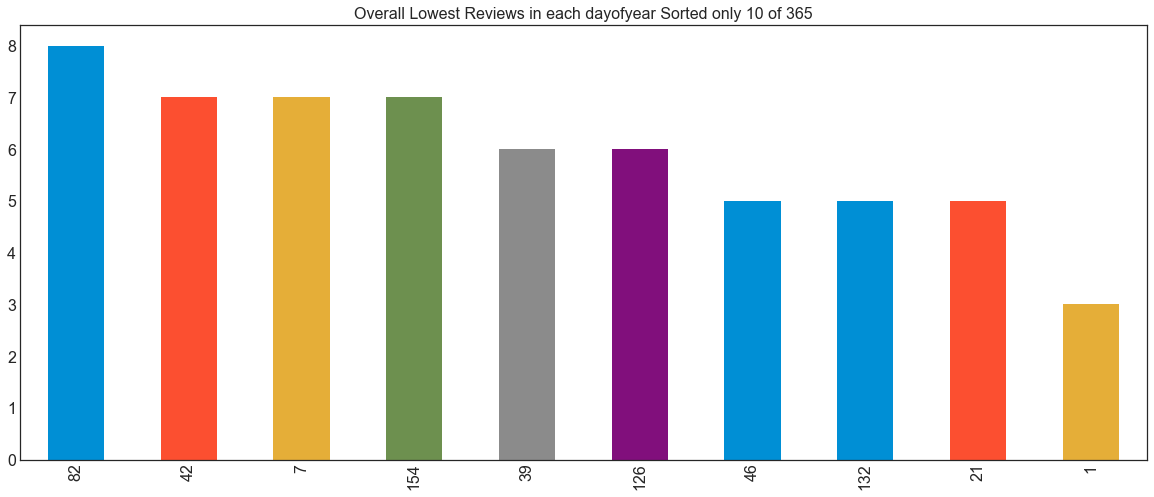

In [33]:
date_expanded['dayofyear'].value_counts().tail(10).plot.bar(title= "Overall Lowest Reviews in each dayofyear Sorted only 10 of 365",figsize = (18,8))

#### Its not suprise that Starting day of the year Jan 1st having very less no of reviews across all the years

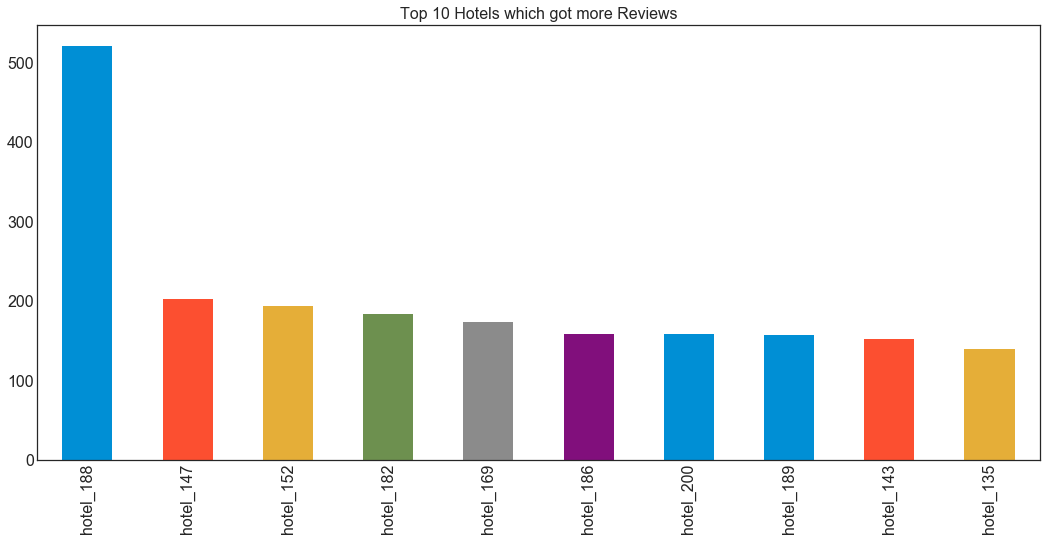

In [34]:
hotels['Hotelid'].value_counts().head(10).plot.bar(title= "Top 10 Hotels which got more Reviews",figsize = (16,8))

#### Hotel with HotelID 188 got more no of reviews above 500

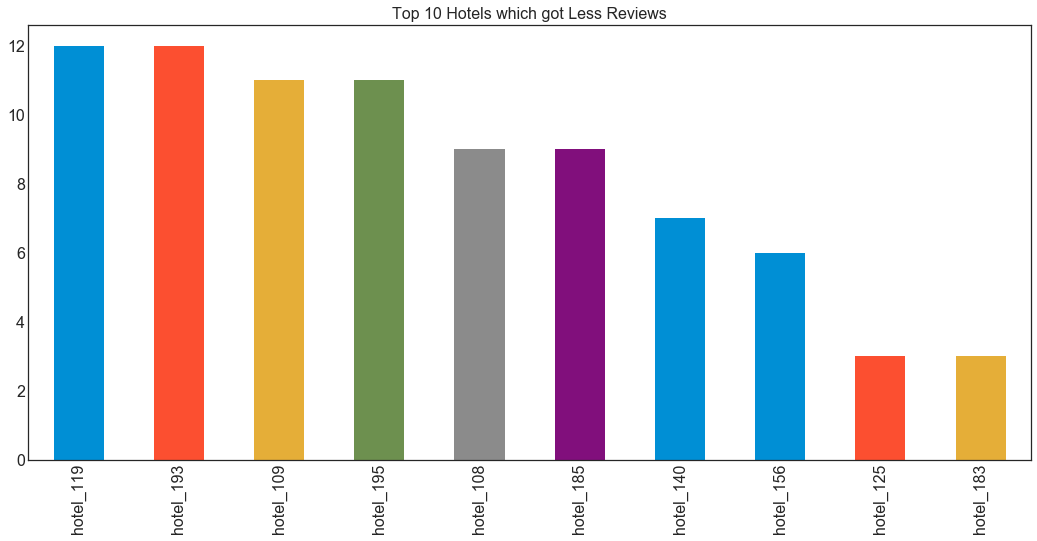

In [35]:
hotels['Hotelid'].value_counts().tail(10).plot.bar(title= "Top 10 Hotels which got Less Reviews",figsize = (16,8))

#### Hotel with HotelID 183 and 123 got less no of reviews , only 2

#### Let us combine the Date_expanded with hotels data for further undersating

In [36]:
hotels = pd.concat([hotels, date_expanded], axis=1)

#### Year Wise Reviews vs Sentiment

In [37]:
yearwise_reviews = pd.crosstab(index=hotels["Sentiment"], 
                           columns=hotels["year"])
yearwise_reviews

year       2004  2005  2006  2007
Sentiment                        
bad          64   157   314   568
excellent   160   342   528   941
good        272   541   931  1469

#### Quarter Wise Reviews Vs Sentiment

In [38]:
quarterwise_reviews = pd.crosstab(index=hotels["Sentiment"], 
                           columns=hotels["quarter"])
quarterwise_reviews

quarter    Quarter 1  Quarter 2  Quarter 3  Quarter 4
Sentiment                                            
bad              228        226        324        325
excellent        368        434        658        511
good             592        770        974        877

#### Month Wise Reviews Vs Sentiment

In [39]:
monthwise_reviews = pd.crosstab(index=hotels["Sentiment"], 
                           columns=hotels["month"])
monthwise_reviews

month      Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
Sentiment                                                            
bad         72  109   91   56   82   95   79   90   75  105  129  120
excellent  150  267  145  100  123  212  150  145  134  179  187  179
good       266  387  238  170  186  287  261  236  243  305  334  300

#### Week Wise Reviews Vs Sentiment

In [40]:
pd.options.display.max_columns = None

In [41]:
weekwise_reviews = pd.crosstab(index=hotels["Sentiment"], 
                           columns=hotels["week"])
weekwise_reviews

week       1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
Sentiment                                                                       
bad        18  16  16  22  11  16  15  16  19  23  13  19  23  11  17  21  22   
excellent  28  32  27  25  23  26  16  35  27  26  33  32  44  33  37  37  32   
good       57  42  33  43  44  29  54  38  62  44  58  52  49  53  74  57  64   

week       18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  \
Sentiment                                                                       
bad        10  16  22  16  21  20  11  17  25  16  23  21  25  19  21  27  29   
excellent  39  29  29  19  39  25  30  40  45  44  47  48  52  70  54  55  61   
good       64  33  60  58  55  68  53  70  60  64  67  65  58  75  85  89  88   

week       35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  \
Sentiment                                                                       
bad        28  20  32  28  34  27  27  32  32  27  29  26  17  21  24  21  12   
excellent  58  51  36  30  44  40  39  53  41  48  33  38  41  47  32  27  29   
good       97  87  67  71  56  80  74  66  76  85  74  62  76  62  55  49  44   

week       52  53  
Sentiment          
bad        26   3  
excellent  42   3  
good       59   8

#### Day Wise Reviews Vs Sentiment

In [42]:
dayofmonthwise_reviews = pd.crosstab(index=hotels["Sentiment"], 
                           columns=hotels["dayofmonth"])
dayofmonthwise_reviews

dayofmonth   1   2    3    4    5    6    7    8   9    10  11  12   13   14  \
Sentiment                                                                      
bad          32  35   36   36   36   33   27   36  34   35  48  35   49   34   
excellent    74  80   61   62   74   54   71   54  62   56  70  56   62   61   
good        106  90  101  117  108  100  107  109  93  104  90  99  134  103   

dayofmonth   15   16   17  18   19   20   21   22  23   24   25   26   27  28  \
Sentiment                                                                       
bad          26   33   35  33   38   44   31   20  44   45   41   47   33  42   
excellent    54   60   56  58   77   60   64   62  62   66   68   59   66  70   
good        105  107  102  99  107  101  102  100  94  126  108  101  117  92   

dayofmonth   29   30  31  
Sentiment                 
bad          32   31  22  
excellent    73   80  39  
good        101  112  78

In [43]:
dayofyearwise_reviews = pd.crosstab(index=hotels["Sentiment"], 
                           columns=hotels["dayofyear"])
dayofyearwise_reviews

dayofyear  1    2    3    4    5    6    7    8    9    10   11   12   13   \
Sentiment                                                                    
bad          1    6    6    2    3    1    0    5    1    2    1    2    3   
excellent    0    6    7    5    2    3    2    7    6    7    4    5    2   
good         2    8    6   13    9    7    5    3    5    6    4    5    8   

dayofyear  14   15   16   17   18   19   20   21   22   23   24   25   26   \
Sentiment                                                                    
bad          3    4    0    3    3    3    4    0    1    3    3    4    6   
excellent    6    4    3    4    6    3    1    2    4    5    4    4    4   
good         9    4    7    3    5    5    5    3    8    5   10    7    6   

dayofyear  27   28   29   30   31   32   33   34   35   36   37   38   39   \
Sentiment                                                                    
bad          2    3    2    4    1    1    0    0    1    3    3    3    1   
excellent    3    2    5    4    3    1    7    2    3    4    3    6    4   
good         4    4    8    7    5    6    4    7    6    7    5    3    1   

dayofyear  40   41   42   43   44   45   46   47   48   49   50   51   52   \
Sentiment                                                                    
bad          3    2    2    1    6    2    1    3    2    2    2    1    2   
excellent    3    1    2    1    4    2    3    3    2    3    6    4    6   
good         6    5    3   15   10    7    1    8   10    3    6    5    8   

dayofyear  53   54   55   56   57   58   59   60   61   62   63   64   65   \
Sentiment                                                                    
bad          4    4    0    1    2    0    4    2    5    2    4    3    2   
excellent    1    5    7    6    1    3    7    4    5    5    1    4    3   
good         6    6    5    3    9   10    5    3   11   12    7    7   10   

dayofyear  66   67   68   69   70   71   72   73   74   75   76   77   78   \
Sentiment                                                                    
bad          4    2    2    1    7    3    3    3    2    2    0    1    2   
excellent    4    6    2    3    4    2    5    4    1    6    6    6    7   
good         7    8    4    6    4    9   12    8   11    4    7    6   11   

dayofyear  79   80   81   82   83   84   85   86   87   88   89   90   91   \
Sentiment                                                                    
bad          3    1    2    3    7    3    4    2    6    4    2    3    1   
excellent    4    7    4    3    3    7    8    5   10    4    5    7    6   
good         9    9    4    2    8   10    7   12    8    4    7    7    9   

dayofyear  92   93   94   95   96   97   98   99   100  101  102  103  104  \
Sentiment                                                                    
bad          2    3    3    1    1    1    1    1    3    4    1    4    2   
excellent    4    3    4    8    2    3    7    4    7   11    4    8    2   
good         5   14    3    9    7    5    9    6   14   13    7   11    8   

dayofyear  105  106  107  108  109  110  111  112  113  114  115  116  117  \
Sentiment                                                                    
bad          2    3    2    2    4    4    4    0    4    4    1    6    0   
excellent    3    4    6    3    8    4    4    6    3    5    6    6    2   
good        11    8   12    9    7   10    8    9    9   13   11    6    7   

dayofyear  118  119  120  121  122  123  124  125  126  127  128  129  130  \
Sentiment                                                                    
bad          4    2    2    2    2    3    1    2    0    1    3    2    4   
excellent    5    6    6    5    6    7    9    6    2    3    2    4    5   
good         8   12    8   12   10    4   10    7    4    5    8    3    8   

dayofyear  131  132  133  134  135  136  137  138  139  140  141  142  143  \
Sentiment   

In [44]:
hotels.head(1)

Reviewid    Hotelid      userid       Date  \
0  Review_1  hotel_101  hotel_1608 2007-11-16   

                                    reviewtext Sentiment  year month  \
0  Nice Marriot       View of my king bed room      good  2007   Nov   

   dayofmonth  dayofyear  week  weekofyear dayofweek  weekday    quarter  
0          16        320    46          46  Thursday        4  Quarter 4

#### Let us visualize the above obtained results

Text(0,0.5,'No Of Reviews')

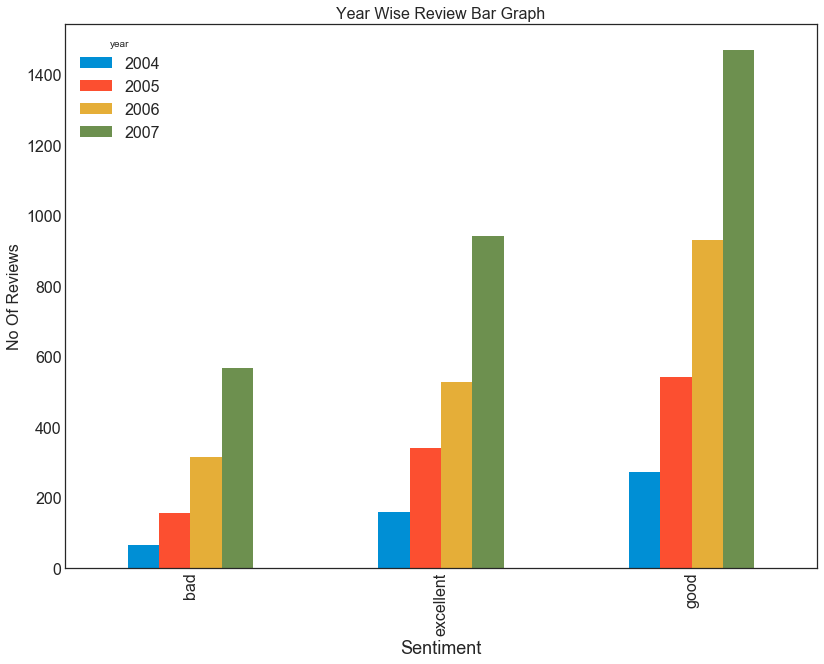

In [45]:
yearwise_reviews.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Year Wise Review Bar Graph" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

#### From the above bar graph of year wise reviews the sentiment is unifrom in all the years

#### Visualising the Quarter Wise reviews Vs Sentiment

Text(0,0.5,'No Of Reviews')

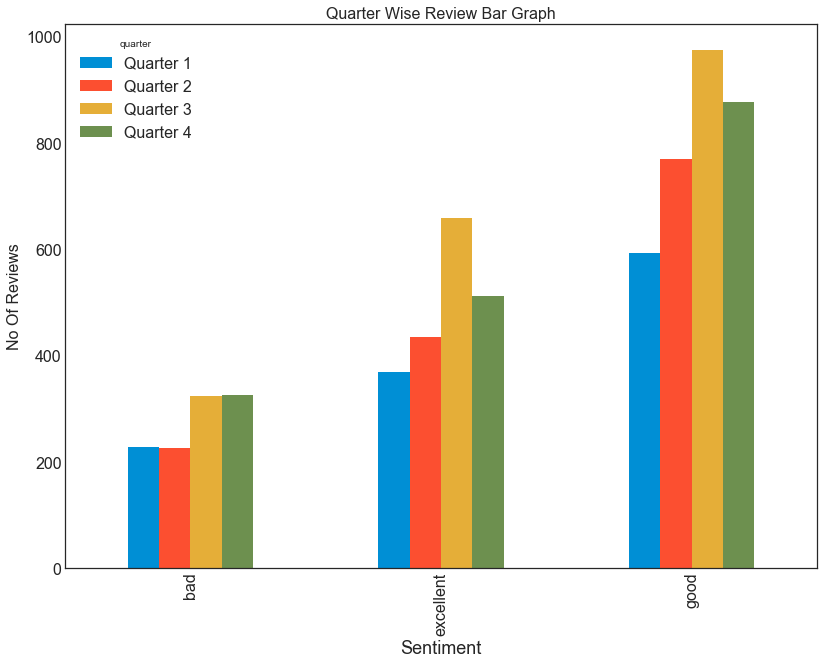

In [46]:
quarterwise_reviews.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Quarter Wise Review Bar Graph" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

#### Visulising the month wise reviews vs Sentiment

Text(0,0.5,'No Of Reviews')

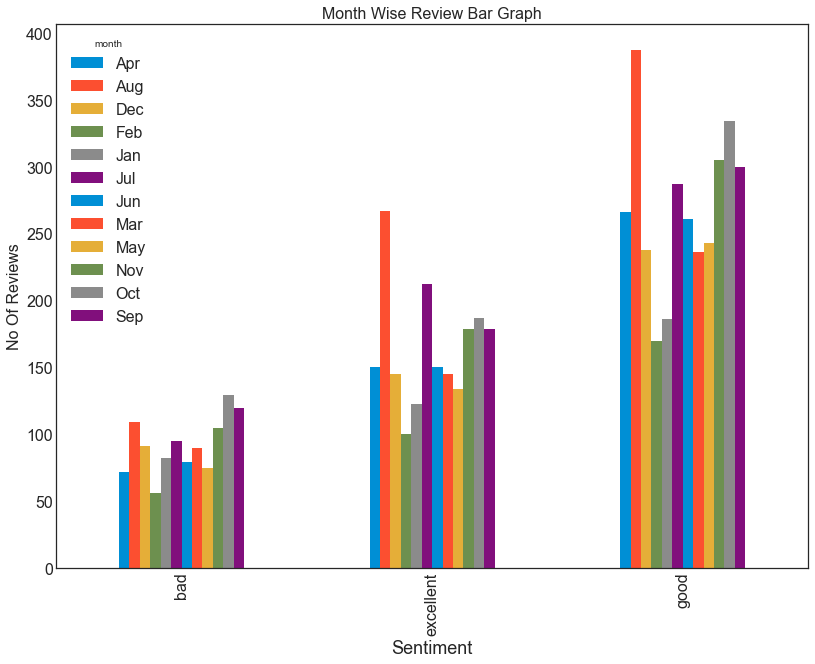

In [47]:
monthwise_reviews.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Month Wise Review Bar Graph" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

#### From the Quarter Wise Reviews we observed the 3rd Quarter is having more no of reviews

#### Let us seperate Quarter and Month 

In [48]:
quarter_month = pd.crosstab(index=hotels["Sentiment"], 
                             columns=[hotels["quarter"],
                                      hotels["month"]]
                             )   # Include row and column totals

quarter_month

quarter   Quarter 1           Quarter 2           Quarter 3            \
month           Feb  Jan  Mar       Apr  Jun  May       Aug  Jul  Sep   
Sentiment                                                               
bad              56   82   90        72   79   75       109   95  120   
excellent       100  123  145       150  150  134       267  212  179   
good            170  186  236       266  261  243       387  287  300   

quarter   Quarter 4            
month           Dec  Nov  Oct  
Sentiment                      
bad              91  105  129  
excellent       145  179  187  
good            238  305  334

In [49]:
# Pulling out the third Quarter
quarter_month['Quarter 3']

month      Aug  Jul  Sep
Sentiment               
bad        109   95  120
excellent  267  212  179
good       387  287  300

In [50]:
high_month = quarter_month['Quarter 3']

Text(0,0.5,'No Of Reviews for 3rd Qaurter')

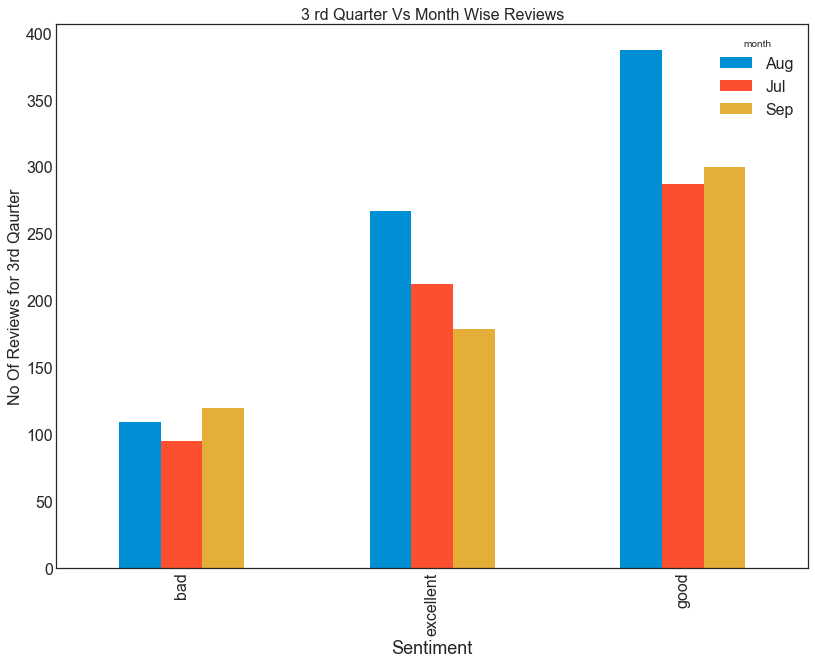

In [51]:
high_month.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "3 rd Quarter Vs Month Wise Reviews" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews for 3rd Qaurter', fontsize=16)

In [52]:
low_month = quarter_month['Quarter 1']

In [53]:
low_month

month      Feb  Jan  Mar
Sentiment               
bad         56   82   90
excellent  100  123  145
good       170  186  236

Text(0,0.5,'No Of Reviews for 1st Qaurter')

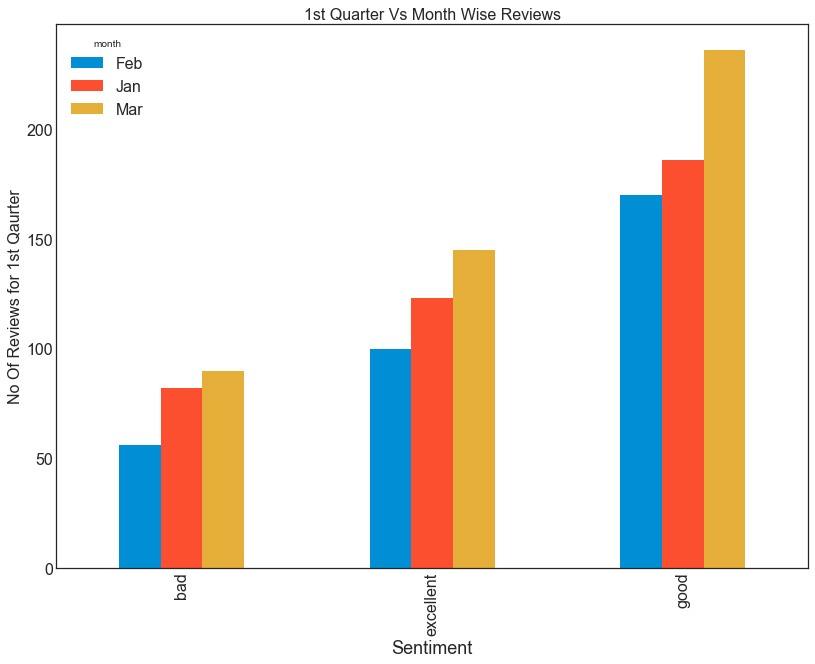

In [54]:
low_month.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "1st Quarter Vs Month Wise Reviews" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews for 1st Qaurter', fontsize=16)

#### Year  Vs Quarter Vs Sentiment

In [55]:
quarter_year = pd.crosstab(index=hotels["Sentiment"], 
                             columns=[hotels["year"],
                                      hotels["quarter"]]
                             )   # Include row and column totals

quarter_year

year           2004                                    2005            \
quarter   Quarter 1 Quarter 2 Quarter 3 Quarter 4 Quarter 1 Quarter 2   
Sentiment                                                               
bad              17        13        15        19        34        34   
excellent        20        39        47        54        70        94   
good             37        58        94        83       114       152   

year                               2006                                \
quarter   Quarter 3 Quarter 4 Quarter 1 Quarter 2 Quarter 3 Quarter 4   
Sentiment                                                               
bad              39        50        57        51       107        99   
excellent       115        63        96        89       178       165   
good            146       129       158       197       302       274   

year           2007                                
quarter   Quarter 1 Quarter 2 Quarter 3 Quarter 4  
Sentiment                                          
bad             120       128       163       157  
excellent       182       212       318       229  
good            283       363       432       391

In [56]:
quarter_2004 = quarter_year[2004]

Text(0,0.5,'No Of Reviews')

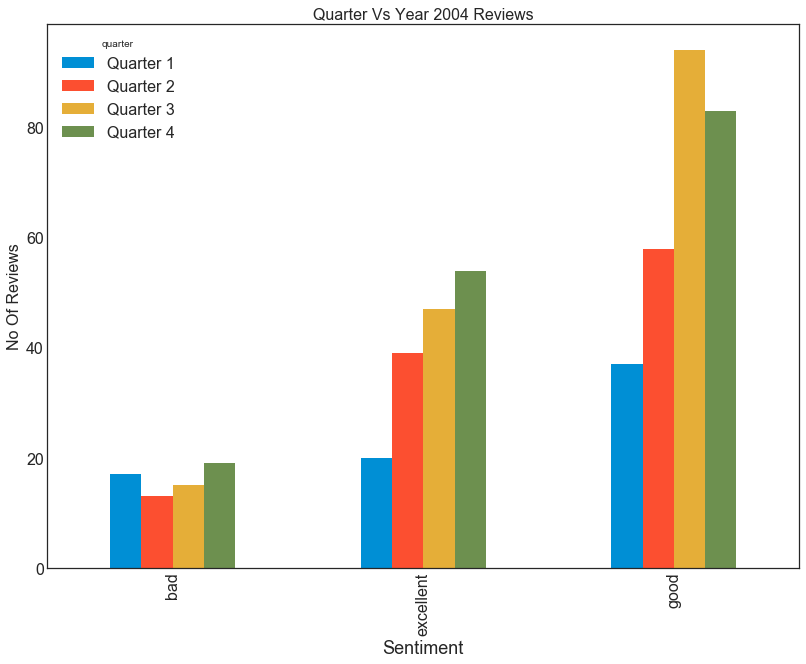

In [57]:
quarter_2004 = quarter_year[2004]
quarter_2004.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Quarter Vs Year 2004 Reviews" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

### Let us plot all the year wise and Quarter Wise Vs thier Sentiment

Text(0,0.5,'No Of Reviews')

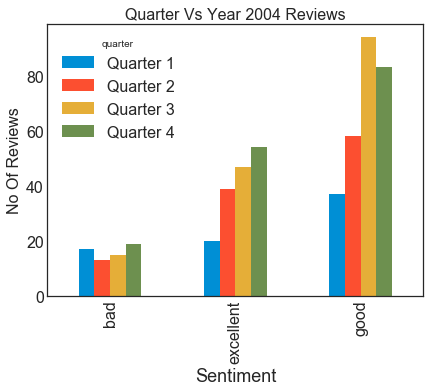

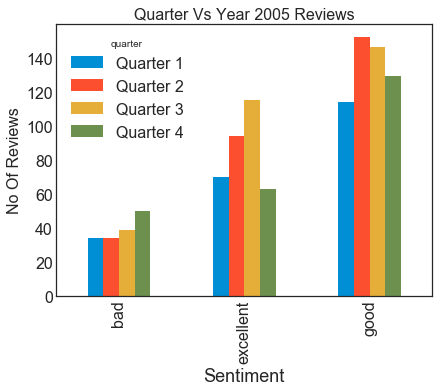

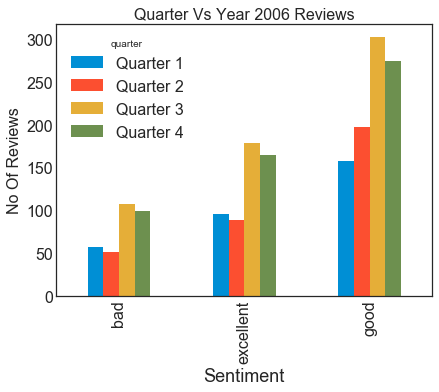

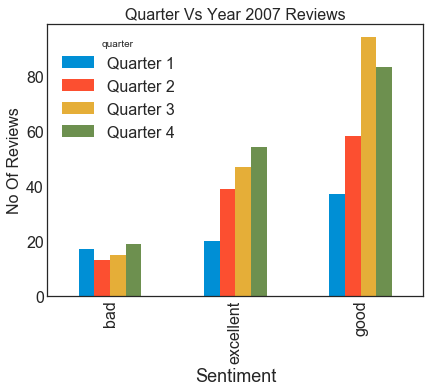

In [58]:
quarter_2004 = quarter_year[2004]
quarter_2004.plot(kind="bar", 
                 figsize=(6,5),
                 stacked=False, title= "Quarter Vs Year 2004 Reviews" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)
plt.subplot


quarter_2005 = quarter_year[2005]
quarter_2005.plot(kind="bar", 
                 figsize=(6,5),
                 stacked=False, title= "Quarter Vs Year 2005 Reviews" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

quarter_2006 = quarter_year[2006]
quarter_2006.plot(kind="bar", 
                 figsize=(6,5),
                 stacked=False, title= "Quarter Vs Year 2006 Reviews" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

quarter_2007 = quarter_year[2007]
quarter_2004.plot(kind="bar", 
                 figsize=(6,5),
                 stacked=False, title= "Quarter Vs Year 2007 Reviews" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

In [59]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

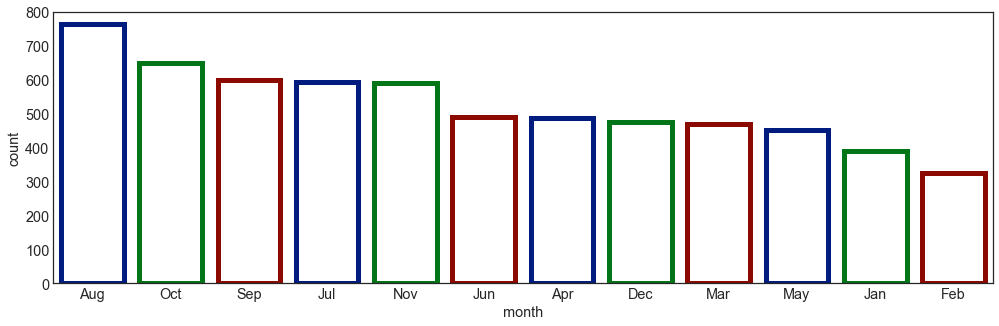

In [60]:
sns.countplot(x='month',data=hotels,facecolor=(0, 0, 0, 0),
                    linewidth=5,
                  edgecolor=sns.color_palette("dark", 3),
             order = hotels['month'].value_counts().index)

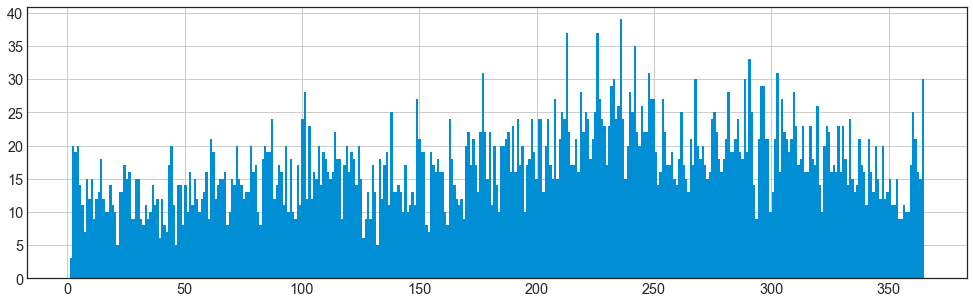

In [61]:
hotels['dayofyear'].hist(bins=365)


### Year 2007, Quarter 3 and August month having High number of reviews <br> Year 2004, Quarter 1 and January are having less no of reviews


#### Year Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Precentage Distribution

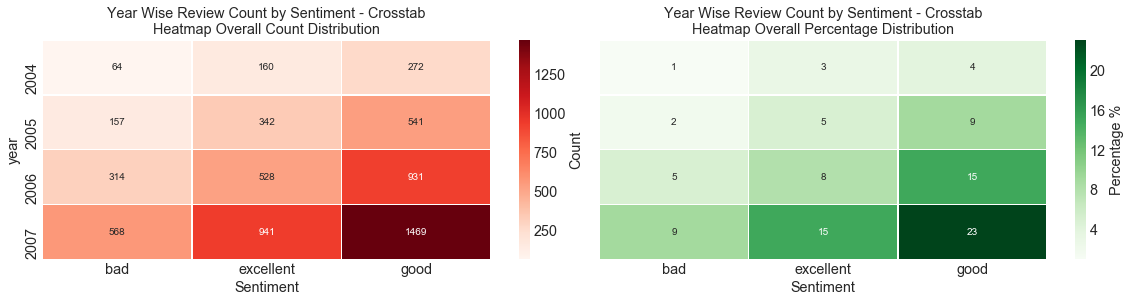

In [62]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(hotels['year'], hotels["Sentiment"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Year Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(hotels['year'], hotels["Sentiment"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Year Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

#### Year Wise Review Count by Sentiment - Crosstab\nHeatmap % Distribution by Index

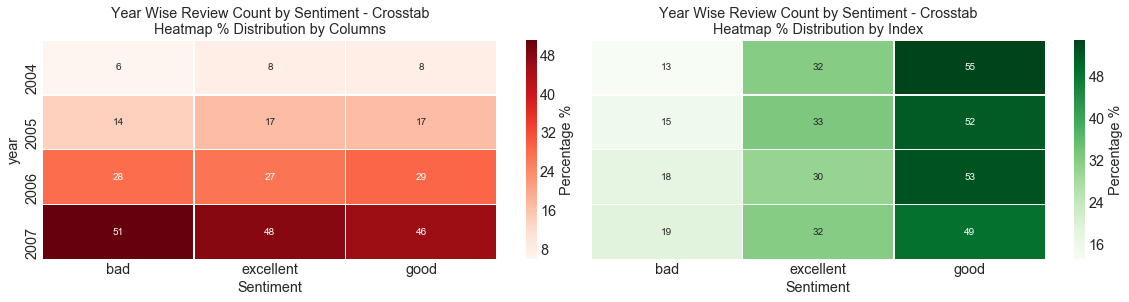

In [63]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(hotels['year'], hotels["Sentiment"], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Percentage %'})
ax[0].set_title('Year Wise Review Count by Sentiment - Crosstab\nHeatmap % Distribution by Columns')

sns.heatmap(pd.crosstab(hotels['year'], hotels["Sentiment"], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Year Wise Review Count by Sentiment - Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

#### Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Percentage Distribution

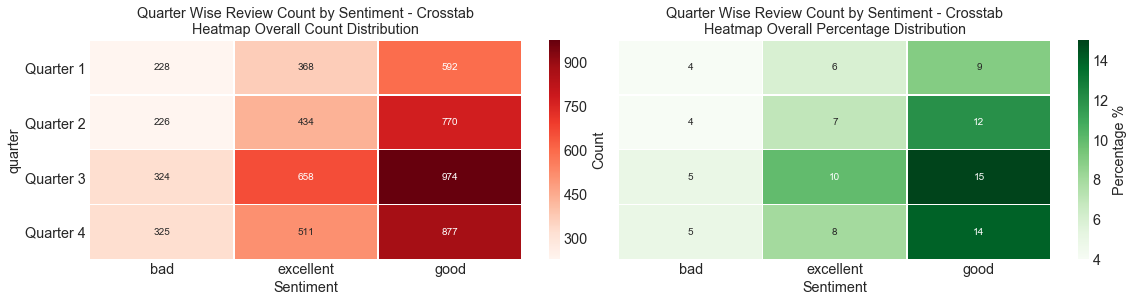

In [64]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(hotels['quarter'], hotels["Sentiment"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(hotels['quarter'], hotels["Sentiment"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

#### Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap % Distribution by Index

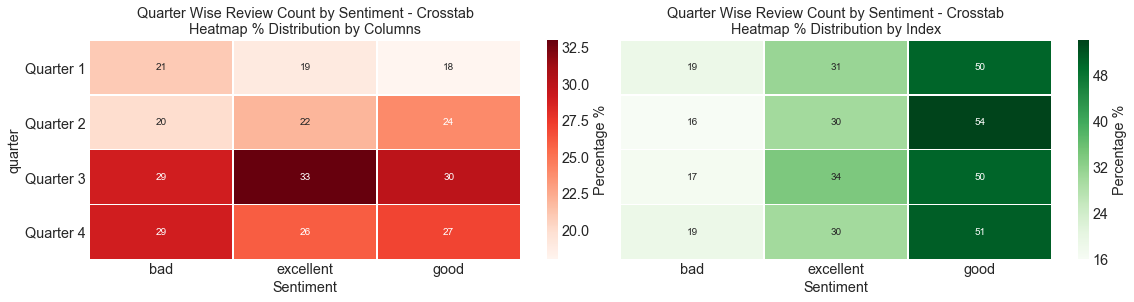

In [65]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(hotels['quarter'], hotels["Sentiment"], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Percentage %'})
ax[0].set_title('Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap % Distribution by Columns')

sns.heatmap(pd.crosstab(hotels['quarter'], hotels["Sentiment"], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Quarter Wise Review Count by Sentiment - Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

### Checking the hotel having High Reviews

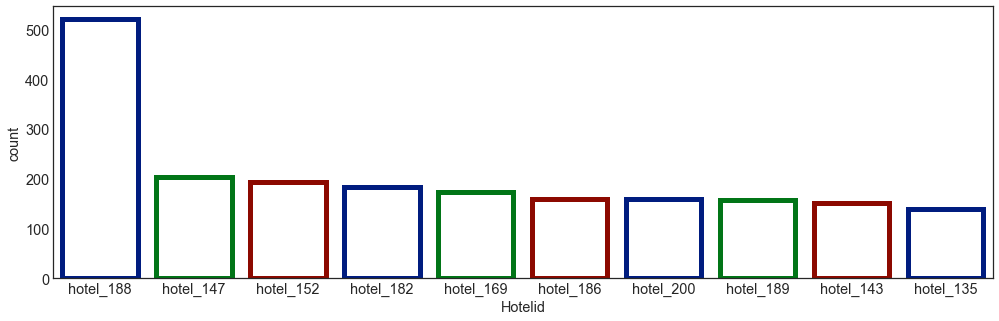

In [66]:
sns.countplot(x='Hotelid',data=hotels,facecolor=(0, 0, 0, 0),
                    linewidth=5,
                  edgecolor=sns.color_palette("dark", 3),
             order = hotels['Hotelid'].value_counts().head(10).index)

#### hotel_188 is having more number of reviews, Lets see hotel_188 Sentiment distribution

In [67]:
hotelid_sentiment = pd.crosstab(index=hotels["Sentiment"], 
                             columns=[hotels["Hotelid"]])   # Include row and column totals

hotelid_sentiment

Hotelid    hotel_101  hotel_102  hotel_103  hotel_104  hotel_105  hotel_106  \
Sentiment                                                                     
bad                5          6          8         10          6          6   
excellent          6         20         18         11          7          7   
good              15         37         20         26         17         18   

Hotelid    hotel_107  hotel_108  hotel_109  hotel_110  hotel_111  hotel_112  \
Sentiment                                                                     
bad                3          4          2          6         12          5   
excellent          5          0          1          2          5          8   
good              10          5          8         21          6         12   

Hotelid    hotel_113  hotel_114  hotel_115  hotel_116  hotel_117  hotel_118  \
Sentiment                                                                     
bad                3          5          3          8          2         23   
excellent          3          2         48          1          4         33   
good              17         11         11          6         12         78   

Hotelid    hotel_119  hotel_120  hotel_121  hotel_122  hotel_123  hotel_124  \
Sentiment                                                                     
bad                6          6          0          4         10          8   
excellent          1         21         11         17         36          2   
good               5         26          4         15         54         12   

Hotelid    hotel_125  hotel_126  hotel_127  hotel_128  hotel_129  hotel_130  \
Sentiment                                                                     
bad                2          5         38         12         11         15   
excellent          0          4         28         17          8         48   
good               1         16         56         34         23         67   

Hotelid    hotel_131  hotel_132  hotel_133  hotel_134  hotel_135  hotel_136  \
Sentiment                                                                     
bad               22          5         13         36          9         12   
excellent          0          1         13          4         65         36   
good               5         15         42         30         65         68   

Hotelid    hotel_137  hotel_138  hotel_139  hotel_140  hotel_141  hotel_142  \
Sentiment                                                                     
bad                8         18          8          6         17          7   
excellent          5          5         25          1         33         26   
good              20         47         34          0         85         35   

Hotelid    hotel_143  hotel_144  hotel_145  hotel_146  hotel_147  hotel_148  \
Sentiment                                                                     
bad               23         16          8         18          8         23   
excellent         45         20         32         55        106          0   
good              84         67         45         64         89          3   

Hotelid    hotel_149  hotel_150  hotel_151  hotel_152  hotel_153  hotel_154  \
Sentiment                                                                     
bad                9         25          8         54          5          3   
excellent         15         14         13         44          8          1   
good              48         72         31         96         28         10   

Hotelid    hotel_155  hotel_156  hotel_157  hotel_158  hotel_159  hotel_160  \
Sentiment                                                                     
bad               18          0         21         13          8         10   
excellent          3          1         18         21          7          5   
good              14          5         40         45         23         10   

Hotelid    hotel_161  hotel_162  hotel_1

In [68]:
hotel_188 = hotelid_sentiment['hotel_188']

In [69]:
hotel_188

Sentiment
bad           38
excellent    239
good         244
Name: hotel_188, dtype: int64

Text(0,0.5,'No Of Reviews')

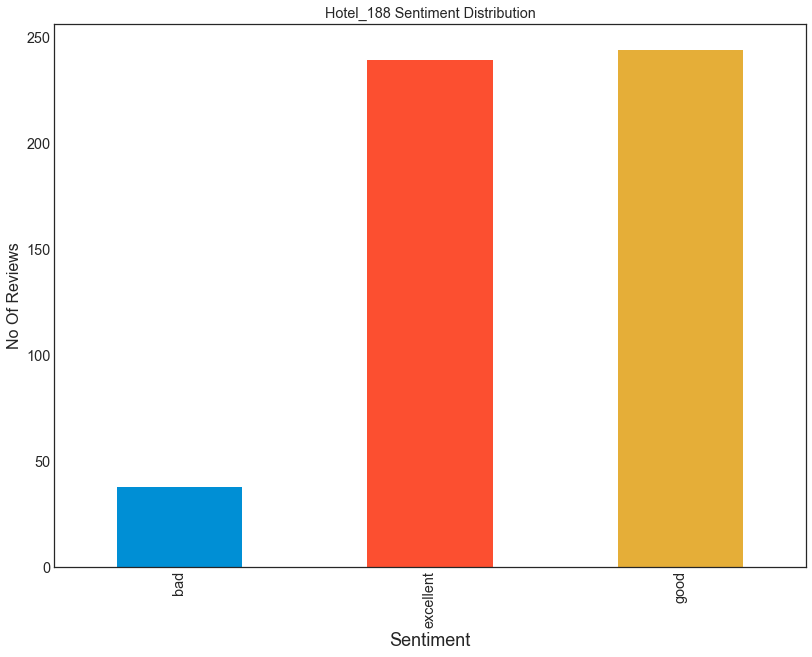

In [70]:
hotel_188.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Hotel_188 Sentiment Distribution" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

#### hotel_188 having more number of Good and Excellent ratings

### Let us look at the hotelid_188 year wise Sentiment Distribution

In [71]:
hotelid_year_sentiment = pd.crosstab(index=hotels["Sentiment"], 
                             columns=[hotels["Hotelid"],hotels['year']])   # Include row and column totals

hotelid_year_sentiment

Hotelid   hotel_101           hotel_102                hotel_103            \
year           2005 2006 2007      2004 2005 2006 2007      2005 2006 2007   
Sentiment                                                                    
bad               2    1    2         0    1    1    4         1    3    4   
excellent         0    2    4         2    4    4   10         1    8    9   
good              1    4   10         1    2   20   14         7    4    9   

Hotelid   hotel_104                hotel_105                hotel_106       \
year           2004 2005 2006 2007      2004 2005 2006 2007      2004 2005   
Sentiment                                                                    
bad               0    0    4    6         0    3    2    1         0    1   
excellent         0    1    1    9         2    1    0    4         1    2   
good              2    6   10    8         1    4    1   11         0    1   

Hotelid             hotel_107                hotel_108           hotel_109  \
year      2006 2007      2004 2005 2006 2007      2005 2006 2007      2005   
Sentiment                                                                    
bad          3    2         1    0    0    2         1    1    2         0   
excellent    2    2         0    2    0    3         0    0    0         0   
good         8    9         0    5    2    3         1    0    4         2   

Hotelid             hotel_110                hotel_111                 \
year      2006 2007      2004 2005 2006 2007      2004 2005 2006 2007   
Sentiment                                                               
bad          1    1         0    0    3    3         1    1    3    7   
excellent    1    0         0    1    1    0         0    2    1    2   
good         2    4         2    8    5    6         1    1    4    0   

Hotelid   hotel_112                hotel_113                hotel_114       \
year           2004 2005 2006 2007      2004 2005 2006 2007      2004 2005   
Sentiment                                                                    
bad               0    1    2    2         1    0    1    1         1    3   
excellent         0    0    2    6         0    1    1    1         0    1   
good              2    2    5    3         0    0    6   11         2    2   

Hotelid             hotel_115                hotel_116           hotel_117  \
year      2006 2007      2004 2005 2006 2007      2005 2006 2007      2004   
Sentiment                                                                    
bad          0    1         0    0    2    1         1    2    5         0   
excellent    1    0         3    6   14   25         0    1    0         0   
good         4    3         1    1    3    6         0    3    3         1   

Hotelid                  hotel_118                hotel_119                 \
year      2005 2006 2007      2004 2005 2006 2007      2004 2005 2006 2007   
Sentiment                                                                    
bad          0    1    1         1    2   10   10         1    1    1    3   
excellent    4    0    0         1    6    9   17         0    0    1    0   
good         2    3    6        10   14   25   29         1    1    2    1   

Hotelid   hotel_120                hotel_121      hotel_122 hotel_123       \
year           2004 2005 2006 2007      2006 2007      2007      2004 2005   
Sentiment                                                                    
bad               0    0    1    5         0    0         4         3    4   
excellent         0    5    6   10         2    9        17         5    2   
good              3    2    8   13         1    3        15         8   11   

Hotelid             hotel_124                hotel_125 hotel_126            \
year      2006 2007      2004 2005 2006 2007      2007      2004 2005 2006   
Sentiment                                                                    
bad          2    1         0    1    6    1

In [72]:
hotel_188_year = hotelid_year_sentiment['hotel_188']

In [73]:
hotel_188_year

year       2004  2005  2006  2007
Sentiment                        
bad           2     5    14    17
excellent    26    64    66    83
good         26    62    67    89

Text(0,0.5,'No Of Reviews')

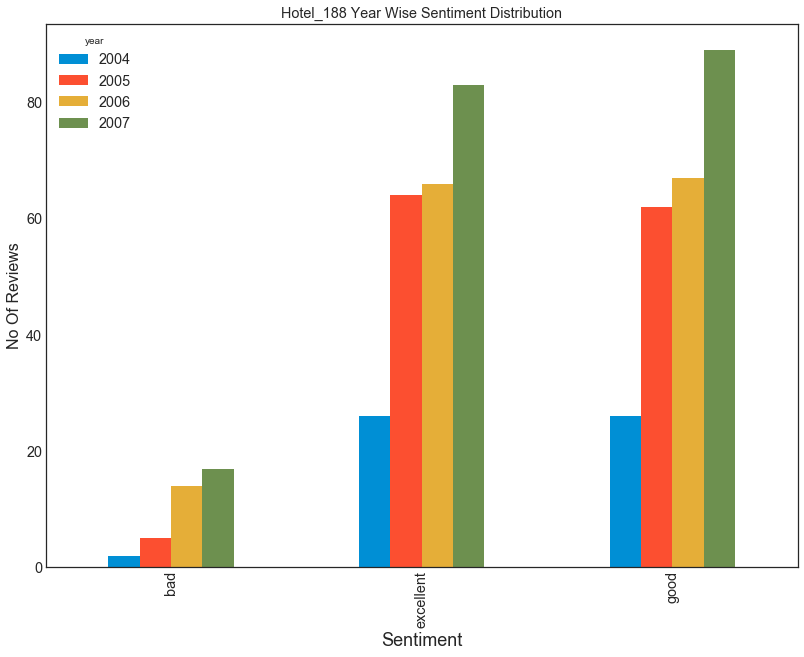

In [74]:
hotel_188_year.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Hotel_188 Year Wise Sentiment Distribution" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

### Let us look at the hotelid_188 quarter wise Sentiment Distribution

In [75]:
hotelid_quarter_sentiment = pd.crosstab(index=hotels["Sentiment"], 
                             columns=[hotels["Hotelid"],hotels['quarter']])   # Include row and column totals

hotelid_quarter_sentiment

Hotelid   hotel_101                               hotel_102            \
quarter   Quarter 1 Quarter 2 Quarter 3 Quarter 4 Quarter 1 Quarter 2   
Sentiment                                                               
bad               1         2         1         1         1         0   
excellent         2         1         2         1         2         2   
good              1         5         5         4         3        10   

Hotelid                       hotel_103                                \
quarter   Quarter 3 Quarter 4 Quarter 1 Quarter 2 Quarter 3 Quarter 4   
Sentiment                                                               
bad               5         0         2         2         1         3   
excellent        13         3         6         3         3         6   
good             13        11         3         5         5         7   

Hotelid   hotel_104                               hotel_105            \
quarter   Quarter 1 Quarter 2 Quarter 3 Quarter 4 Quarter 1 Quarter 2   
Sentiment                                                               
bad               3         2         1         4         4         0   
excellent         3         1         6         1         1         3   
good             11         5         4         6         6         3   

Hotelid                       hotel_106                                \
quarter   Quarter 3 Quarter 4 Quarter 1 Quarter 2 Quarter 3 Quarter 4   
Sentiment                                                               
bad               1         1         0         1         3         2   
excellent         0         3         1         0         3         3   
good              5         3         4         4         4         6   

Hotelid   hotel_107                               hotel_108            \
quarter   Quarter 1 Quarter 2 Quarter 3 Quarter 4 Quarter 1 Quarter 2   
Sentiment                                                               
bad               1         1         1         0         2         0   
excellent         0         2         3         0         0         0   
good              1         2         3         4         2         2   

Hotelid             hotel_109                     hotel_110            \
quarter   Quarter 4 Quarter 1 Quarter 2 Quarter 4 Quarter 1 Quarter 2   
Sentiment                                                               
bad               2         1         0         1         4         0   
excellent         0         0         1         0         1         0   
good              1         2         5         1         6         6   

Hotelid                       hotel_111                                \
quarter   Quarter 3 Quarter 4 Quarter 1 Quarter 2 Quarter 3 Quarter 4   
Sentiment                                                               
bad               1         1         3         2         3         4   
excellent         1         0         1         3         0         1   
good              4         5         1         3         2         0   

Hotelid   hotel_112                               hotel_113            \
quarter   Quarter 1 Quarter 2 Quarter 3 Quarter 4 Quarter 1 Quarter 2   
Sentiment                                                               
bad               1         0         1         3         1         0   
excellent         1         3         2         2         0         1   
good              3         3         3         3         5         5   

Hotelid                       hotel_114                                \
quarter   Quarter 3 Quarter 4 Quarter 1 Quarter 2 Quarter 3 Quarter 4   
Sentiment                                                               
bad               0         2         2         1         0         2   
excellent         0         2         0         1         0         1   
good              3         4         2         1         4         4   

Hotelid   hotel_115                              

In [76]:
hotel_188_quarter = hotelid_quarter_sentiment['hotel_188']

In [77]:
hotel_188_quarter

quarter    Quarter 1  Quarter 2  Quarter 3  Quarter 4
Sentiment                                            
bad                9          9          8         12
excellent         54         46         71         68
good              66         65         58         55

Text(0,0.5,'No Of Reviews')

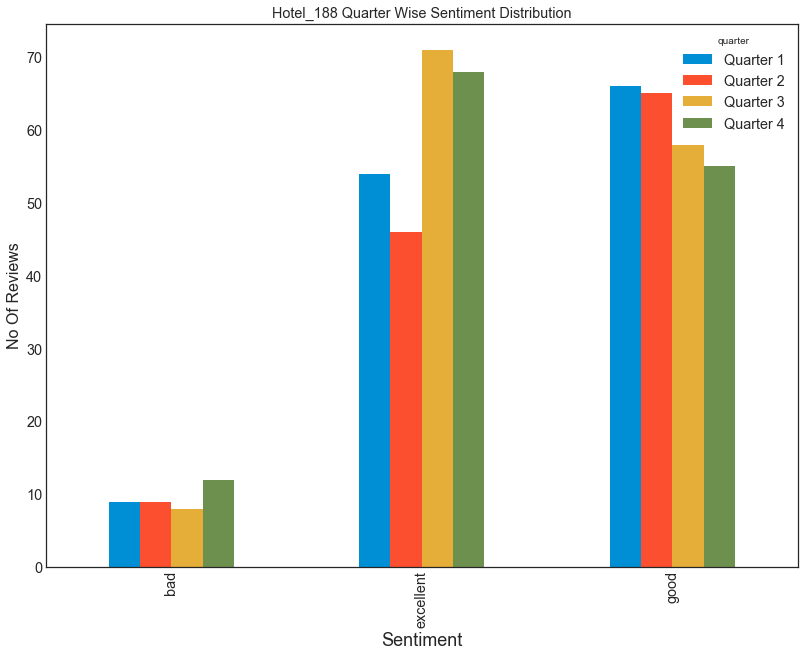

In [78]:
hotel_188_quarter.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Hotel_188 Quarter Wise Sentiment Distribution" )
plt.xlabel('Sentiment', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

#### As compared to overall Sentimnet hotelid_188 is having slightly more or equal no of review in Q3 and Q4 <br> Also good reviews are high in Q1 and Q2 when compared to Q3 and Q4, this is interesting when compared to over sentiment distribution

<a id='text'></a>
### Task 1.5 :  Working with Text (Reviewtext) Column

In [213]:
pd.set_option('max_colwidth', 500)
warnings.filterwarnings('ignore')

In [214]:
df = hotels

In [215]:
df[["Hotelid","Reviewid","reviewtext", "Sentiment"]].sample(2)

Hotelid     Reviewid  \
2492  hotel_146  Review_2493   
5641  hotel_188  Review_5642   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               reviewtext  \
2492  Great location, simple but lovely Stayed for a little less than a week, with the idea of seeing as much of San Francisco as possible, with a central base to get back to that is safe, 3-4star standards. The Mosser fits all this and more.We stayed on the fourth floor, double bed ensuite. It was just perfect. Bit small but all the room we needed for 2. Bathroom was clean, room service was great. Everyone from concierge to the luggage guy were polite and friendly.No tea making facilities but we'...   
5641  Exceeded expectations We stayed at the Belvedere the weekend of January 24, 2004. We arrived early but were still able to check into our room. The desk clerk really made an effort to find a room that suited our needs, and the rest of the staff was helpful as well. We ended up on the 15th floor, in a bigger-than-expected room with a great view of the area. The kitchenette was a nice asset, the bed was comfortable, tv reception excellent. One thing we loved was being able to actually open the ...   

      Sentiment  
2492  excellent  
5641  excellent

In [216]:
df = df[["Hotelid","Reviewid","reviewtext", "Sentiment"]]

In [217]:
df.describe()

Hotelid     Reviewid  \
count        6287         6287   
unique        100         6287   
top     hotel_188  Review_3136   
freq          521            1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 reviewtext  \
count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  6287   
unique                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 6287   
top     We recomend the Hyatt This Hyatt has some negatives, but the positives outweigh the negatives.On the downside: we checked in early and asked for an upgraded room with a view. The request was graciously handled by the front desk, but the 鈥渧iew鈥?was of the huge concrete wall of the Embarcadero Center, the patio off the room was littered with cigarette butts, and one of the patio chairs had a broken seat. The upside: the request to change back to a normal room was handled nicely, and our new ro...   
freq                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      1   

       Sentiment  
count       6287  
unique         3  
top         good  
freq        3213

<a id='pretext'></a>
### Task 1.6 : Preprocessing the review text

#### Cleaning the data using few regular expressions

In [218]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\!!\!!!\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.replace(r"$", "")
    df[text_field] = df[text_field].str.lower()
    return df


In [219]:
df = standardize_text(df, "reviewtext")

In [220]:
df.tail(2)

Hotelid     Reviewid  \
6285  hotel_200  Review_6286   
6286  hotel_200  Review_6287   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               reviewtext  \
6285                                 it's our new favorite hotel!! after staying at many new york city hotels   including grand old and boutique   this was by far the best, our one bedroom suite was spacious for nyc   beautiful decor with a balcony! the staff was consistently friendly, helpful and professional, from reservations to turn down service  the complimentary food and beverage offerings went beyond the norm as well  location was great   and quiet!! it's the only place we'll stay from now on    
6286  terrific hotel in the union square grammercy park area the hotel giraffe is a very, very good hotel in an area where there are relatively few hotels  the location was just about perfect for my visit  i needed to be near my friends at the w union square  the hotel is immaculately maintained  the lobby is extremely spacious for a relatively small hotel, and the decor furninshings are tasteful, comfortable, and welcoming  the staff are, for the most part, excellent, though i did encounter one b...   

      Sentiment  
6285  excellent  
6286  excellent

#### Removing punctions

In [221]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [222]:
df['reviewtext'] = df['reviewtext'].apply(remove_punctuation)
df.tail(2)

Hotelid     Reviewid  \
6285  hotel_200  Review_6286   
6286  hotel_200  Review_6287   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               reviewtext  \
6285                                            its our new favorite hotel after staying at many new york city hotels   including grand old and boutique   this was by far the best our one bedroom suite was spacious for nyc   beautiful decor with a balcony the staff was consistently friendly helpful and professional from reservations to turn down service  the complimentary food and beverage offerings went beyond the norm as well  location was great   and quiet its the only place well stay from now on    
6286  terrific hotel in the union square grammercy park area the hotel giraffe is a very very good hotel in an area where there are relatively few hotels  the location was just about perfect for my visit  i needed to be near my friends at the w union square  the hotel is immaculately maintained  the lobby is extremely spacious for a relatively small hotel and the decor furninshings are tasteful comfortable and welcoming  the staff are for the most part excellent though i did encounter one bellman ...   

      Sentiment  
6285  excellent  
6286  excellent

#### Saving the cleaned data to disk for future reference

In [223]:
df.to_csv("df_clean_data.csv")

In [224]:
df.groupby("Sentiment").count()

Hotelid  Reviewid  reviewtext
Sentiment                               
bad           1103      1103        1103
excellent     1971      1971        1971
good          3213      3213        3213

#### Without removing stop words

In [225]:
text = " ".join(review for review in df.reviewtext)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 5685811 words in the combination of all review.


#### Visualizing the most frequent words using word cloud

In [227]:
import string

TypeError: 'str' object is not callable

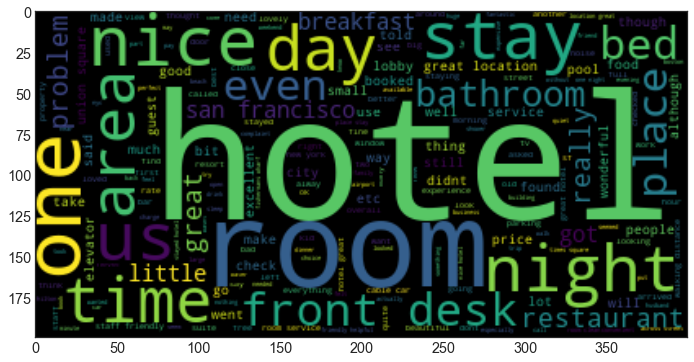

In [228]:
wordcloud = WordCloud(background_color="Black").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Most Frequent Words in all the Review Text")
plt.axis("off")
plt.show()

#### Seperating the Text for Different Sentiments and Visulaizing the most frequent words for each Sentiment

In [229]:
excellent = " ".join(review for review in df[df["Sentiment"]=="excellent"].reviewtext)
good = " ".join(review for review in df[df["Sentiment"]=="good"].reviewtext)
bad = " ".join(review for review in df[df["Sentiment"]=="bad"].reviewtext)

#### Word Cloud for excellent

TypeError: 'str' object is not callable

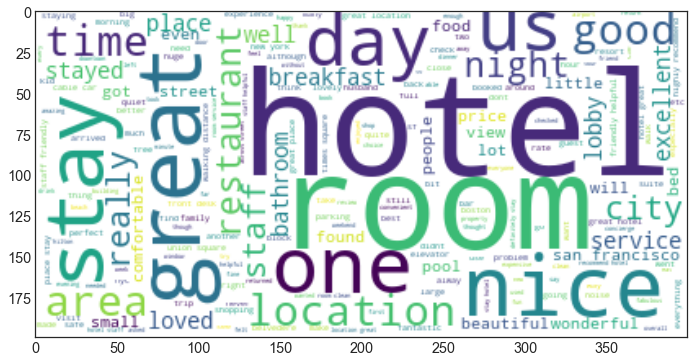

In [230]:
wordcloud_excellent = WordCloud(background_color="white").generate(excellent)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_excellent, interpolation='bilinear')
plt.title("Most Frequent Words in the Excellent Review Text")
plt.axis("off")
plt.show()

#### Word Cloud for good

TypeError: 'str' object is not callable

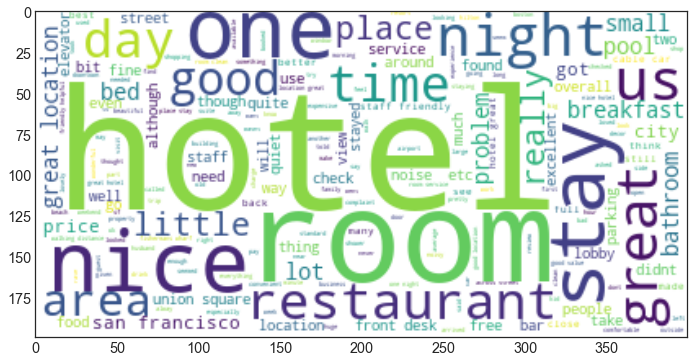

In [231]:
wordcloud_good = WordCloud( background_color="white").generate(good)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.title("Most Frequent Words in the Good Review Text")
plt.axis("off")
plt.show()

#### Word Cloud for Bad

TypeError: 'str' object is not callable

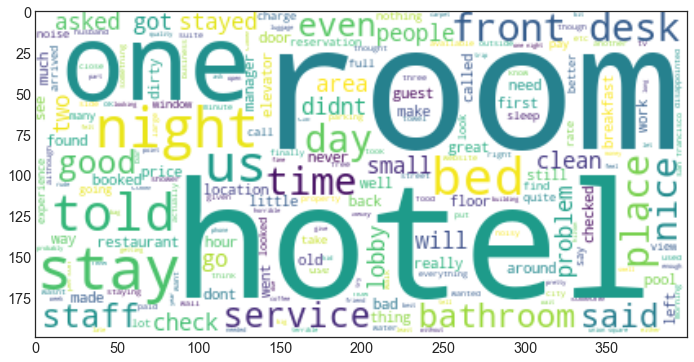

In [232]:
wordcloud_bad = WordCloud(background_color="white").generate(bad)
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.title ("Most Frequent Words in the Bad Review Text")
plt.axis("off")
plt.show()

#### Removing Stop Words

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

In [233]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [234]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [235]:
df['reviewtext'] = df['reviewtext'].apply(stopwords)

In [236]:
text_afterstop = " ".join(review for review in df.reviewtext)
print ("There are {} words in the combination of all review after stop words removal.".format(len(text_afterstop)))

There are 3659875 words in the combination of all review after stop words removal.


#### There are few words appearing more no of times in all the sentiment classes whcih actually do not contribute to Sentiment class. Updating the stop words list with those most repeating words

In [237]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['hotel','one','us','stay','day','us','night','also','room', 'rooms']
stopwords.extend(newStopWords)

In [238]:
print("Number of new stopwords: ", len(stopwords))

Number of new stopwords:  189


In [239]:
df['reviewtext'] = df['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

In [240]:
text_afternewstop = " ".join(review for review in df.reviewtext)
print ("There are {} words in the combination of all review after new stop words removal.".format(len(text_afternewstop)))

There are 3426273 words in the combination of all review after new stop words removal.


#### Checking the most frequnt occuring words

In [241]:
freq = pd.Series(' '.join(df['reviewtext']).split()).value_counts()[:10]
freq

great       6046
location    3988
would       3965
good        3831
staff       3646
nice        3531
stayed      2995
clean       2626
get         2356
service     2335
dtype: int64

<a id='fetext'></a>
### Task 1.7 : FeatureEngineering review text

In [244]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
df["tokens"] = df["reviewtext"].apply(tokenizer.tokenize)
df.head(1)

Hotelid  Reviewid                  reviewtext Sentiment  \
0  hotel_101  Review_1  nice marriot view king bed      good   

                             tokens  
0  [nice, marriot, view, king, bed]

In [245]:
text_final = " ".join(review for review in df.reviewtext)
print ("There are {} words in the combination of all review.".format(len(text_final)))

There are 3426273 words in the combination of all review.


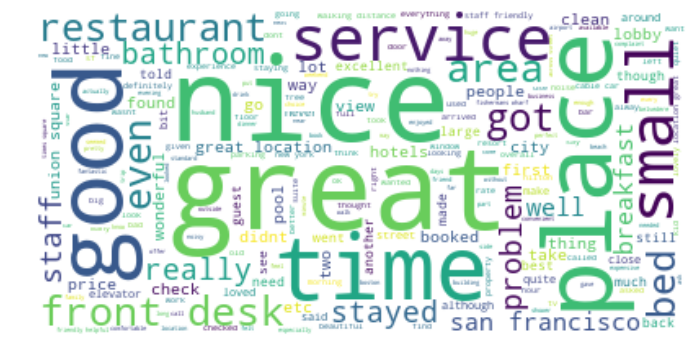

In [246]:
wordcloud = WordCloud(background_color="white").generate(text_final)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
#plt.title("Most Frequent Words in all the Review Text after Text Clean up")
plt.axis("off")
plt.show()

In [247]:
excellent_final = " ".join(review for review in df[df["Sentiment"]=="excellent"].reviewtext)
good_final = " ".join(review for review in df[df["Sentiment"]=="good"].reviewtext)
bad_final = " ".join(review for review in df[df["Sentiment"]=="bad"].reviewtext)

### Let us look at the word cloud for each Sentiment Class

#### For Sentiment = Excellent

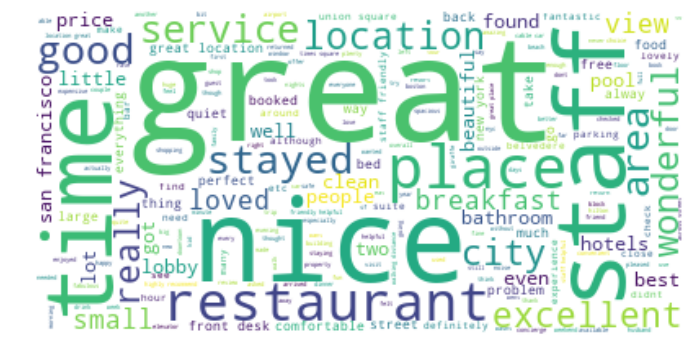

In [248]:
wordcloud_excellentfinal = WordCloud( background_color="white").generate(excellent_final)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_excellentfinal, interpolation='bilinear')
plt.title ="Most Frequent Words in the Excellent Review Text After Cleanup"
plt.axis("off")
plt.show()

#### Now the above word cloud make sense for Excellent Sentiment as it has words like great, nice, staff

#### For Sentiment = Good

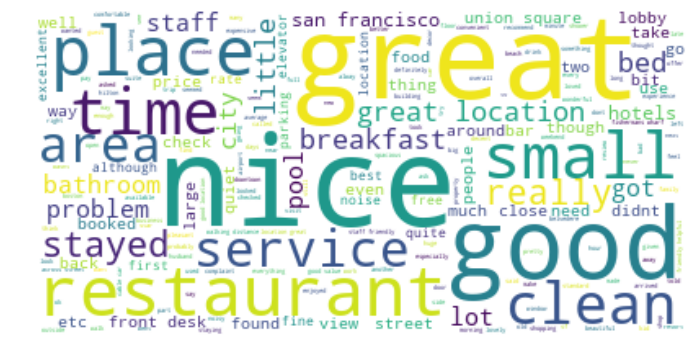

In [249]:
wordcloud_good_final = WordCloud( background_color="white").generate(good_final)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_good_final, interpolation='bilinear')
plt.title ="Most Frequent Words in the Good Review Text After Cleanup"
plt.axis("off")
plt.show()

#### For Sentiment = Bad

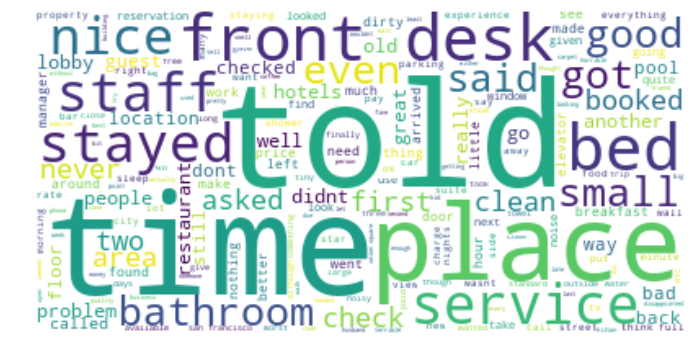

In [250]:
wordcloud_bad_final = WordCloud( background_color="white").generate(bad_final)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_bad_final, interpolation='bilinear')
plt.title ="Most Frequent Words in the Bad Review Text After Cleanup"
plt.axis("Off")
plt.show()

### Understanding the New Feature Tokens 

In [251]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in df["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

507365 words total, with a vocabulary size of 22543
Max sentence length is 648


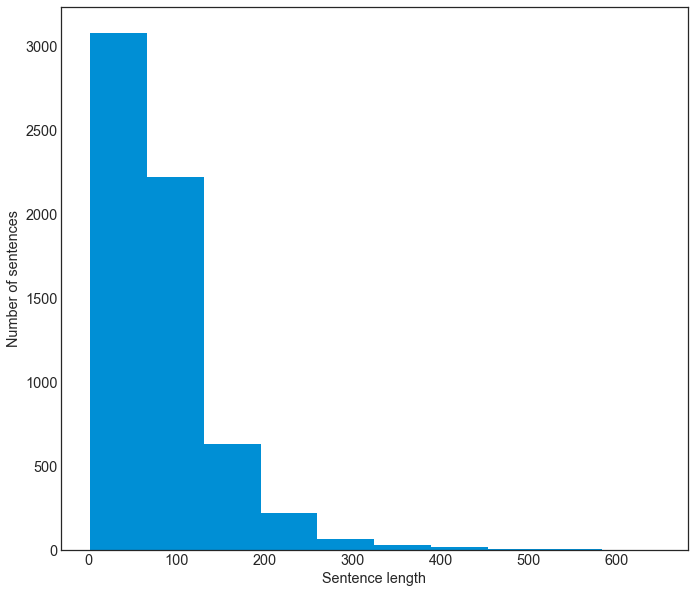

In [252]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()

#### From the above bar graph we can undestand the the more of reviews are having sentence length 200 or less

### Calculate the number of words in each ReviewText

In [253]:
df['num_words'] = df.reviewtext.apply(lambda x : len(x.split()))

In [254]:
df['num_words'].describe()

count    6287.000000
mean       80.700652
std        67.037555
min         1.000000
25%        39.000000
50%        67.000000
75%       105.000000
max       648.000000
Name: num_words, dtype: float64

### Binning the No of Words for better understanding of how the words are ditributed

In [255]:
bins=[0,50,75, np.inf]
df['bins']=pd.cut(df.num_words, bins=[0,100,200,300,400,500, np.inf], labels=['0-100', '100-200', '200-000','300-400','400-500' ,'>500'])

In [256]:
df.sample(1)

Hotelid     Reviewid  \
5702  hotel_189  Review_5703   

                                                                                                                                 reviewtext  \
5702  great location comfy bed stayed weekend great location center town 2 mins walk quincy market comfortable accommodations helpful staff   

      Sentiment  \
5702  excellent   

                                                                                                                                                         tokens  \
5702  [great, location, comfy, bed, stayed, weekend, great, location, center, town, 2, mins, walk, quincy, market, comfortable, accommodations, helpful, staff]   

      num_words   bins  
5702         19  0-100

In [257]:
word_distribution = df.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [258]:
word_distribution.head(10)

bins  counts
0    0-100    4597
1  100-200    1364
2  200-000     240
3  300-400      53
4  400-500      22
5     >500      11

#### From the above word distribution we can understand that more than 70% reviews are having word count less than 100

### Let us visualize the words ditribution per bin

Text(0.5,1,'Word distribution per bin')

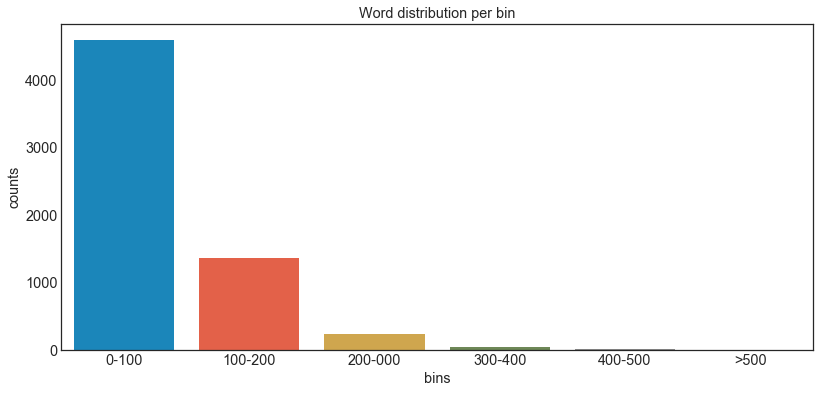

In [259]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

### Histogram of text length of each each Sentiment

In [260]:
def length(text):    
    return len(text)

In [261]:
df['length'] = df['reviewtext'].apply(len)
df.head(1)

Hotelid  Reviewid                  reviewtext Sentiment  \
0  hotel_101  Review_1  nice marriot view king bed      good   

                             tokens  num_words   bins  length  
0  [nice, marriot, view, king, bed]          5  0-100      26

In [262]:
df['length'].describe()

count    6287.000000
mean      543.977573
std       447.504372
min         4.000000
25%       263.500000
50%       450.000000
75%       706.000000
max      4471.000000
Name: length, dtype: float64

#### Extracting the data of each class

In [263]:
bad_sentiment = df[df['Sentiment'] == 'bad']
excellent_sentiment = df[df['Sentiment'] == 'excellent']
good_sentiment = df[df['Sentiment'] == 'good']

### Histogram of text lenght of each Sentiment

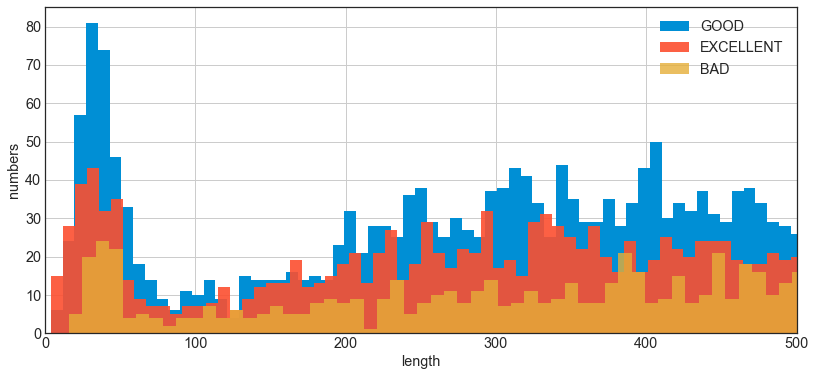

In [264]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(good_sentiment['length'], alpha = 1.0, bins=bins, label='GOOD')
plt.hist(excellent_sentiment['length'], alpha = 0.9, bins=bins, label='EXCELLENT')
plt.hist(bad_sentiment['length'],alpha = 0.8 , bins=bins, label='BAD')

plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,500)
plt.grid()
plt.show()

In [265]:
freq = pd.Series(' '.join(df['reviewtext']).split()).value_counts()[:10]
freq

great       6046
location    3988
would       3965
good        3831
staff       3646
nice        3531
stayed      2995
clean       2626
get         2356
service     2335
dtype: int64

### No of Words

In [266]:
df['word_count'] = df['reviewtext'].apply(lambda x: len(str(x).split(" ")))
df[['reviewtext','word_count']].head(1)

reviewtext  word_count
0  nice marriot view king bed           5

### No Of Characters

In [267]:
df['char_count'] = df['reviewtext'].str.len() ## this also includes spac
df[['reviewtext','char_count']].head(1)

reviewtext  char_count
0  nice marriot view king bed          26

In [268]:
df['label'] = df['Sentiment'].map({'bad': 0, 'good': 1, 'excellent':2})

### Let us look at the Sentiment Analysis of Review Text Using Sentiment Intensity Analyzer

In [269]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df["reviewtext"]= df["reviewtext"].astype(str)

# Applying Model, Variable Creation
df['Polarity Score']=df["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Rating']=''
df.loc[df['Polarity Score']>0,'Rating']='Positive'
df.loc[df['Polarity Score']==0,'Rating']='Neutral'
df.loc[df['Polarity Score']<0,'Rating']='Negative'

In [270]:
df.head(1)

Hotelid  Reviewid                  reviewtext Sentiment  \
0  hotel_101  Review_1  nice marriot view king bed      good   

                             tokens  num_words   bins  length  word_count  \
0  [nice, marriot, view, king, bed]          5  0-100      26           5   

   char_count  label  Polarity Score  Neutral Score  Negative Score  \
0          26      1          0.4215          0.588             0.0   

   Positive Score    Rating  
0           0.412  Positive

In [273]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    """
    Standardize by percentage the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    #plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

### Understadning the Rating Vs Sentiment Analysis

In [274]:
import string

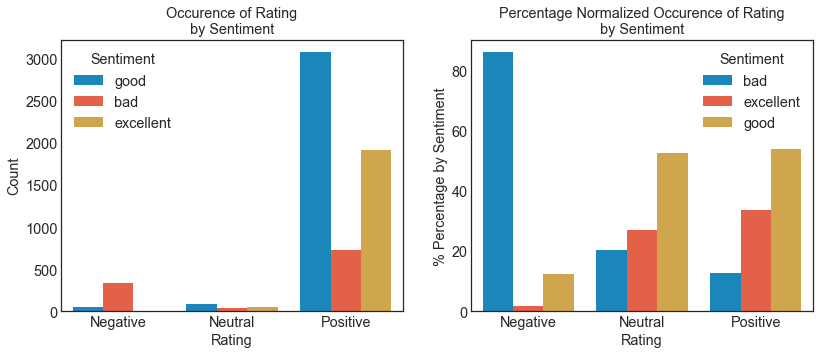

In [276]:
huevar = "Sentiment"
xvar = "Rating"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=xvar, hue=huevar,data=df, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_title("Occurence of {}\nby {}".format(xvar, huevar))
axes[0].set_ylabel("Count")
percentstandardize_barplot(x=xvar,y="Percentage", hue=huevar,data=df, ax=axes[1])
axes[1].set_title("Percentage Normalized Occurence of {}\nby {}".format(xvar, huevar))
axes[1].set_ylabel("% Percentage by {}".format(huevar))
plt.show()

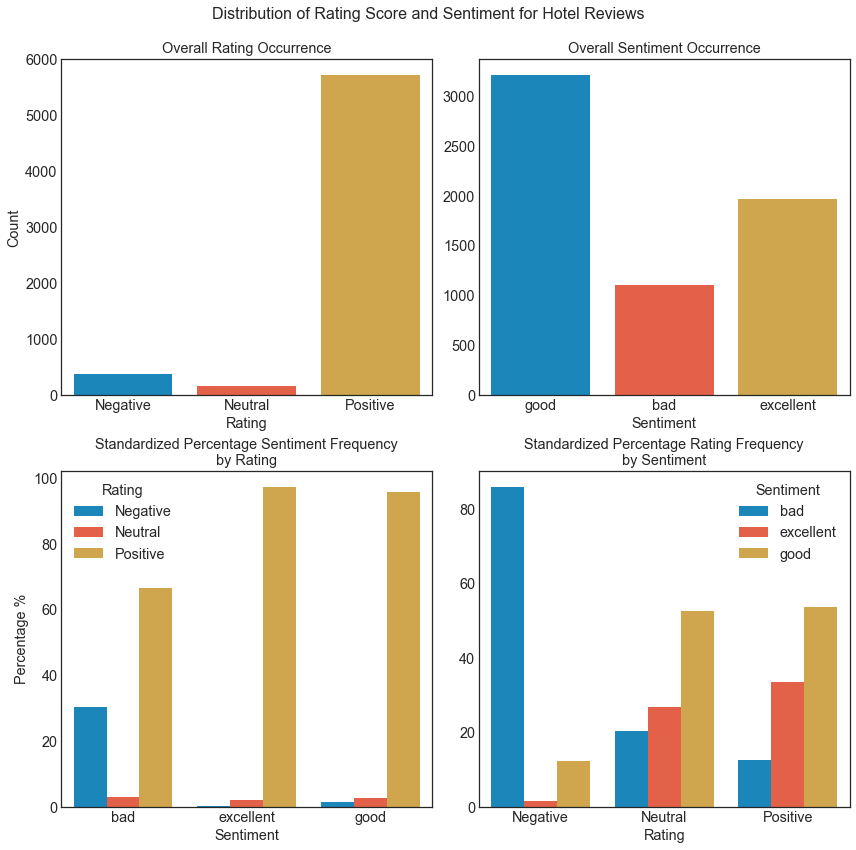

In [277]:
f, axes = plt.subplots(2,2, figsize=[12,12])
sns.countplot(x="Rating", data=df, ax=axes[0,0], order=["Negative","Neutral","Positive"])
axes[0,0].set_xlabel("Rating")
axes[0,0].set_ylabel("Count")
axes[0,0].set_title("Overall Rating Occurrence")

sns.countplot(x="Sentiment", data=df, ax=axes[0,1])
axes[0,1].set_xlabel("Sentiment")
axes[0,1].set_ylabel("")
axes[0,1].set_title("Overall Sentiment Occurrence")

percentstandardize_barplot(x="Sentiment",y="Percentage",hue="Rating",data=df, ax=axes[1,0])
axes[1,0].set_xlabel("Sentiment")
axes[1,0].set_ylabel("Percentage %")
axes[1,0].set_title("Standardized Percentage Sentiment Frequency\nby Rating")

percentstandardize_barplot(x="Rating",y="Percentage",hue="Sentiment",data=df, ax=axes[1,1])
axes[1,1].set_ylabel("Occurrence Frequency")
axes[1,1].set_title("Standardized Percentage Rating Frequency\nby Sentiment")
axes[1,1].set_xlabel("Rating")
axes[1,1].set_ylabel("")

f.suptitle("Distribution of Rating Score and Sentiment for Hotel Reviews", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.92)
plt.show()

### Tokenizing the Text

In [138]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df["tokens_after"] = df["reviewtext"].apply(tokenizer.tokenize)
df.head(1)

Hotelid  Reviewid                  reviewtext Sentiment  \
0  hotel_101  Review_1  nice marriot view king bed      good   

                             tokens  num_words   bins  length  word_count  \
0  [nice, marriot, view, king, bed]          5  0-100      26           5   

   char_count  label  Polarity Score  Neutral Score  Negative Score  \
0          26      1          0.4215          0.588             0.0   

   Positive Score    Rating                      tokens_after  
0           0.412  Positive  [nice, marriot, view, king, bed]

### Stemming the Text

In [139]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['stemmedtext']= df['reviewtext'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [140]:
df[['reviewtext','stemmedtext']].sample(1)

reviewtext  \
1914  great experience stayed long weekend pleasantly surprised clean beds comfortable ever slept best part concierge service give perfect directions every tourist attraction professional loved recommended chartered shuttle back airport discounted rate perfect location close every mode transportation coffe shops quaint bar block away awesome shopping around tip buy 3 muni pass good muni bus train trolley save tons money dont waste time cab accidentally charged mini bar someone moved something poin...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              stemmedtext  
1914  great experi stay long weekend pleasantli surpris clean bed comfort ever slept best part concierg servic give perfect direct everi tourist attract profession love recommend charter shuttl back airport discount rate perfect locat close everi mode transport coff shop quaint bar block away awesom shop around tip buy 3 muni pass good muni bu train trolley save ton money dont wast time cab accident charg mini bar someon move someth point mistak quick remov bill beauti deserv four star rate defini...

### Lemmatizing

In [141]:
from textblob import Word
df['lemmatizedtext'] = df['reviewtext'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df[['reviewtext','lemmatizedtext']].sample(1)

reviewtext  \
4711  great location bit pricey great location spaciuos great facilities bit pricey book direct book via booking agent octopus expedia good value booked first 3 nights internet last direct price difference considerable however nice bar restuarant lobby area great outdoor area bar great sit terrace evening glass wine take boston would definatley recommend take advice book agent   

                                                                                                                                                                                                                                                                                                                                                                          lemmatizedtext  
4711  great location bit pricey great location spaciuos great facility bit pricey book direct book via booking agent octopus expedia good value booked first 3 night internet last direct price difference considerable however nice bar restuarant lobby area great outdoor area bar great sit terrace evening glass wine take boston would definatley recommend take advice book agent

In [142]:
df[['reviewtext','stemmedtext','lemmatizedtext']].sample(1)

reviewtext  \
3437  reasonable little ovepriced stayed husband 2 nights booked read previous reviews felt little apprehensive condition need worried found although decor little tired perfectly clean acceptable bed excellent plumbing worked satisfactorily faced street noise cable cars bad unfortunately second errecting new shop front across road throughout noisy fault although went might ask quiet tried breakfast good expensive didnt try restaurant kuletos seemed popular overall pleasant enough maybe little over...   

                                                                                                                                                                                                                                                                                                                                                                                                                                           stemmedtext  \
3437  reason littl ovepr stay husband 2 night book read previou review felt littl apprehens condit need worri found although decor littl tire perfectli clean accept bed excel plumb work satisfactorili face street nois cabl car bad unfortun second errect new shop front across road throughout noisi fault although went might ask quiet tri breakfast good expens didnt tri restaur kuleto seem popular overal pleasant enough mayb littl overpr   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           lemmatizedtext  
3437  reasonable little ovepriced stayed husband 2 night booked read previous review felt little apprehensive condition need worried found although decor little tired perfectly clean acceptable bed excellent plumbing worked satisfactorily faced street noise cable car bad unfortunately second errecting new shop front across road throughout noisy fault although went might ask quiet tried breakfast good expensive didnt try restaurant kuletos seemed popular overall pleasant enough maybe little overpriced

In [143]:
#from textblob import Word
#df['reviewtext'] = df['reviewtext'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#df[['reviewtext','lemmatizedtext']].head(3)

In [144]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['reviewtext']= df['reviewtext'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

### Saving Preprocessed Text to Disk

In [145]:
df.to_csv("Hotels_PreProcessed_stemmed.csv")

In [146]:
df.head(1)

Hotelid  Reviewid                  reviewtext Sentiment  \
0  hotel_101  Review_1  nice marriot view king bed      good   

                             tokens  num_words   bins  length  word_count  \
0  [nice, marriot, view, king, bed]          5  0-100      26           5   

   char_count  label  Polarity Score  Neutral Score  Negative Score  \
0          26      1          0.4215          0.588             0.0   

   Positive Score    Rating                      tokens_after  \
0           0.412  Positive  [nice, marriot, view, king, bed]   

                  stemmedtext              lemmatizedtext  
0  nice marriot view king bed  nice marriot view king bed

### Data Exploration, Visualization and Preprocessing of Review Text done so far

<a id='machine'></a>
### Task 1.8: Building Machine Learning algorithms

#### Building Multinominal NB using count vectorizer

In [147]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['stemmedtext'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['Sentiment'], test_size=0.3, random_state=1)
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Count Vectorizer Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Count Vectorizer Accuracy: 0.6767355590885002


### Building Multinominal NB using TfidfVectorizer

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['reviewtext'])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, df['Sentiment'], test_size=0.3, random_state=123)


from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Tf-IDF Vectorizer Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Tf-IDF Vectorizer Accuracy: 0.5034446210916799


  ### Grid Search on Multinominal NB using Count and TF-IDF Vectorizer

In [149]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}

x_train, x_test, y_train, y_test = train_test_split(df['reviewtext'], df['Sentiment'], test_size=0.33, random_state=42)
                        
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
clf = GridSearchCV(text_clf, tuned_parameters, cv=10, scoring='accuracy')
clf.fit(x_train, y_train)

print(classification_report(y_test, clf.predict(x_test), digits=4))
print(accuracy_score(y_test, clf.predict(x_test)))                                                                       

              precision    recall  f1-score   support

         bad     0.8889    0.5348    0.6678       374
   excellent     0.6721    0.3850    0.4896       639
        good     0.6233    0.8710    0.7266      1062

   micro avg     0.6607    0.6607    0.6607      2075
   macro avg     0.7281    0.5969    0.6280      2075
weighted avg     0.6862    0.6607    0.6430      2075

0.6607228915662651


### Building Logistic Regression using Count Vectorizer

In [150]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df['stemmedtext'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, df['Sentiment'], test_size=0.3, random_state=1)
from sklearn.linear_model import LogisticRegression
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = LogisticRegression().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Logistic Regression Count Vectorizer Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Count Vectorizer Accuracy: 0.676205617382088


### Building Logistic Regression using TF-IDF Vectorizer

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df['reviewtext'])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, df['Sentiment'], test_size=0.3, random_state=123)


from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = LogisticRegression().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Logistic Regression Tf-IDF Vectorizer Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Tf-IDF Vectorizer Accuracy: 0.679915209326974


<a id='grid'></a>
### Task 1.9: Validation and Parameter tuning

####  Grid Search on Logistic Regression using Count and TF-IDF Vectorizer

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
predicted= grid.predict(X_test)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.69
Best parameters:  {'C': 1}
Best estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [153]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False).fit(X_train, y_train)
predicted= clf.predict(X_test)
print("Logistic Regression Grid Search Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Grid Search Accuracy: 0.679915209326974


In [154]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    count_vectorizer = CountVectorizer()

    emb = count_vectorizer.fit_transform(data)

    return emb, count_vectorizer

list_corpus = df["reviewtext"].tolist()
list_labels = df["Sentiment"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [155]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_counts, y_train)

y_predicted_logistic = clf.predict(X_test_counts)

In [156]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_logistic)
print("Logistic Regression accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

Logistic Regression accuracy = 0.688, precision = 0.691, recall = 0.688, f1 = 0.687


### Machine Learning algorithms using Count Vectorizer

In [157]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train_counts, y_train)

y_predicted_logistic = clf.predict(X_test_counts)
accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_logistic)
print("Logistic Regression accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train_counts, y_train)

y_predicted_NB = clf.predict(X_test_counts)

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_NB)
print("Multinominal NB accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train_counts,y_train)
clf.score(X_test_counts,y_test)
y_pred_SGD = clf.predict(X_test_counts)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_SGD)
print("SGD Classifier accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

from sklearn.ensemble import RandomForestClassifier 

model_rf = RandomForestClassifier(n_estimators = 501, 
                            criterion = 'entropy') 
                              
model_rf.fit(X_train_counts, y_train)  
y_pred_rf = model_rf.predict(X_test_counts)

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_rf)
print("Random Forest Classifier accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

from sklearn.ensemble import BaggingClassifier 
model_bag =  BaggingClassifier()
                              
model_bag.fit(X_train_counts, y_train)  
y_pred_bag = model_bag.predict(X_test_counts)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_bag)
print("Bagging Classifier accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

from sklearn.ensemble import GradientBoostingClassifier
model_GB =  GradientBoostingClassifier()
                              
model_GB.fit(X_train_counts, y_train)  
y_pred_GB = model_GB.predict(X_test_counts)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_GB)
print("Gradient Boosting Classifier accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

from sklearn.ensemble import AdaBoostClassifier
model_ada =  AdaBoostClassifier()
                              
model_ada.fit(X_train_counts, y_train)  
y_pred_ada = model_ada.predict(X_test_counts)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_ada)
print("Ada Boost Classifier accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

from xgboost import XGBClassifier
model_xgb =  XGBClassifier()
                              
model_xgb.fit(X_train_counts, y_train)  
y_pred_xgb = model_xgb.predict(X_test_counts)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_xgb)
print("XGBoost Classifier accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

Logistic Regression accuracy = 0.688, precision = 0.691, recall = 0.688, f1 = 0.687
Multinominal NB accuracy = 0.690, precision = 0.695, recall = 0.690, f1 = 0.685
SGD Classifier accuracy = 0.661, precision = 0.660, recall = 0.661, f1 = 0.656
Random Forest Classifier accuracy = 0.625, precision = 0.690, recall = 0.625, f1 = 0.586
Bagging Classifier accuracy = 0.592, precision = 0.593, recall = 0.592, f1 = 0.590
Gradient Boosting Classifier accuracy = 0.657, precision = 0.674, recall = 0.657, f1 = 0.646
Ada Boost Classifier accuracy = 0.636, precision = 0.639, recall = 0.636, f1 = 0.634
XGBoost Classifier accuracy = 0.664, precision = 0.691, recall = 0.664, f1 = 0.649


### Machine Learning algorithms using TF-IDF vectorizer

In [158]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [159]:
from sklearn.tree import DecisionTreeClassifier

In [160]:
from sklearn.linear_model import LogisticRegression


tfidf_lr = LogisticRegression()
tfidf_lr.fit(X_train_tfidf, y_train)

y_predicted_logistic = tfidf_lr.predict(X_test_tfidf)

accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_logistic)
print("TF-IDF Logistic Regression accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)
y_predicted_NB = clf.predict(X_test_tfidf)
accuracy, precision, recall, f1 = get_metrics(y_test, y_predicted_NB)
print("Multinominal NB accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train_tfidf,y_train)
clf.score(X_test_tfidf,y_test)
y_pred_SGD = clf.predict(X_test_tfidf)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_SGD)
print("SGD Classifier accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

model_rf = RandomForestClassifier(n_estimators = 501, 
                            criterion = 'entropy') 
                              
model_rf.fit(X_train_tfidf, y_train)  
y_pred_rf = model_rf.predict(X_test_tfidf)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_rf)
print("Random Forest Classifier accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

model_bag =  BaggingClassifier()
                              
model_bag.fit(X_train_tfidf, y_train)  
y_pred_bag = model_bag.predict(X_test_tfidf)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_bag)
print("Bagging Classifier accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

from sklearn.ensemble import GradientBoostingClassifier
model_GB =  GradientBoostingClassifier()
                              
model_GB.fit(X_train_tfidf, y_train)  
y_pred_GB = model_GB.predict(X_test_tfidf)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_GB)
print("Gradient Boosting Classifier accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))
from sklearn.ensemble import AdaBoostClassifier
model_ada =  AdaBoostClassifier()
                              
model_ada.fit(X_train_tfidf, y_train)  
y_pred_ada = model_ada.predict(X_test_tfidf)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_ada)
print("Ada Boost Classifier accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))
from xgboost import XGBClassifier
model_xgb =  XGBClassifier()
                              
model_xgb.fit(X_train_tfidf, y_train)  
y_pred_xgb = model_xgb.predict(X_test_tfidf)
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_xgb)
print("XGBoost Classifier accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

TF-IDF Logistic Regression accuracy = 0.711, precision = 0.726, recall = 0.711, f1 = 0.705
Multinominal NB accuracy = 0.520, precision = 0.719, recall = 0.520, f1 = 0.374
SGD Classifier accuracy = 0.704, precision = 0.708, recall = 0.704, f1 = 0.704
Random Forest Classifier accuracy = 0.623, precision = 0.690, recall = 0.623, f1 = 0.579
Bagging Classifier accuracy = 0.616, precision = 0.615, recall = 0.616, f1 = 0.614
Gradient Boosting Classifier accuracy = 0.668, precision = 0.688, recall = 0.668, f1 = 0.657
Ada Boost Classifier accuracy = 0.630, precision = 0.633, recall = 0.630, f1 = 0.627
XGBoost Classifier accuracy = 0.663, precision = 0.687, recall = 0.663, f1 = 0.650


In [161]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

### Count Vecotrs as features

In [162]:
list_corpus = df["reviewtext"].tolist()
list_labels = df["Sentiment"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

### Word Level TF - IDF Vectors as features

In [163]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

### N gram Level TF - IDF Vectors as features

In [164]:
def tfidf_ngram(data):
    tfidf_vectorizer_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)

    train = tfidf_vectorizer_ngram.fit_transform(data)

    return train, tfidf_vectorizer_ngram

X_train_tfidf_ngram, tfidf_vectorizer_ngram = tfidf(X_train)
X_test_tfidf_ngram = tfidf_vectorizer_ngram.transform(X_test)


### Character Lever TF - IDF Vectors as feature

In [165]:
def tfidf_ngram_character(data):
    tfidf_vectorizer_ngram_character = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)

    train = tfidf_vectorizer_ngram_character.fit_transform(data)

    return train, tfidf_vectorizer_ngram_character

X_train_tfidf_ngram_char, tfidf_vectorizer_ngram_character = tfidf(X_train)
X_test_tfidf_ngram_char = tfidf_vectorizer_ngram_character.transform(X_test)

In [166]:
def train_model(classifier, feature_vector_train, label, feature_vector_test, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_test)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, y_test)

### Naive Bayes

In [167]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), X_train_counts, y_train, X_test_counts)
print ("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), X_train_tfidf_ngram_char, y_train, X_test_tfidf_ngram_char)
print ("NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  0.6899841017488076
NB, WordLevel TF-IDF:  0.5866454689984102
NB, N-Gram Vectors:  0.5866454689984102
NB, CharLevel Vectors:  0.5866454689984102


### Logistic

In [168]:
accuracy = train_model(linear_model.LogisticRegression(), X_train_counts, y_train, X_test_counts)
print ("Logistic, Count Vectors: ", accuracy)

accuracy = train_model(linear_model.LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf)
print ("Logistice, WordLevel TF-IDF: ", accuracy)

accuracy = train_model(linear_model.LogisticRegression(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print ("Logistic, N-Gram Vectors: ", accuracy)

accuracy = train_model(linear_model.LogisticRegression(), X_train_tfidf_ngram_char, y_train, X_test_tfidf_ngram_char)
print ("Logistice, CharLevel Vectors: ", accuracy)

Logistic, Count Vectors:  0.6875993640699523
Logistice, WordLevel TF-IDF:  0.7090620031796503
Logistic, N-Gram Vectors:  0.7090620031796503
Logistice, CharLevel Vectors:  0.7090620031796503


### Support Vector Machine

In [169]:
accuracy = train_model(SGDClassifier(), X_train_counts, y_train, X_test_counts)
print ("SVM, Count Vectors: ", accuracy)

accuracy = train_model(SGDClassifier(), X_train_tfidf, y_train, X_test_tfidf)
print ("SVM, WordLevel TF-IDF: ", accuracy)

accuracy = train_model(SGDClassifier(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print ("SVM, N-Gram Vectors: ", accuracy)

accuracy = train_model(SGDClassifier(), X_train_tfidf_ngram_char, y_train, X_test_tfidf_ngram_char)
print ("SVM, CharLevel Vectors: ", accuracy)

SVM, Count Vectors:  0.6248012718600954
SVM, WordLevel TF-IDF:  0.6955484896661367
SVM, N-Gram Vectors:  0.6963434022257552
SVM, CharLevel Vectors:  0.7019077901430842


### Random Forest

In [170]:
accuracy = train_model(RandomForestClassifier(), X_train_counts, y_train, X_test_counts)
print ("RFC, Count Vectors: ", accuracy)

accuracy = train_model(RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf)
print ("RFC, WordLevel TF-IDF: ", accuracy)

accuracy = train_model(RandomForestClassifier(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print ("RFC, N-Gram Vectors: ", accuracy)

accuracy = train_model(RandomForestClassifier(), X_train_tfidf_ngram_char, y_train, X_test_tfidf_ngram_char)
print ("RFC, CharLevel Vectors: ", accuracy)

RFC, Count Vectors:  0.6017488076311606
RFC, WordLevel TF-IDF:  0.6033386327503975
RFC, N-Gram Vectors:  0.5993640699523053
RFC, CharLevel Vectors:  0.595389507154213


### Boosting

In [171]:
accuracy = train_model(XGBClassifier(), X_train_counts, y_train, X_test_counts)
print ("XGB, Count Vectors: ", accuracy)

accuracy = train_model(XGBClassifier(), X_train_tfidf, y_train, X_test_tfidf)
print ("XGB, WordLevel TF-IDF: ", accuracy)

accuracy = train_model(XGBClassifier(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print ("XGB, N-Gram Vectors: ", accuracy)

accuracy = train_model(XGBClassifier(), X_train_tfidf_ngram_char, y_train, X_test_tfidf_ngram_char)
print ("XGB, CharLevel Vectors: ", accuracy)

XGB, Count Vectors:  0.6637519872813991
XGB, WordLevel TF-IDF:  0.6764705882352942
XGB, N-Gram Vectors:  0.6764705882352942
XGB, CharLevel Vectors:  0.6764705882352942


In [172]:
X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

X_train_tfidf, tfidf_vectorizer = tfidf(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_train_tfidf_ngram, tfidf_vectorizer_ngram = tfidf_ngram(X_train)
X_test_tfidf_ngram = tfidf_vectorizer_ngram.transform(X_test)

X_train_tfidf_ngram_char, tfidf_vectorizer_ngram_character = tfidf_ngram_character(X_train)
X_test_tfidf_ngram_char = tfidf_vectorizer_ngram_character.transform(X_test)


In [173]:
### Naive Bayes
accuracy = train_model(MultinomialNB(), X_train_counts, y_train, X_test_counts)
print ("NB, Count Vectors: ", accuracy)
accuracy = train_model(MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)
accuracy = train_model(MultinomialNB(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy)
accuracy = train_model(MultinomialNB(), X_train_tfidf_ngram_char, y_train, X_test_tfidf_ngram_char)
print ("NB, CharLevel Vectors: ", accuracy)

### Logistic
accuracy = train_model(LogisticRegression(), X_train_counts, y_train, X_test_counts)
print ("Logistic, Count Vectors: ", accuracy)
accuracy = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf)
print ("Logistic, WordLevel TF-IDF: ", accuracy)
accuracy = train_model(LogisticRegression(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print ("Logistic, N-Gram Vectors: ", accuracy)
accuracy = train_model(LogisticRegression(), X_train_tfidf_ngram_char, y_train, X_test_tfidf_ngram_char)
print ("Logistic, CharLevel Vectors: ", accuracy)

### Support Vector Machine
accuracy = train_model(SGDClassifier(), X_train_counts, y_train, X_test_counts)
print ("SVM, Count Vectors: ", accuracy)
accuracy = train_model(SGDClassifier(), X_train_tfidf, y_train, X_test_tfidf)
print ("SVM, WordLevel TF-IDF: ", accuracy)
accuracy = train_model(SGDClassifier(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print ("SVM, N-Gram Vectors: ", accuracy)
accuracy = train_model(SGDClassifier(), X_train_tfidf_ngram_char, y_train, X_test_tfidf_ngram_char)
print ("SVM, CharLevel Vectors: ", accuracy)

### Decision Tree Classifier
accuracy = train_model(DecisionTreeClassifier(), X_train_counts, y_train, X_test_counts)
print ("Decision Tree, Count Vectors: ", accuracy)
accuracy = train_model(DecisionTreeClassifier(), X_train_tfidf, y_train, X_test_tfidf)
print ("Decision Tree, WordLevel TF-IDF: ", accuracy)
accuracy = train_model(DecisionTreeClassifier(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print ("Decision Tree, N-Gram Vectors: ", accuracy)
accuracy = train_model(DecisionTreeClassifier(), X_train_tfidf_ngram_char, y_train, X_test_tfidf_ngram_char)
print ("Decision Tree, CharLevel Vectors: ", accuracy)

### Random Forest Classifier
accuracy = train_model(RandomForestClassifier(), X_train_counts, y_train, X_test_counts)
print ("RFC, Count Vectors: ", accuracy)
accuracy = train_model(RandomForestClassifier(), X_train_tfidf, y_train, X_test_tfidf)
print ("RFC, WordLevel TF-IDF: ", accuracy)
accuracy = train_model(RandomForestClassifier(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print ("RFC, N-Gram Vectors: ", accuracy)
accuracy = train_model(RandomForestClassifier(), X_train_tfidf_ngram_char, y_train, X_test_tfidf_ngram_char)
print ("RFC, CharLevel Vectors: ", accuracy)

### Bagging Classifier
accuracy = train_model(BaggingClassifier(), X_train_counts, y_train, X_test_counts)
print ("Bagging, Count Vectors: ", accuracy)
accuracy = train_model(BaggingClassifier(), X_train_tfidf, y_train, X_test_tfidf)
print ("Bagging, WordLevel TF-IDF: ", accuracy)
accuracy = train_model(BaggingClassifier(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print ("Bagging, N-Gram Vectors: ", accuracy)
accuracy = train_model(BaggingClassifier(), X_train_tfidf_ngram_char, y_train, X_test_tfidf_ngram_char)
print ("Bagging, CharLevel Vectors: ", accuracy)

### Ada Boost classifier
accuracy = train_model(AdaBoostClassifier(), X_train_counts, y_train, X_test_counts)
print ("AdaBoost, Count Vectors: ", accuracy)
accuracy = train_model(AdaBoostClassifier(), X_train_tfidf, y_train, X_test_tfidf)
print ("AdaBoost, WordLevel TF-IDF: ", accuracy)
accuracy = train_model(AdaBoostClassifier(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print ("AdaBoost, N-Gram Vectors: ", accuracy)
accuracy = train_model(AdaBoostClassifier(), X_train_tfidf_ngram_char, y_train, X_test_tfidf_ngram_char)
print ("AdaBoost, CharLevel Vectors: ", accuracy)

### Gradient Boosting Classifier
accuracy = train_model(GradientBoostingClassifier(), X_train_counts, y_train, X_test_counts)
print ("Gradient Boosting, Count Vectors: ", accuracy)
accuracy = train_model(GradientBoostingClassifier(), X_train_tfidf, y_train, X_test_tfidf)
print ("Gradient Boosting, WordLevel TF-IDF: ", accuracy)
accuracy = train_model(GradientBoostingClassifier(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print ("Gradient Boosting, N-Gram Vectors: ", accuracy)
accuracy = train_model(GradientBoostingClassifier(), X_train_tfidf_ngram_char, y_train, X_test_tfidf_ngram_char)
print ("Gradient Boosting, CharLevel Vectors: ", accuracy)

### Boosting Classifier (XGB)
accuracy = train_model(XGBClassifier(), X_train_counts, y_train, X_test_counts)
print ("XGB, Count Vectors: ", accuracy)
accuracy = train_model(XGBClassifier(), X_train_tfidf, y_train, X_test_tfidf)
print ("XGB, WordLevel TF-IDF: ", accuracy)
accuracy = train_model(XGBClassifier(), X_train_tfidf_ngram, y_train, X_test_tfidf_ngram)
print ("XGB, N-Gram Vectors: ", accuracy)
accuracy = train_model(XGBClassifier(), X_train_tfidf_ngram_char, y_train, X_test_tfidf_ngram_char)
print ("XGB, CharLevel Vectors: ", accuracy)



NB, Count Vectors:  0.6899841017488076
NB, WordLevel TF-IDF:  0.5866454689984102
NB, N-Gram Vectors:  0.5858505564387917
NB, CharLevel Vectors:  0.56120826709062
Logistic, Count Vectors:  0.6875993640699523
Logistic, WordLevel TF-IDF:  0.7090620031796503
Logistic, N-Gram Vectors:  0.5977742448330684
Logistic, CharLevel Vectors:  0.685214626391097
SVM, Count Vectors:  0.6470588235294118
SVM, WordLevel TF-IDF:  0.690779014308426
SVM, N-Gram Vectors:  0.5874403815580286
SVM, CharLevel Vectors:  0.651033386327504
Decision Tree, Count Vectors:  0.5532591414944356
Decision Tree, WordLevel TF-IDF:  0.5588235294117647
Decision Tree, N-Gram Vectors:  0.534181240063593
Decision Tree, CharLevel Vectors:  0.527027027027027
RFC, Count Vectors:  0.5890302066772655
RFC, WordLevel TF-IDF:  0.6017488076311606
RFC, N-Gram Vectors:  0.5596184419713831
RFC, CharLevel Vectors:  0.5723370429252782
Bagging, Count Vectors:  0.5993640699523053
Bagging, WordLevel TF-IDF:  0.6017488076311606
Bagging, N-Gram Vect

<a id='compare'></a>
### Task 1.10 Comparing Machine Learning Models

#### Model Comparision for different kind of vectors as features

In [174]:
#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from math import sqrt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [175]:
Model = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),    
    #GLM
    linear_model.LogisticRegression(), 
    #Navies Bayes
    naive_bayes.MultinomialNB(),       
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    #SVM
    svm.LinearSVC(),
    #Trees    
    tree.DecisionTreeClassifier(),
    xgboost.XGBClassifier() 
    ]

### Model Comparision for Count Vectors as features

In [176]:
model_columns = []
model_compare = pd.DataFrame(columns = model_columns)


row_index = 0
for alg in Model:
    
    
    predicted = alg.fit(X_train_counts, y_train).predict(X_test_counts)
    #fp, tp, th = roc_curve(y_test, predicted)
    model_name = alg.__class__.__name__
    model_compare.loc[row_index,'Count Vector Model Name'] = model_name
    model_compare.loc[row_index, 'Count Vector Model Train Accuracy'] = round(alg.score(X_train_counts, y_train), 4)
    model_compare.loc[row_index, 'Count Vector Model Test Accuracy'] = round(alg.score(X_test_counts, y_test), 4)
    model_compare.loc[row_index, 'Count Vector Model Precission'] = precision_score(y_test, predicted, average='micro')
    model_compare.loc[row_index, 'Count Vectore Model Recall'] = recall_score(y_test, predicted, average='micro')
    row_index+=1
    
model_compare.sort_values(by = ['Count Vector Model Test Accuracy'], ascending = False, inplace = True)    
model_compare

Count Vector Model Name  Count Vector Model Train Accuracy  \
5               MultinomialNB                             0.8403   
4          LogisticRegression                             0.9690   
9               XGBClassifier                             0.7471   
2  GradientBoostingClassifier                             0.7757   
7                   LinearSVC                             0.9952   
0          AdaBoostClassifier                             0.6490   
1           BaggingClassifier                             0.9857   
3      RandomForestClassifier                             0.9924   
8      DecisionTreeClassifier                             1.0000   
6        KNeighborsClassifier                             0.6753   

   Count Vector Model Test Accuracy  Count Vector Model Precission  \
5                            0.6900                       0.689984   
4                            0.6876                       0.687599   
9                            0.6638                       0.663752   
2                            0.6566                       0.656598   
7                            0.6486                       0.648649   
0                            0.6359                       0.635930   
1                            0.6089                       0.608903   
3                            0.5731                       0.573132   
8                            0.5350                       0.534976   
6                            0.5231                       0.523052   

   Count Vectore Model Recall  
5                    0.689984  
4                    0.687599  
9                    0.663752  
2                    0.656598  
7                    0.648649  
0                    0.635930  
1                    0.608903  
3                    0.573132  
8                    0.534976  
6                    0.523052

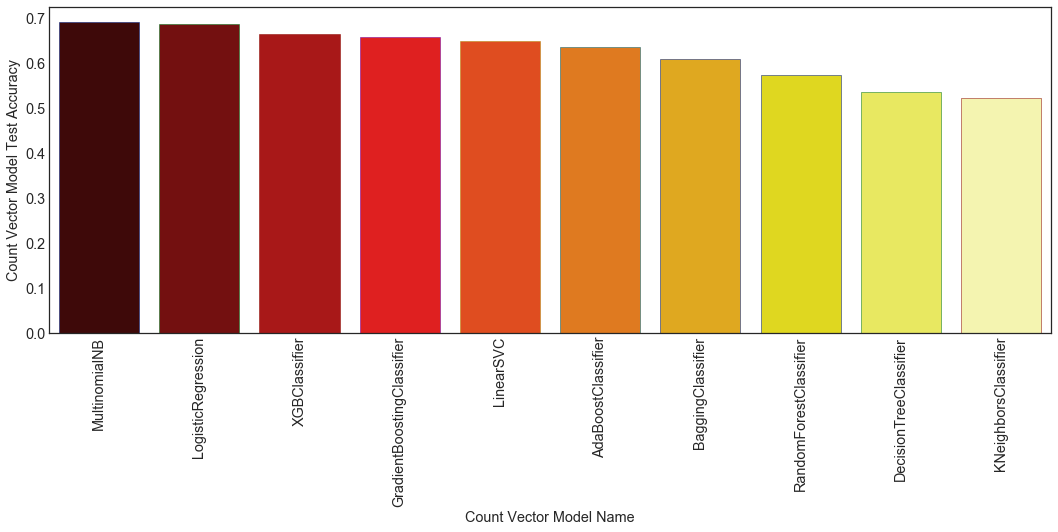

In [178]:
plt.subplots(figsize=(16,6))
sns.barplot(x="Count Vector Model Name", y="Count Vector Model Test Accuracy",data=model_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
#plt.title('Count Vector Models Test Accuracy Comparison')
plt.show()

### Multinomina NB has the heighest test accuracy for Count Vectors as features

### Machine Learning Model Comparison for TF-IDF Vectors as features

In [179]:
model_columns = []
model_compare = pd.DataFrame(columns = model_columns)


row_index = 0
for alg in Model:
    
    
    predicted = alg.fit(X_train_tfidf, y_train).predict(X_test_tfidf)
    #fp, tp, th = roc_curve(y_test, predicted)
    model_name = alg.__class__.__name__
    model_compare.loc[row_index,'TF-IDF Vector Model Name'] = model_name
    model_compare.loc[row_index, 'TF-IDF Vector Model Train Accuracy'] = round(alg.score(X_train_tfidf, y_train), 4)
    model_compare.loc[row_index, 'TF-IDF Vector Model Test Accuracy'] = round(alg.score(X_test_tfidf, y_test), 4)
    model_compare.loc[row_index, 'TF-IDF Vector Model Precission'] = precision_score(y_test, predicted, average='micro')
    model_compare.loc[row_index, 'TF-IDF Vectore Model Recall'] = recall_score(y_test, predicted, average='micro')
    row_index+=1
    
model_compare.sort_values(by = ['TF-IDF Vector Model Test Accuracy'], ascending = False, inplace = True)    
model_compare

TF-IDF Vector Model Name  TF-IDF Vector Model Train Accuracy  \
4          LogisticRegression                              0.8192   
7                   LinearSVC                              0.9407   
9               XGBClassifier                              0.7715   
2  GradientBoostingClassifier                              0.8014   
0          AdaBoostClassifier                              0.6439   
1           BaggingClassifier                              0.9847   
3      RandomForestClassifier                              0.9901   
5               MultinomialNB                              0.6747   
8      DecisionTreeClassifier                              0.9976   
6        KNeighborsClassifier                              0.6562   

   TF-IDF Vector Model Test Accuracy  TF-IDF Vector Model Precission  \
4                             0.7091                        0.709062   
7                             0.6860                        0.686010   
9                             0.6765                        0.676471   
2                             0.6566                        0.656598   
0                             0.6304                        0.630366   
1                             0.6049                        0.604928   
3                             0.5938                        0.593800   
5                             0.5866                        0.586645   
8                             0.5501                        0.550079   
6                             0.5485                        0.548490   

   TF-IDF Vectore Model Recall  
4                     0.709062  
7                     0.686010  
9                     0.676471  
2                     0.656598  
0                     0.630366  
1                     0.604928  
3                     0.593800  
5                     0.586645  
8                     0.550079  
6                     0.548490

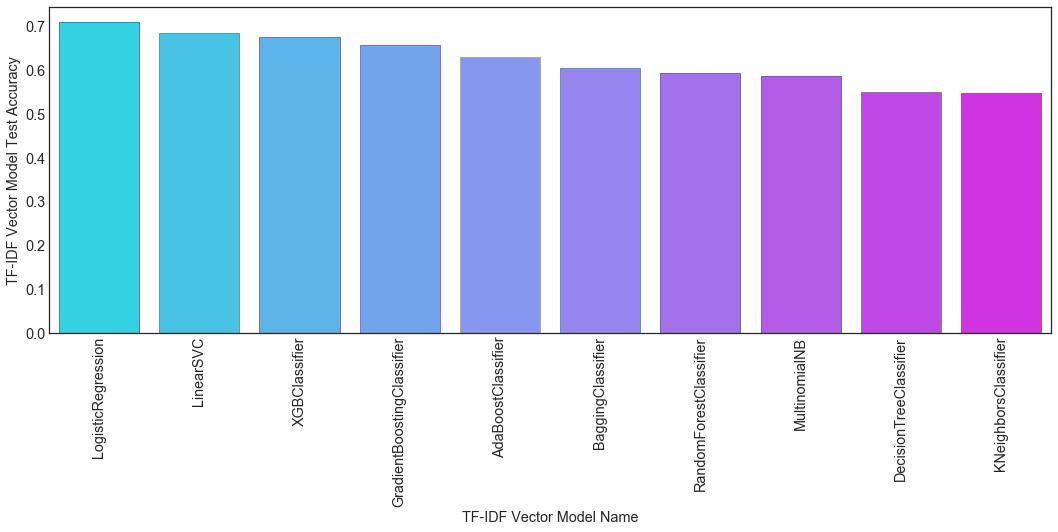

In [180]:
plt.subplots(figsize=(16,6))
sns.barplot(x="TF-IDF Vector Model Name", y="TF-IDF Vector Model Test Accuracy",data=model_compare,palette='cool',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
#plt.title('TF-IDF Vector Models Test Accuracy Comparison')
plt.show()

<a id='deep'></a>
### Task 1.11: Bulding the Deep Learning Models

#### Importing the required libraries

In [181]:
# Basic packages
import pandas as pd 
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
from pathlib import Path

# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

In [182]:
NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 20  # Maximum number of words in a sequence

#### Below functions will help to fasten the process by eliminating tedios jobs

In [183]:
def deep_model(model, X_train, y_train, X_valid, y_valid):
    '''
    Function to train a multi-class model. The number of epochs and 
    batch_size are set by the constants at the top of the
    notebook. 
    
    Parameters:
        model : model with the chosen architecture
        X_train : training features
        y_train : training target
        X_valid : validation features
        Y_valid : validation target
    Output:
        model training history
    '''
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train
                       , y_train
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    return history


def eval_metric(model, history, metric_name):
    '''
    Function to evaluate a trained model on a chosen metric. 
    Training and validation metric are plotted in a
    line chart for each epoch.
    
    Parameters:
        history : model training history
        metric_name : loss or accuracy
    Output:
        line chart with epochs of x-axis and metric on
        y-axis
    '''
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.xlabel('Epoch number')
    plt.ylabel(metric_name)
    #plt.title('Comparing training and validation ' + metric_name + ' for ' + model.name)
    plt.legend()
    plt.show()

def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
    '''
    Function to test the model on new data after training it
    on the full training data with the optimal number of epochs.
    
    Parameters:
        model : trained model
        X_train : training features
        y_train : training target
        X_test : test features
        y_test : test target
        epochs : optimal number of epochs
    Output:
        test accuracy and test loss
    '''
    model.fit(X_train
              , y_train
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test, y_test)
    print()
    print('Test accuracy: {0:.2f}%'.format(results[1]*100))
    return results

    
def remove_stopwords(input_text):
    '''
    Function to remove English stopwords from a Pandas Series.
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
    return " ".join(clean_words) 
    
def remove_mentions(input_text):
    '''
    Function to remove mentions, preceded by @, in a Pandas Series
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    return re.sub(r'@\w+', '', input_text)


def compare_models_by_metric(model_1, model_2, model_hist_1, model_hist_2, metric):
    '''
    Function to compare a metric between two models 
    
    Parameters:
        model_hist_1 : training history of model 1
        model_hist_2 : training history of model 2
        metrix : metric to compare, loss, acc, val_loss or val_acc
        
    Output:
        plot of metrics of both models
    '''
    metric_model_1 = model_hist_1.history[metric]
    metric_model_2 = model_hist_2.history[metric]

    e = range(1, NB_START_EPOCHS + 1)
    
    metrics_dict = {
        'acc' : 'Training Accuracy',
        'loss' : 'Training Loss',
        'val_acc' : 'Validation accuracy',
        'val_loss' : 'Validation loss'
    }
    
    metric_label = metrics_dict[metric]

    plt.plot(e, metric_model_1, 'bo', label=model_1.name)
    plt.plot(e, metric_model_2, 'b', label=model_2.name)
    plt.xlabel('Epoch number')
    plt.ylabel(metric_label)
    plt.title = "'Comparing ' + metric_label + ' between models"
    plt.legend()
    plt.show()
    
def optimal_epoch(model_hist):
    '''
    Function to return the epoch number where the validation loss is
    at its minimum
    
    Parameters:
        model_hist : training history of model

    Output:
        epoch number with minimum validation loss
    '''
    min_epoch = np.argmin(model_hist.history['val_loss']) + 1
    print("Minimum validation loss reached in epoch {}".format(min_epoch))
    return min_epoch

### Preapring the Data for Neural Networks

#### Data Cleaning

Here I am shuffling the data before splitting into train and test , this is the way we can have Sentiment classes are equally distributed over the trian and test. We will keep the reviewtext column as input and Sentiment columns as output

In [184]:
df = pd.read_csv("Train-1554810061973.csv")
df = df.reindex(np.random.permutation(df.index))  
df = df[['reviewtext', 'Sentiment']]

In [185]:
df.reviewtext = df.reviewtext.apply(remove_stopwords).apply(remove_mentions)

#### Train-Test split

In [186]:
X_train, X_test, y_train, y_test = train_test_split(df.reviewtext, df.Sentiment, test_size=0.15, random_state=42)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 5343
# Test data samples: 944


#### Converting words into numbers

In [187]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               char_level=False,
               split=' ')
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 5343 documents
10000 words in dictionary
Top 5 most common words are: [('the', 12201), ('hotel', 11206), ('room', 8947), ('not', 6018), ('we', 5729)]


In [188]:
X_train_oh = tk.texts_to_matrix(X_train, mode='binary')
X_test_oh = tk.texts_to_matrix(X_test, mode='binary')

#### Converting the target classes(Sentiment) to numbers

In [189]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

In [190]:
print('"{}" is converted into {}'.format(y_train[1], y_train_le[1]))
print('"{}" is converted into {}'.format(y_train_le[1], y_train_oh[1]))

"good" is converted into 2
"2" is converted into [0. 0. 1.]


#### Splitting off a validation set

In [191]:
X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of train set:',X_train_rest.shape)
print('Shape of validation set:',X_valid.shape)

Shape of train set: (4808, 10000)
Shape of validation set: (535, 10000)


### Creating a base model
First layer : (10000 x 64) + 64 = 640064 <nb>   
Second layer : (64 x 64) + 64 = 4160  <nb>    
Last layer : (64 x 3) + 3 = 195   <nb>

In [192]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(3, activation='softmax'))
base_model.name = 'Baseline model'
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


##### Categorical Cross Entropy as the loss function and softmax as the final activation fucntion as this is Multiclass prediction,   <rb> 
Fitting the model on the traing data and validating it on the Validation set   <rb>         

No of Epochs are 25 which is predetermined and we will see where the model starts to overfit

In [193]:
base_history = deep_model(base_model, X_train_rest, y_train_rest, X_valid, y_valid)
base_min = optimal_epoch(base_history)

Minimum validation loss reached in epoch 2


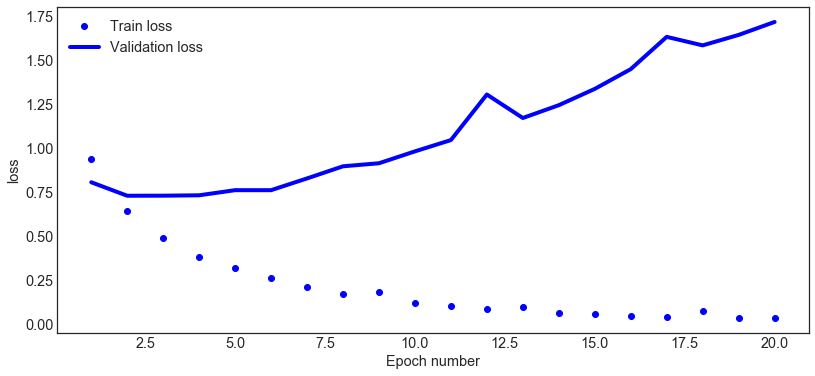

In [194]:
eval_metric(base_model, base_history, 'loss')

### Reduced Model
Reducing the model by removing one hidden layer and lowering the number of elements in the remaining layer to 16

In [195]:
reduced_model = models.Sequential()
reduced_model.add(layers.Dense(16, activation='relu', input_shape=(NB_WORDS,)))
reduced_model.add(layers.Dense(3, activation='softmax'))
reduced_model.name = 'Reduced model'
reduced_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
Total params: 160,067
Trainable params: 160,067
Non-trainable params: 0
_________________________________________________________________


In [196]:
reduced_history = deep_model(reduced_model, X_train_rest, y_train_rest, X_valid, y_valid)
reduced_min = optimal_epoch(reduced_history)

Minimum validation loss reached in epoch 8


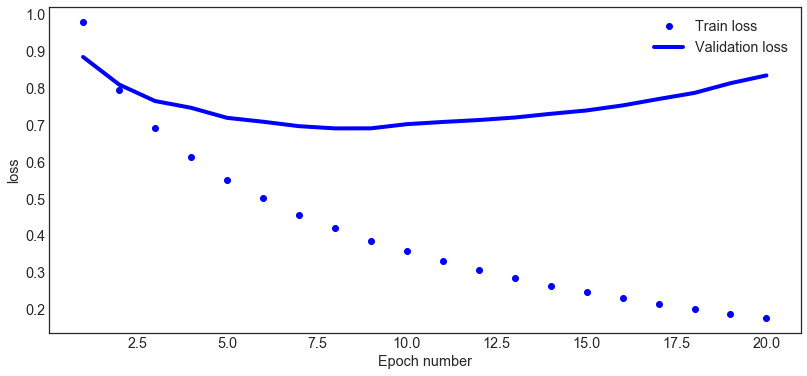

In [197]:
eval_metric(reduced_model, reduced_history, 'loss')

More epochs before the reduced model starts overfitting(in base model it was 2 and now in reduced model it was 7). The validation loss also goes up slower than first base model.

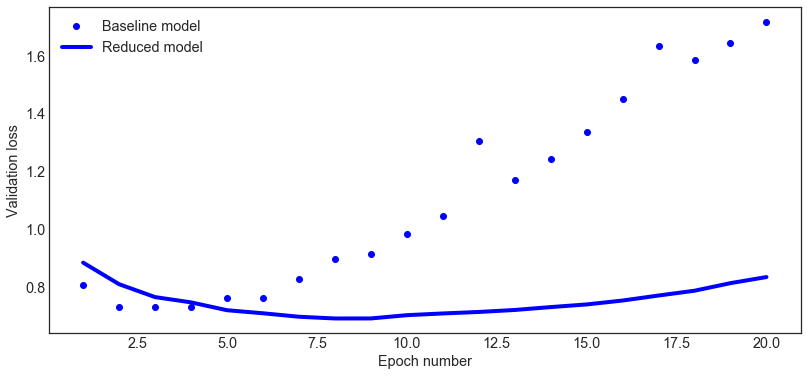

In [198]:
compare_models_by_metric(base_model, reduced_model, base_history, reduced_history, 'val_loss')

When we compare the validation loss of the baseline model, it is clear that the reduced model starts overfitting at a later epoch. The validation loss stays lower much longer than the baseline model

### Applying Regularization

In [199]:
reg_model = models.Sequential()
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NB_WORDS,)))
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
reg_model.add(layers.Dense(3, activation='softmax'))
reg_model.name = 'L1 & L2 Regularization model'
reg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [200]:
reg_history = deep_model(reg_model, X_train_rest, y_train_rest, X_valid, y_valid)
reg_min = optimal_epoch(reg_history)

Minimum validation loss reached in epoch 3


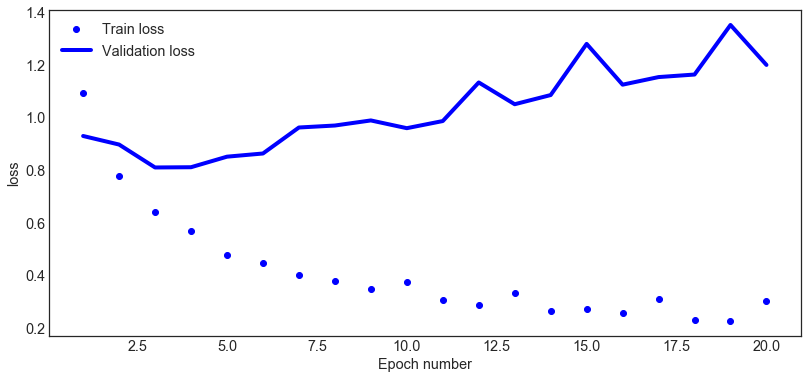

In [201]:
eval_metric(reg_model, reg_history, 'loss')

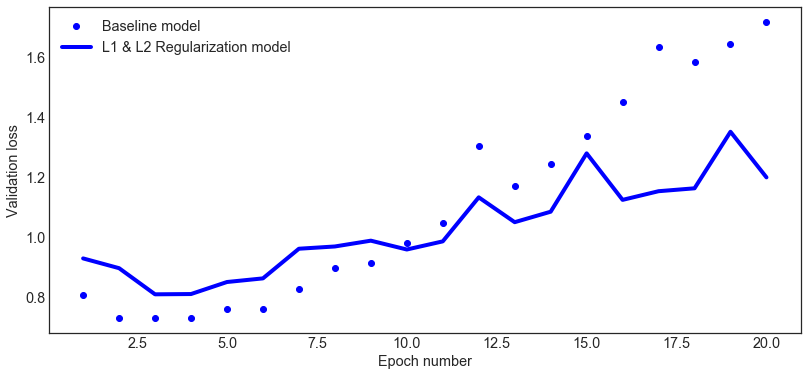

In [202]:
compare_models_by_metric(base_model, reg_model, base_history, reg_history, 'val_loss')

For the regularized model we notice that it starts overfitting in the same epoch as the baseline model. However, the loss increases much slower afterwards.

### Applying Dropouts

In [203]:
drop_model = models.Sequential()
drop_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(64, activation='relu'))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(3, activation='softmax'))
drop_model.name = 'Dropout layers model'
drop_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                640064    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [204]:
drop_history = deep_model(drop_model, X_train_rest, y_train_rest, X_valid, y_valid)
drop_min = optimal_epoch(drop_history)

Minimum validation loss reached in epoch 5


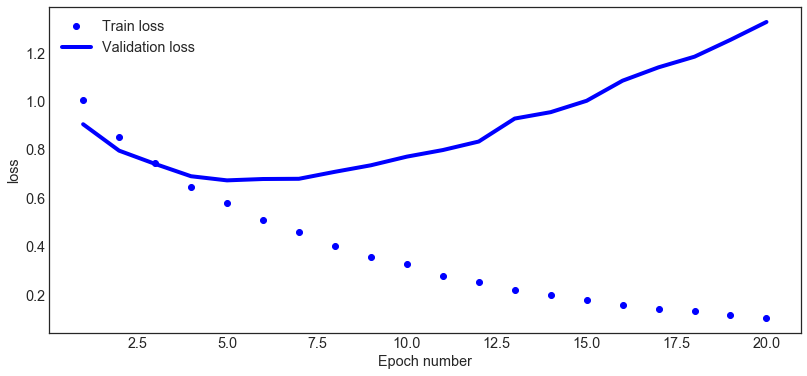

In [205]:
eval_metric(drop_model, drop_history, 'loss')

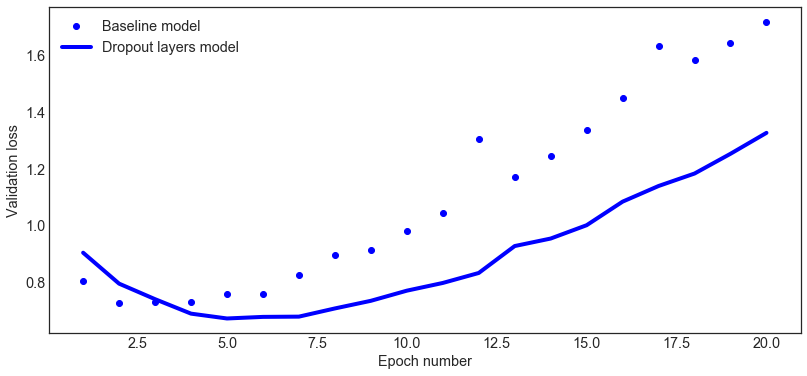

In [206]:
compare_models_by_metric(base_model, drop_model, base_history, drop_history, 'val_loss')

The model with the Dropout layers starts overfitting later Compared to the baseline model but at the same epoch as reduced model the loss also remains much lower.

#### At first sight the reduced model seems to be the best model. But let's check that on the test set.

### Training on the full train data and evaluation on test data

In [207]:
base_results = test_model(base_model, X_train_oh, y_train_oh, X_test_oh, y_test_oh, base_min)

944/944 [==============================] - 0s 331us/step

Test accuracy: 65.57%


In [208]:
reduced_results = test_model(reduced_model, X_train_oh, y_train_oh, X_test_oh, y_test_oh, reduced_min)

944/944 [==============================] - 0s 212us/step

Test accuracy: 66.84%


In [209]:
reg_results = test_model(reg_model, X_train_oh, y_train_oh, X_test_oh, y_test_oh, reg_min)

944/944 [==============================] - 0s 320us/step

Test accuracy: 66.95%


In [210]:
drop_results = test_model(drop_model, X_train_oh, y_train_oh, X_test_oh, y_test_oh, drop_min)

944/944 [==============================] - 0s 306us/step

Test accuracy: 66.84%


#### We can conclude that the base model performs well on test data with accuracy of 66.94

<a id='dep'></a>
### Task 1.12: Deploying Machine Learning model to production using Flask

#### The better Test accuracy was from the Logistic Regression TF-IDF Vectors 70.9060% , with precision 70.96 and recall 70.94. With this model for review text Sentiment classification I have created app.py API and deployed it  using Flask, it is the Python micro framework for building web applications.This API allows us to utilize the predictive capabilities through HTTP requests.

### Procdedure for Deploying the app

#### - 1. Save the model as app.py
#### - 2. Unzip the HotelClassification folder which is attached with this code
#### - 3. The Folder structure looks like below
HotelClassification/
    Train.csv
    app.py
    templates/
        home.html
        result.html
    static/
        style.css
#### - 4. Open Command prompt and navigate to the HotelClassification Folder
#### - 5. Execute "python app.py"
#### - 6. Now our web server runnning on local host with flask http://127.0.0.0
#### - 7. Open the URL in any web browser and input your review and click on predict
#### - 8. Based on the input review text it will classified as Excellent/Good/Bad and display the output

In [4]:
import os

In [5]:
os.chdir("D:\PhD")

In [6]:
from IPython.display import Image

#### Running the API

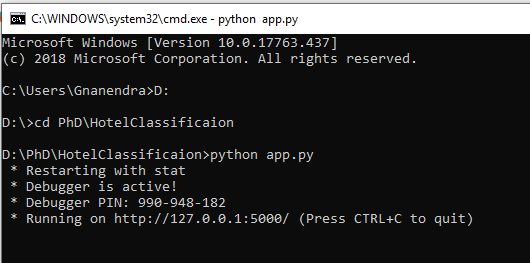

In [9]:
Image(filename='running_app.PNG', width = 600, height = 600)

#### Entering the Review text

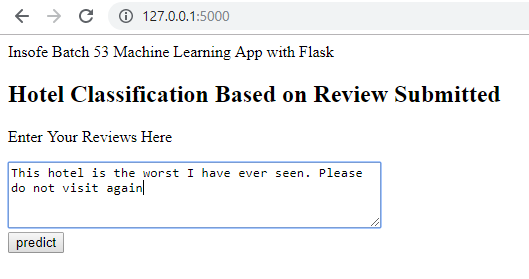

In [10]:
Image(filename='input.PNG', width = 600, height = 600)

#### Predicting the Sentiment Class

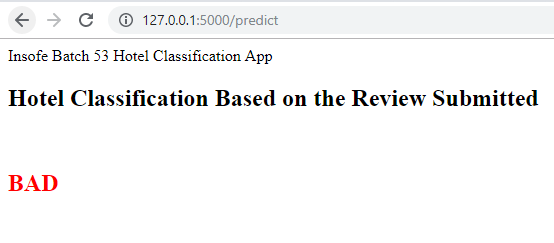

In [11]:
Image(filename='predict.PNG', width = 600, height = 600)

### From the above the review is classified as bad, we can say that our Hotel Classification model predicting well

<a id='task2'></a>
# Task 2: Hotel Segmentation

<a id='seg'></a>
### Task 2.1: Reading and Exploring the Data

In [595]:
existing_hotels = pd.read_csv("ExistingHotels_CustomerVisitsdata-1554810038262.csv", parse_dates=[3])
new_hotels = pd.read_csv("NewHotels_CutstomerVisitsdata-1554810098964.csv", parse_dates=[3])

#### While reading the data I have provided parse_dates for the conversion of Date column to datetime format

In [596]:
print ('Existing Hotels data has {0} rows and {1} columns'.format(existing_hotels.shape[0],existing_hotels.shape[1]))
print ('New Hostels data has {0} rows and {1} columns'.format(new_hotels.shape[0],new_hotels.shape[1]))

Existing Hotels data has 7504 rows and 15 columns
New Hostels data has 2469 rows and 15 columns


In [597]:
pd.set_option('max_colwidth', 500)

#### Removing the Dollar sign from the Average Pricing column

In [598]:
existing_hotels['AveragePricing'] = existing_hotels['AveragePricing'].str.replace('$', '').astype('int64')
new_hotels['AveragePricing'] = new_hotels['AveragePricing'].str.replace('$', '').astype('int64')

In [599]:
dtype_df = existing_hotels.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df
dtype_df.groupby("Column Type").aggregate('count').reset_index()

Column Type  Count
0  datetime64[ns]      1
1           int64     10
2         float64      1
3          object      3

#### Checking Unique Value Counts

In [600]:
unique_counts = pd.DataFrame.from_records([(col, existing_hotels[col].nunique()) for col in existing_hotels.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

Column_Name  Num_Unique
6                  Value_rating           6
7                  Rooms_rating           6
8               Location_rating           6
9            Cleanliness_rating           6
10               Checkin_rating           6
11               Service_rating           6
12       Businessservice_rating           6
13  AverageOverallRatingOfHotel           6
5          HelpfulToNoOfreaders          36
4                   NoOfReaders          48
14               AveragePricing          66
0                       Hotelid          75
3                          Date        1696
1                        userid        7313
2                    reviewtext        7504

#### Extracting Date column for the analysis

In [601]:
dates = existing_hotels['Date']

#### Feature Engineering the Date and getting new values like quarter, month, week, day from it

In [602]:
date_expanded = pd.DataFrame({"year": dates.dt.year,
              "month": dates.dt.month,
              "dayofmonth": dates.dt.day,
              "dayofyear": dates.dt.dayofyear,
              "week": dates.dt.week,
              "weekofyear": dates.dt.weekofyear,
              "dayofweek": dates.dt.dayofweek,
              "weekday": dates.dt.weekday,
              "quarter": dates.dt.quarter,
             })

In [603]:
date_expanded['quarter'] = date_expanded['quarter'].map({1: 'Quarter 1', 2: "Quarter 2", 3:'Quarter 3', 4: 'Quarter 4'})
date_expanded['month'] = date_expanded['month'].map({1: 'Jan', 2: "Feb", 3:'Mar', 4: 'Apr',5: 'May', 6: "Jun", 7:'Jul', 8: 'Aug',9: 'Sep', 10: "Oct", 11:'Nov', 12: 'Dec'})
date_expanded['dayofweek'] = date_expanded['dayofweek'].map({0: 'Monday', 1: "Tuesday", 2:'Wednesday', 4: 'Thursday',5: 'Friday', 6: "Saturday", 7:'Sunday'})

In [604]:
date_expanded.head(3)

year month  dayofmonth  dayofyear  week  weekofyear dayofweek  weekday  \
0  2008   Dec          13        348    50          50    Friday        5   
1  2008   Dec           2        337    49          49   Tuesday        1   
2  2008   Nov          18        323    47          47   Tuesday        1   

     quarter  
0  Quarter 4  
1  Quarter 4  
2  Quarter 4

#### Let us look at the no of reviews given in each year

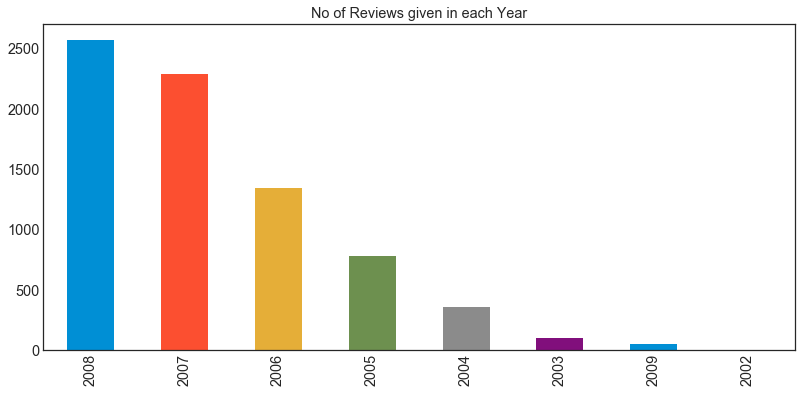

In [605]:
date_expanded['year'].value_counts().plot.bar(title="No of Reviews given in each Year")

#### Quarter Wise Reviews

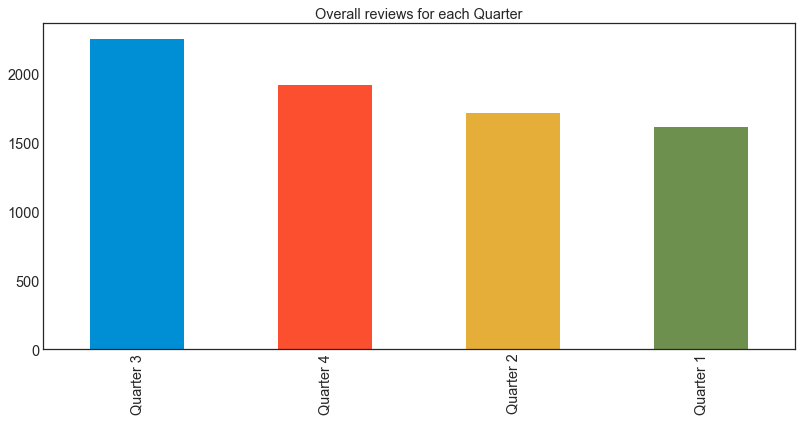

In [606]:
date_expanded['quarter'].value_counts().plot.bar(title= "Overall reviews for each Quarter")

#### Month Wise Reviews

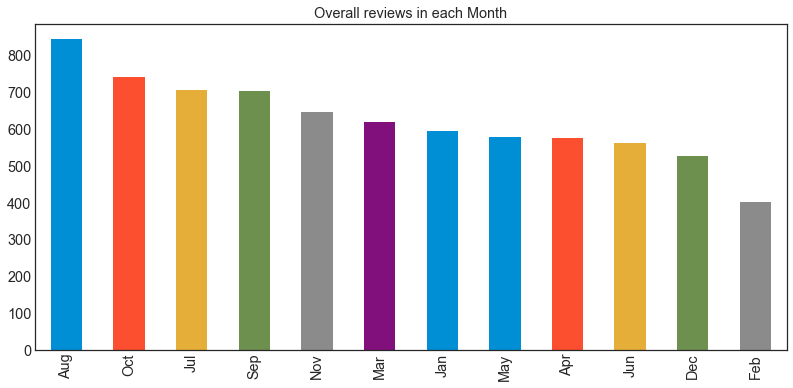

In [607]:
date_expanded['month'].value_counts().plot.bar(title= "Overall reviews in each Month")

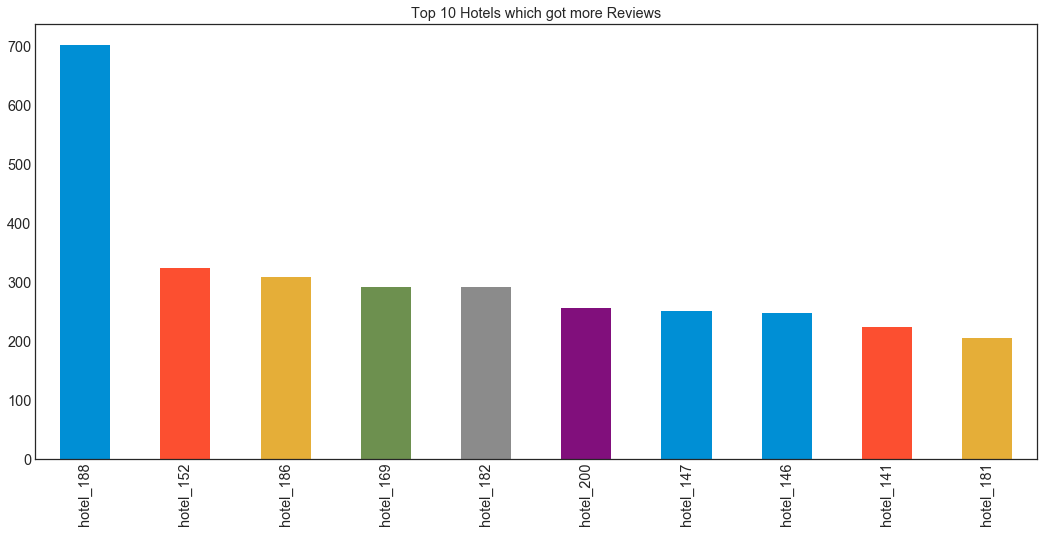

In [608]:
existing_hotels['Hotelid'].value_counts().head(10).plot.bar(title= "Top 10 Hotels which got more Reviews",figsize = (16,8))

#### Hotel 188 more no of reviews, nearly 700

In [609]:
existing_hotels = pd.concat([existing_hotels, date_expanded], axis=1)

#### Exploring the Hotel_188 for further insighs

In [610]:
hotelid_avgrating = pd.crosstab(index=existing_hotels["AverageOverallRatingOfHotel"], 
                             columns=[existing_hotels["Hotelid"]])   # Include row and column totals

hotelid_avgrating

Hotelid                      hotel_101  hotel_102  hotel_103  hotel_106  \
AverageOverallRatingOfHotel                                               
2.0                                  0          0          0          0   
2.5                                  0          0          0          0   
3.0                                  0          0          0          0   
3.5                                 40          0          0          0   
4.0                                  0         86         56         64   
4.5                                  0          0          0          0   

Hotelid                      hotel_107  hotel_108  hotel_109  hotel_110  \
AverageOverallRatingOfHotel                                               
2.0                                  0          0          0          0   
2.5                                  0          0          0          0   
3.0                                  0         16          0          0   
3.5                                 39          0         18         46   
4.0                                  0          0          0          0   
4.5                                  0          0          0          0   

Hotelid                      hotel_111  hotel_112  hotel_113  hotel_116  \
AverageOverallRatingOfHotel                                               
2.0                                  0          0          0          0   
2.5                                  0          0          0          0   
3.0                                 38         38          0         26   
3.5                                  0          0          0          0   
4.0                                  0          0         42          0   
4.5                                  0          0          0          0   

Hotelid                      hotel_117  hotel_118  hotel_121  hotel_122  \
AverageOverallRatingOfHotel                                               
2.0                                  0          0          0          0   
2.5                                  0          0          0          0   
3.0                                  0          0          0          0   
3.5                                 22        203          0          0   
4.0                                  0          0          0        100   
4.5                                  0          0         34          0   

Hotelid                      hotel_123  hotel_124  hotel_127  hotel_128  \
AverageOverallRatingOfHotel                                               
2.0                                  0          0          0          0   
2.5                                  0          0          0          0   
3.0                                  0          0          0          0   
3.5                                  0         31        202          0   
4.0                                159          0          0        115   
4.5                                  0          0          0          0   

Hotelid                      hotel_129  hotel_132  hotel_135  hotel_137  \
AverageOverallRatingOfHotel                                               
2.0                                  0          0          0          0   
2.5                                  0          0          0          0   
3.0                                  0         34          0          0   
3.5                                 56          0          0         47   
4.0                                  0          0        189          0   
4.5                                  0          0          0          0   

Hotelid                      hotel_138  hotel_139  hotel_140  hotel_141  \
AverageOverallRatingOfHotel                                               
2.0                                  0          0         14          0   
2.5                                  0          0          0          0   
3.0                                  0          0          0          0   
3.5                

In [611]:
hotel_188 = hotelid_avgrating['hotel_188']

In [612]:
hotel_188

AverageOverallRatingOfHotel
2.0      0
2.5      0
3.0      0
3.5      0
4.0    703
4.5      0
Name: hotel_188, dtype: int64

Text(0,0.5,'No Of Reviews')

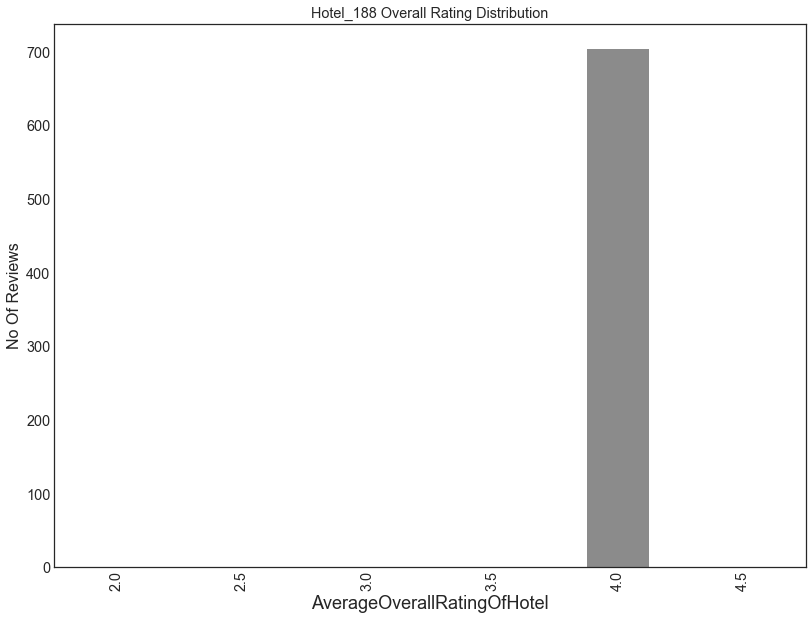

In [613]:
hotel_188.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Hotel_188 Overall Rating Distribution" )
plt.xlabel('AverageOverallRatingOfHotel', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

#### Suprisingly, the hotel with more no of reviews got 4 rating for all the reviews

#### Let us look at year wise rating for Hotel_188

In [614]:
hotelid_year_sentiment = pd.crosstab(index=existing_hotels["AverageOverallRatingOfHotel"], 
                             columns=[existing_hotels["Hotelid"],existing_hotels['year']])   # Include row and column totals

hotelid_year_sentiment
hotel_188_year = hotelid_year_sentiment['hotel_188']

Text(0,0.5,'No Of Reviews')

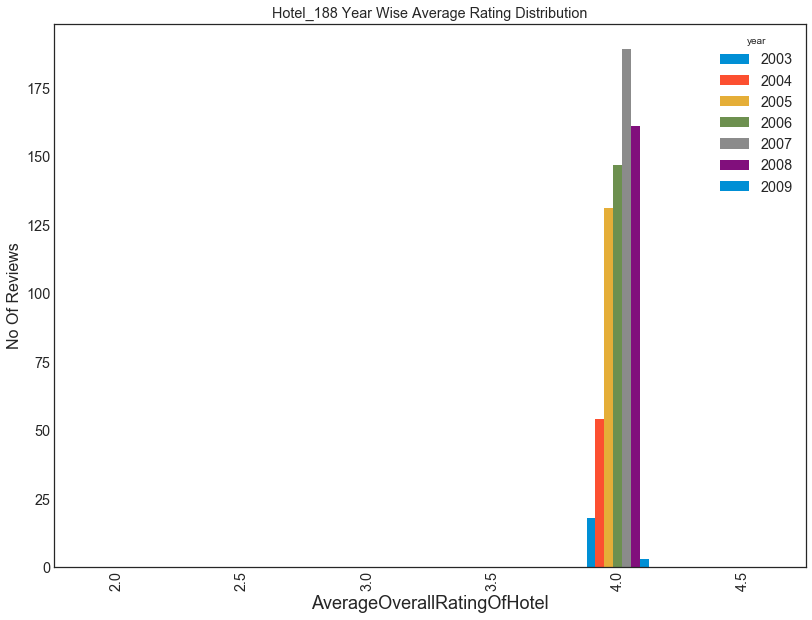

In [615]:
hotel_188_year.plot(kind="bar", 
                 figsize=(12,10),
                 stacked=False, title= "Hotel_188 Year Wise Average Rating Distribution" )
plt.xlabel('AverageOverallRatingOfHotel', fontsize=18)
plt.ylabel('No Of Reviews', fontsize=16)

In [616]:
existing_hotels.columns

Index(['Hotelid', 'userid', 'reviewtext', 'Date', 'NoOfReaders',
       'HelpfulToNoOfreaders', 'Value_rating', 'Rooms_rating',
       'Location_rating', 'Cleanliness_rating', 'Checkin_rating',
       'Service_rating', 'Businessservice_rating',
       'AverageOverallRatingOfHotel', 'AveragePricing', 'year', 'month',
       'dayofmonth', 'dayofyear', 'week', 'weekofyear', 'dayofweek', 'weekday',
       'quarter'],
      dtype='object')

In [686]:
existing_hotels.columns

Index(['Hotelid', 'reviewtext', 'NoOfReaders', 'HelpfulToNoOfreaders',
       'Value_rating', 'Rooms_rating', 'Location_rating', 'Cleanliness_rating',
       'Checkin_rating', 'Service_rating', 'Businessservice_rating',
       'AverageOverallRatingOfHotel', 'AveragePricing', 'tokens', 'num_words',
       'bins', 'length', 'word_count', 'char_count', 'Polarity Score',
       'Neutral Score', 'Negative Score', 'Positive Score', 'Rating'],
      dtype='object')

In [ ]:
existing_hotels[existing_hotels['pric'] < 100].sample(100).plot.scatter(x='price', y='points')

In [617]:
existing_hotels = existing_hotels[["Hotelid","reviewtext", "NoOfReaders", "HelpfulToNoOfreaders", "Value_rating", "Rooms_rating", "Location_rating", "Cleanliness_rating", "Checkin_rating", "Service_rating", "Businessservice_rating", "AverageOverallRatingOfHotel", "AveragePricing"]]
new_hotels = new_hotels[["Hotelid","reviewtext", "NoOfReaders", "HelpfulToNoOfreaders", "Value_rating", "Rooms_rating", "Location_rating", "Cleanliness_rating", "Checkin_rating", "Service_rating", "Businessservice_rating", "AverageOverallRatingOfHotel", "AveragePricing"]]

#### Standardizing review text in existing hotels and in new hotels

In [618]:
existing_hotels = standardize_text(existing_hotels, "reviewtext")
new_hotels = standardize_text(new_hotels, "reviewtext")

#### Removing punctuations from review text

In [619]:
existing_hotels['reviewtext'] = existing_hotels['reviewtext'].apply(remove_punctuation)
new_hotels['reviewtext'] = new_hotels['reviewtext'].apply(remove_punctuation)

#### Removing Stop words

In [620]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['hotel','one','us','stay','day','us','night','also','room', 'rooms']
stopwords.extend(newStopWords)

In [621]:
existing_hotels['reviewtext'] = existing_hotels['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
new_hotels['reviewtext'] = new_hotels['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

#### Tokenizing the review text

In [622]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
existing_hotels["tokens"] = existing_hotels["reviewtext"].apply(tokenizer.tokenize)
new_hotels["tokens"] = new_hotels["reviewtext"].apply(tokenizer.tokenize)

<a id='seg1'></a>
### Task 2.1 Creating new feature from text for segmentation

#### Getting new feature "No of Words" from review text

In [623]:
existing_hotels['num_words'] = existing_hotels.reviewtext.apply(lambda x : len(x.split()))
new_hotels['num_words'] = new_hotels.reviewtext.apply(lambda x : len(x.split()))

#### Binning the no of words

In [624]:
bins=[0,50,75, np.inf]
existing_hotels['bins']=pd.cut(existing_hotels.num_words, bins=[0,100,200,300,400,500, np.inf], labels=['0-100', '100-200', '200-000','300-400','400-500' ,'>500'])
new_hotels['bins']=pd.cut(new_hotels.num_words, bins=[0,100,200,300,400,500, np.inf], labels=['0-100', '100-200', '200-000','300-400','400-500' ,'>500'])

#### Understanding the word distributions for Existing and New

In [625]:
word_distribution_existing = existing_hotels.groupby('bins').size().reset_index().rename(columns={0:'counts'})
word_distribution_existing.head(10)

bins  counts
0    0-100    5590
1  100-200    1575
2  200-000     261
3  300-400      48
4  400-500      18
5     >500      12

In [626]:
word_distribution_new = new_hotels.groupby('bins').size().reset_index().rename(columns={0:'counts'})
word_distribution_new.head(10)

bins  counts
0    0-100    1794
1  100-200     537
2  200-000      95
3  300-400      26
4  400-500      10
5     >500       7

#### Getting the text length of review text

In [627]:
def length(text):    
    return len(text)

In [628]:
existing_hotels['length'] = existing_hotels['reviewtext'].apply(len)
new_hotels['length'] = new_hotels['reviewtext'].apply(len)

#### Getting the no of words columns from review text

In [629]:
existing_hotels['word_count'] = existing_hotels['reviewtext'].apply(lambda x: len(str(x).split(" ")))
new_hotels['word_count'] = new_hotels['reviewtext'].apply(lambda x: len(str(x).split(" ")))

#### Getting the no of characters from review text

In [630]:
existing_hotels['char_count'] = existing_hotels['reviewtext'].str.len() ## this also includes space
new_hotels['char_count'] = new_hotels['reviewtext'].str.len() 

#### Sentiment Analysis of Review Text Using Sentiment Intensity Analyzer, This will add a new column called rating based on polarity score obtained from reviewtext

#### For Existing hotels

In [631]:
# Pre-Processing
import nltk
nltk.download('vader_lexicon')
SIA = SentimentIntensityAnalyzer()
existing_hotels["reviewtext"]= existing_hotels["reviewtext"].astype(str)

# Applying Model, Variable Creation
existing_hotels['Polarity Score']=existing_hotels["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['compound'])
existing_hotels['Neutral Score']=existing_hotels["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['neu'])
existing_hotels['Negative Score']=existing_hotels["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['neg'])
existing_hotels['Positive Score']=existing_hotels["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
existing_hotels['Rating']=''
existing_hotels.loc[existing_hotels['Polarity Score']>0,'Rating']='Positive'
existing_hotels.loc[existing_hotels['Polarity Score']==0,'Rating']='Neutral'
existing_hotels.loc[existing_hotels['Polarity Score']<0,'Rating']='Negative'


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Gnanendra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### For New hotels

In [632]:
# Pre-Processing
import nltk
nltk.download('vader_lexicon')
SIA = SentimentIntensityAnalyzer()
new_hotels["reviewtext"]= new_hotels["reviewtext"].astype(str)

# Applying Model, Variable Creation
new_hotels['Polarity Score']=new_hotels["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['compound'])
new_hotels['Neutral Score']=new_hotels["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['neu'])
new_hotels['Negative Score']=new_hotels["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['neg'])
new_hotels['Positive Score']=new_hotels["reviewtext"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
new_hotels['Rating']=''
new_hotels.loc[new_hotels['Polarity Score']>0,'Rating']='Positive'
new_hotels.loc[new_hotels['Polarity Score']==0,'Rating']='Neutral'
new_hotels.loc[new_hotels['Polarity Score']<0,'Rating']='Negative'


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Gnanendra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [633]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
existing_hotels['reviewtext']= existing_hotels['reviewtext'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
new_hotels['reviewtext']= new_hotels['reviewtext'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

#### Saving the files to disk for later user

In [634]:
existing_hotels.to_csv("Existing_Hotels_Final.csv")
new_hotels.to_csv("New_Hotels_Final.csv")

#### Dropping the columns not required

In [635]:
print(existing_hotels.shape)
print(new_hotels.shape)

(7504, 24)
(2469, 24)


In [636]:
existing_hotels1 = existing_hotels.drop(['reviewtext','tokens','bins','length','word_count', 'char_count','Rating'],axis=1)

In [637]:
new_hotels1 = new_hotels.drop(['reviewtext','tokens','bins','length','word_count', 'char_count','Rating'],axis=1)

<a id='avg'></a>
### Task 1.3: Grouping the Hotels by averaging thier respective ratings

In [638]:
ratings_vr = existing_hotels1.groupby(['Hotelid'])[['Value_rating']].mean().rename(columns = {'Value_rating':'Mean_value_rating'}).reset_index()
ratings_nr =  existing_hotels1.groupby(['Hotelid'])[['NoOfReaders']].mean().rename(columns = {'NoOfReaders':'Mean_No_readers'}).reset_index()
ratings_hnr =  existing_hotels1.groupby(['Hotelid'])[['HelpfulToNoOfreaders']].mean().rename(columns = {'HelpfulToNoOfreaders':'Mean_H_No_readers'}).reset_index()
ratings_rr =  existing_hotels1.groupby(['Hotelid'])[['Rooms_rating']].mean().rename(columns = {'Rooms_rating':'Mean_rooms_rating'}).reset_index()
ratings_lr =  existing_hotels1.groupby(['Hotelid'])[['Location_rating']].mean().rename(columns = {'Location_rating':'Mean_location_rating'}).reset_index()
ratings_cr =  existing_hotels1.groupby(['Hotelid'])[['Cleanliness_rating']].mean().rename(columns = {'Cleanliness_rating':'Mean_cleanliess_rating'}).reset_index()
ratings_chr =  existing_hotels1.groupby(['Hotelid'])[['Checkin_rating']].mean().rename(columns = {'Checkin_rating':'Mean_checkin_rating'}).reset_index()
ratings_sr =  existing_hotels1.groupby(['Hotelid'])[['Service_rating']].mean().rename(columns = {'Service_rating':'Mean_service_rating'}).reset_index()
ratings_bsr =  existing_hotels1.groupby(['Hotelid'])[['Businessservice_rating']].mean().rename(columns = {'Businessservice_rating':'Mean_bus_service_rating'}).reset_index()
ratings_avgor =  existing_hotels1.groupby(['Hotelid'])[['AverageOverallRatingOfHotel']].mean().rename(columns = {'AverageOverallRatingOfHotel':'Mean_avg_overall_rating'}).reset_index()
ratings_avgpr =  existing_hotels1.groupby(['Hotelid'])[['AveragePricing']].mean().rename(columns = {'AveragePricing':'Mean_avg_pricing'}).reset_index()
ratings_nw = existing_hotels1.groupby(['Hotelid'])[['num_words']].mean().rename(columns = {'num_words':'Mean_no_words'}).reset_index()
ratings_ps = existing_hotels1.groupby(['Hotelid'])[['Polarity Score']].mean().rename(columns = {'Polarity Score':'Mean_pol_score'}).reset_index()
ratings_nus = existing_hotels1.groupby(['Hotelid'])[['Neutral Score']].mean().rename(columns = {'Neutral Score':'Mean_neu_score'}).reset_index()
ratings_neg = existing_hotels1.groupby(['Hotelid'])[['Negative Score']].mean().rename(columns = {'Negative Score':'Mean_neg_score'}).reset_index()
ratings_pos = existing_hotels1.groupby(['Hotelid'])[['Positive Score']].mean().rename(columns = {'Positive Score':'Mean_pos_score'}).reset_index()


In [641]:
ratings_vr_new = new_hotels1.groupby(['Hotelid'])[['Value_rating']].mean().rename(columns = {'Value_rating':'Mean_value_rating'}).reset_index()
ratings_nr_new =  new_hotels1.groupby(['Hotelid'])[['NoOfReaders']].mean().rename(columns = {'NoOfReaders':'Mean_No_readers'}).reset_index()
ratings_hnr_new =  new_hotels1.groupby(['Hotelid'])[['HelpfulToNoOfreaders']].mean().rename(columns = {'HelpfulToNoOfreaders':'Mean_H_No_readers'}).reset_index()
ratings_rr_new =  new_hotels1.groupby(['Hotelid'])[['Rooms_rating']].mean().rename(columns = {'Rooms_rating':'Mean_rooms_rating'}).reset_index()
ratings_lr_new =  new_hotels1.groupby(['Hotelid'])[['Location_rating']].mean().rename(columns = {'Location_rating':'Mean_location_rating'}).reset_index()
ratings_cr_new =  new_hotels1.groupby(['Hotelid'])[['Cleanliness_rating']].mean().rename(columns = {'Cleanliness_rating':'Mean_cleanliess_rating'}).reset_index()
ratings_chr_new =  new_hotels1.groupby(['Hotelid'])[['Checkin_rating']].mean().rename(columns = {'Checkin_rating':'Mean_checkin_rating'}).reset_index()
ratings_sr_new =  new_hotels1.groupby(['Hotelid'])[['Service_rating']].mean().rename(columns = {'Service_rating':'Mean_service_rating'}).reset_index()
ratings_bsr_new =  new_hotels1.groupby(['Hotelid'])[['Businessservice_rating']].mean().rename(columns = {'Businessservice_rating':'Mean_bus_service_rating'}).reset_index()
ratings_avgor_new =  new_hotels1.groupby(['Hotelid'])[['AverageOverallRatingOfHotel']].mean().rename(columns = {'AverageOverallRatingOfHotel':'Mean_avg_overall_rating'}).reset_index()
ratings_avgpr_new =  new_hotels1.groupby(['Hotelid'])[['AveragePricing']].mean().rename(columns = {'AveragePricing':'Mean_avg_pricing'}).reset_index()
ratings_nw_new = new_hotels1.groupby(['Hotelid'])[['num_words']].mean().rename(columns = {'num_words':'Mean_no_words'}).reset_index()
ratings_ps_new = new_hotels1.groupby(['Hotelid'])[['Polarity Score']].mean().rename(columns = {'Polarity Score':'Mean_pol_score'}).reset_index()
ratings_nus_new = new_hotels1.groupby(['Hotelid'])[['Neutral Score']].mean().rename(columns = {'Neutral Score':'Mean_neu_score'}).reset_index()
ratings_neg_new = new_hotels1.groupby(['Hotelid'])[['Negative Score']].mean().rename(columns = {'Negative Score':'Mean_neg_score'}).reset_index()
ratings_pos_new = new_hotels1.groupby(['Hotelid'])[['Positive Score']].mean().rename(columns = {'Positive Score':'Mean_pos_score'}).reset_index()


In [642]:
ratings_nr_new.shape

(25, 2)

In [643]:
print(existing_hotels1.shape)
print(new_hotels1.shape)

(7504, 17)
(2469, 17)


In [644]:
existing_hotels1.head()

Hotelid  NoOfReaders  HelpfulToNoOfreaders  Value_rating  Rooms_rating  \
0  hotel_101            0                     0             4             4   
1  hotel_101            0                     0             2             4   
2  hotel_101            0                     0             2             4   
3  hotel_101            0                     0             5             5   
4  hotel_101            0                     0             5             6   

   Location_rating  Cleanliness_rating  Checkin_rating  Service_rating  \
0                1                   4               4               4   
1                3                   3               1               2   
2                3                   4               2               3   
3                6                   6               5               5   
4                6                   6               6               1   

   Businessservice_rating  AverageOverallRatingOfHotel  AveragePricing  \
0                       3                          3.5             245   
1                       2                          3.5             245   
2                       1                          3.5             245   
3                       3                          3.5             245   
4                       6                          3.5             245   

   num_words  Polarity Score  Neutral Score  Negative Score  Positive Score  
0         49         -0.8274          0.715           0.220           0.064  
1         32         -0.0516          0.833           0.086           0.081  
2        192          0.9175          0.835           0.042           0.123  
3         55          0.7964          0.723           0.078           0.200  
4         62          0.9898          0.551           0.000           0.449

In [645]:
existing_hotels1.dtypes

Hotelid                         object
NoOfReaders                      int64
HelpfulToNoOfreaders             int64
Value_rating                     int64
Rooms_rating                     int64
Location_rating                  int64
Cleanliness_rating               int64
Checkin_rating                   int64
Service_rating                   int64
Businessservice_rating           int64
AverageOverallRatingOfHotel    float64
AveragePricing                   int64
num_words                        int64
Polarity Score                 float64
Neutral Score                  float64
Negative Score                 float64
Positive Score                 float64
dtype: object

In [646]:
existing_hotels1 = existing_hotels1.convert_objects(convert_numeric=True)
new_hotels1 = new_hotels1.convert_objects(convert_numeric=True)

#### Creating a list to apply merge on HotelID and other columns

In [647]:
print(existing_hotels1.shape)
print(new_hotels1.shape)

(7504, 17)
(2469, 17)


In [649]:
df =existing_hotels1

In [650]:
df_list = [ratings_vr, ratings_rr, ratings_lr, ratings_cr, ratings_chr, ratings_sr, ratings_bsr, ratings_avgor,ratings_avgpr,ratings_nw,ratings_ps,ratings_nus,ratings_neg,ratings_pos]

In [651]:
df = df_list[0]
for df_ in df_list[1:]:
    df = df.merge(df_, on='Hotelid')

In [653]:
existing_hotels_final = df

In [654]:
existing_hotels_final.head()

Hotelid  Mean_value_rating  Mean_rooms_rating  Mean_location_rating  \
0  hotel_101           3.700000           4.075000              3.625000   
1  hotel_102           4.453488           4.116279              3.883721   
2  hotel_103           4.321429           4.303571              3.642857   
3  hotel_106           4.203125           4.312500              4.140625   
4  hotel_107           4.333333           4.179487              3.846154   

   Mean_cleanliess_rating  Mean_checkin_rating  Mean_service_rating  \
0                4.350000             3.875000             3.750000   
1                4.511628             4.011628             4.593023   
2                4.232143             3.321429             4.285714   
3                4.593750             4.156250             4.296875   
4                4.564103             3.666667             4.025641   

   Mean_bus_service_rating  Mean_avg_overall_rating  Mean_avg_pricing  \
0                 2.850000                      3.5               245   
1                 2.093023                      4.0               192   
2                 2.446429                      4.0               231   
3                 3.093750                      4.0               173   
4                 3.128205                      3.5               172   

   Mean_no_words  Mean_pol_score  Mean_neu_score  Mean_neg_score  \
0      62.750000        0.706657        0.601450        0.077000   
1      88.244186        0.881974        0.620151        0.038581   
2      82.375000        0.763955        0.615857        0.052911   
3      59.734375        0.853180        0.568078        0.058859   
4      68.846154        0.751179        0.600256        0.077385   

   Mean_pos_score  
0        0.321450  
1        0.341233  
2        0.331357  
3        0.373062  
4        0.322308

In [655]:
df1 =new_hotels1

In [656]:
df1_list = [ratings_vr_new, ratings_rr_new, ratings_lr_new, ratings_cr_new, ratings_chr_new, ratings_sr_new, ratings_bsr_new, ratings_avgor_new,ratings_avgpr_new,ratings_nw_new,ratings_ps_new,ratings_nus_new,ratings_neg_new,ratings_pos_new]

In [658]:
df1 = df1_list[0]
for df1_ in df1_list[1:]:
    df1 = df1.merge(df1_, on='Hotelid')

In [660]:
new_hotels_final = df1

In [661]:
print(existing_hotels_final.shape)
print(new_hotels_final.shape)

(75, 15)
(25, 15)


In [662]:
existing_avg_ratings = existing_hotels_final
new_avg_ratings =new_hotels_final

In [663]:
existing_avg_ratings = existing_avg_ratings.drop(['Hotelid'], axis=1)
new_avg_ratings = new_avg_ratings.drop(['Hotelid'], axis = 1)

In [664]:
warnings.filterwarnings('ignore')

<a id='std'></a>
### Task 1.4: Standardizing the data

In [665]:
from sklearn.preprocessing import StandardScaler
# Create the scaler object with a range of 0-1
scaler = StandardScaler()
# Fit on the training data
scaler.fit(existing_avg_ratings)
# Transform both the training and testing data
existing_avg_ratings1 = scaler.transform(existing_avg_ratings)

In [666]:
scaler.fit(new_avg_ratings)
# Transform both the training and testing data
new_avg_ratings1 = scaler.transform(new_avg_ratings)

<a id='kmeans'></a>
### Task 2.5: Building KMeans Algorithm

#### Finding the optimal no of clusters using elbow method

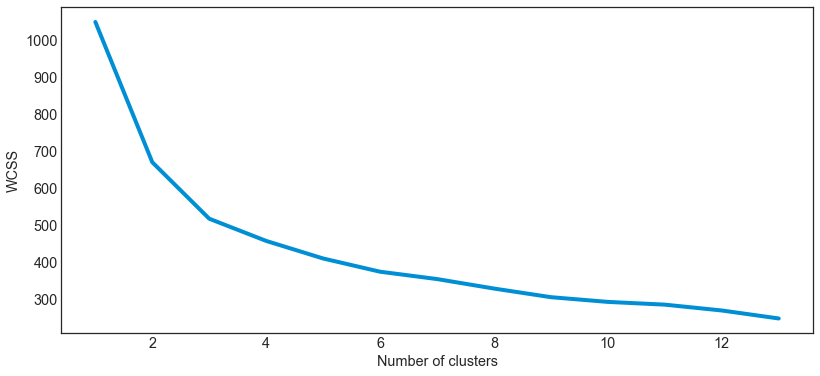

In [667]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,14):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(existing_avg_ratings1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,14),wcss)
#plt.title("The Elbow Method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Training KMeans algorithm with 3 clusters

In [668]:
existing_avg_ratings2 = pd.DataFrame(existing_avg_ratings1)
# Applying k-means to the hotels dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(existing_avg_ratings2)

existing_avg_ratings2 = existing_avg_ratings2.as_matrix(columns=None)

#### Creating a data frame with Hotelid and Cluster id

In [671]:
Hotelid = existing_hotels_final['Hotelid']
result = pd.DataFrame({'Hotelid':Hotelid, 'cluster_id' : y_kmeans})

In [678]:
result.shape

(75, 2)

In [673]:
result.tail()

Hotelid  cluster_id
70  hotel_192           0
71  hotel_193           2
72  hotel_195           1
73  hotel_198           1
74  hotel_200           0

#### Visualizing the Cluster of existing hotels

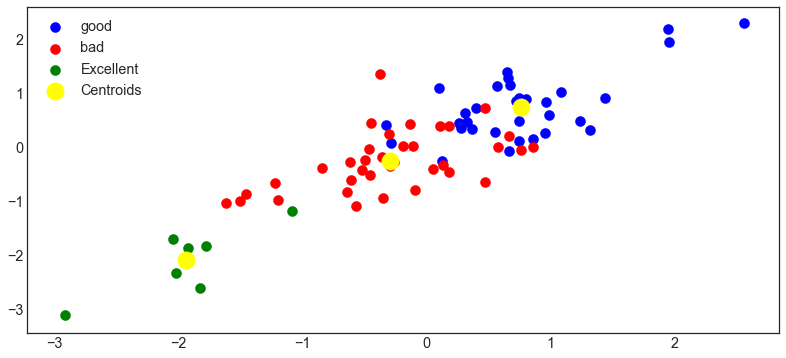

In [674]:
# Visualising the clusters
plt.scatter(existing_avg_ratings2[y_kmeans == 0, 0], existing_avg_ratings2[y_kmeans == 0,1],s=100,c='blue',label= 'good')
plt.scatter(existing_avg_ratings2[y_kmeans == 1, 0], existing_avg_ratings2[y_kmeans == 1,1],s=100,c='red',label='bad')
plt.scatter(existing_avg_ratings2[y_kmeans == 2, 0], existing_avg_ratings2[y_kmeans == 2,1],s=100,c='green',label='Excellent')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

#plt.title('Clusters of hotels')
plt.legend()
plt.show()

<a id='new'></a>
### Task 2.6: Predicting the trained KMeans on new hotels data

In [675]:
new_avg_ratings2 = pd.DataFrame(new_avg_ratings1)

In [676]:
new_kmeans = kmeans.predict(new_avg_ratings2)

In [677]:
new_avg_ratings2 = new_avg_ratings2.as_matrix(columns=None)

In [679]:
new_Hotelid = new_hotels_final['Hotelid']
result_new = pd.DataFrame({'Hotelid':new_Hotelid, 'cluster_id' : new_kmeans})

In [680]:
result_new.shape

(25, 2)

In [681]:
result_new.head()

Hotelid  cluster_id
0  hotel_104           0
1  hotel_105           1
2  hotel_114           1
3  hotel_115           0
4  hotel_119           1

#### Visulaizing the clusters on new hotels (25 Hotels)

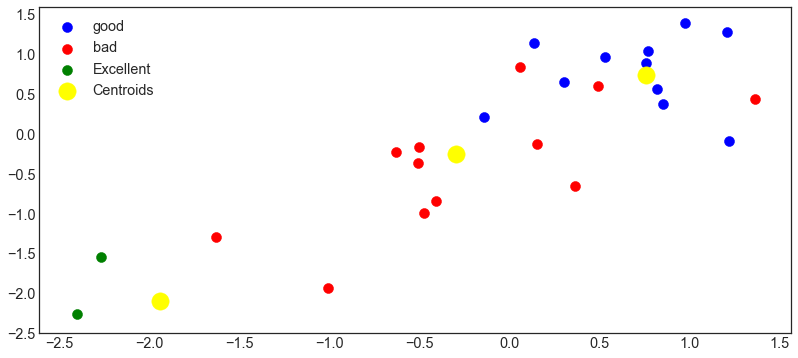

In [685]:
# Visualising the clusters
plt.scatter(new_avg_ratings2[new_kmeans == 0, 0], new_avg_ratings2[new_kmeans == 0,1],s=100,c='blue',label= 'good')
plt.scatter(new_avg_ratings2[new_kmeans == 1, 0], new_avg_ratings2[new_kmeans == 1,1],s=100,c='red',label='bad')
plt.scatter(new_avg_ratings2[new_kmeans == 2, 0], new_avg_ratings2[new_kmeans == 2,1],s=100,c='green',label='Excellent')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

#plt.title('Clusters of hotels')
plt.legend()
plt.show()

<a id='con'></a>
#### Conclusion: We have used k-means to cluster the Hotels according to their ratings. This lead us to clusters of Hotels with similar ratings and thus generally a similar taste in Hotels. Based on this, when one user did not have a rating for a certain hotel we averaged the ratings of all the other users in the cluster, and that was our guess to how that particular user would like the hotel.

<a id='task3'></a>
## Task 3: Building Recommendation System on User Ratings

In [1]:
import pandas as pd
import os
import numpy as np
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD, evaluate

import warnings; warnings.simplefilter('ignore')

<a id='recread'></a>
### Task 3.1: Reading and Analysing the ratings data

In [2]:
os.chdir("D:\PhD")

In [3]:
ratings = pd.read_csv("user_hotel_rating-1555730075105.csv")

In [5]:
ratings.head()

userid    Hotelid  OverallRating
0  user_78131  hotel_558              3
1  user_78131  hotel_603              2
2  user_78131  hotel_610              3
3  user_78131  hotel_574              3
4  user_78131  hotel_570              3

In [6]:
print("Total Data:")
print("Total number of hotel ratings = "+str(ratings.shape[0]))
print("Number of unique user reviews = "+str(len(np.unique(ratings["userid"]))))
print("Number of unique hotels = "+str(len(np.unique(ratings["Hotelid"]))))

Total Data:
Total number of hotel ratings = 271935
Number of unique user reviews = 5010
Number of unique hotels = 130


In [7]:
rating_count = ratings.groupby('Hotelid')['OverallRating'].count().reset_index().sort_values('OverallRating', ascending=False)

In [9]:
rating_count.head()

Hotelid  OverallRating
99   hotel_608           2489
50   hotel_557           2487
49   hotel_555           2487
47   hotel_552           2487
110  hotel_620           2487

#### Distribution of ratings

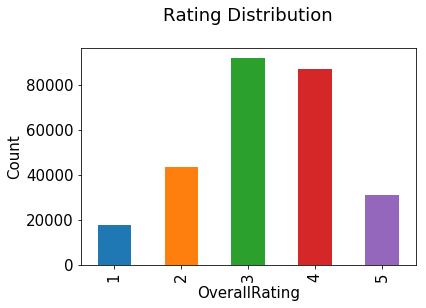

In [10]:
plt.rc("font", size=15)
ratings.OverallRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('OverallRating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

#### Out of 271935 ratings nearly 1 lakh reviews got Overall rating as 3

#### Let us find the hotel which got moreratings and its overall rating

In [12]:
average_rating = pd.DataFrame(ratings.groupby('Hotelid')['OverallRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('Hotelid')['OverallRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

OverallRating  ratingCount
Hotelid                              
hotel_608       3.490960         2489
hotel_557       3.098110         2487
hotel_555       3.076799         2487
hotel_552       2.675111         2487
hotel_620       2.863691         2487

#### hotel_608 got 2489 ratings and its overall rating is 3.49, which is heigest among all other hotels

#### Let us find the user who gave more ratings and no of ratings he given

In [13]:
rating_count_user = pd.DataFrame(ratings.groupby('userid')['OverallRating'].count())
rating_count_user.sort_values('OverallRating', ascending=False).head()

OverallRating
userid                   
user_42069             69
user_60087             67
user_56548             67
user_60192             65
user_61675             64

#### user_42069 gave overall 69 ratings

In [15]:
ratings.head(2)

userid    Hotelid  OverallRating
0  user_78131  hotel_558              3
1  user_78131  hotel_603              2

<a id='cor'></a>
### Task 3.2 : Building Recommendation system based on correlations

   Out of two recommender systems, here I will be using the item based because I am considering that a user based system could be influenced by the change of hotel taste in the time by people and also because having less hotels than users, will fasten our calculations.  <rb>
   
   Before calculate all correlations and prepare our data for it, let’s make quick considerations: with this model we do not have a mathematical way to calculate the accuracy of the model, but we can try to use the common sense and intuition. For example one thing that we can do is to consider if we have in our list hotels that we know already can be correlated.   <rb>
    
   For example let us consider the hotel "hotel_608" which got more ratings and overall avg rating is 3.5. The idea is that if someone visited this hotel and rated high, I would expect he also likes other hotels which are having hight overall ratings. In this case hotel_557 has secong highest overall rating.

#### Before starting with correlations we need to have all the ratings of a hotel in columns, the rows will represent the users and the date in the table will be ratings

In [16]:
ratings = ratings.pivot_table(index = 'userid', columns='Hotelid', values= 'OverallRating')

In [17]:
ratings.head()

Hotelid     hotel_501  hotel_502  hotel_503  hotel_504  hotel_506  hotel_507  \
userid                                                                         
user_21002        NaN        3.0        NaN        3.0        3.0        NaN   
user_21025        NaN        NaN        NaN        2.0        NaN        NaN   
user_21042        NaN        NaN        NaN        NaN        4.0        NaN   
user_21051        NaN        2.0        5.0        NaN        5.0        NaN   
user_21054        NaN        1.0        NaN        1.0        NaN        3.0   

Hotelid     hotel_508  hotel_509  hotel_510  hotel_511    ...      hotel_630  \
userid                                                    ...                  
user_21002        4.0        NaN        3.0        NaN    ...            4.0   
user_21025        NaN        3.0        3.0        2.0    ...            NaN   
user_21042        3.0        NaN        3.0        NaN    ...            NaN   
user_21051        NaN        NaN        NaN        NaN    ...            5.0   
user_21054        4.0        2.0        NaN        4.0    ...            4.0   

Hotelid     hotel_631  hotel_632  hotel_633  hotel_634  hotel_635  hotel_636  \
userid                                                                         
user_21002        NaN        NaN        3.0        NaN        NaN        NaN   
user_21025        2.0        NaN        NaN        4.0        2.0        NaN   
user_21042        NaN        2.0        NaN        NaN        NaN        2.0   
user_21051        5.0        NaN        NaN        5.0        5.0        5.0   
user_21054        NaN        NaN        NaN        3.0        2.0        1.0   

Hotelid     hotel_637  hotel_639  hotel_640  
userid                                       
user_21002        3.0        NaN        NaN  
user_21025        NaN        3.0        3.0  
user_21042        NaN        2.0        NaN  
user_21051        5.0        NaN        5.0  
user_21054        2.0        4.0        4.0  

[5 rows x 130 columns]

#### Let us calculate the correlation of the hotel_608 with other hotels

In [18]:
X = ratings["hotel_608"]

In [20]:
X.head()

userid
user_21002    3.0
user_21025    NaN
user_21042    4.0
user_21051    NaN
user_21054    2.0
Name: hotel_608, dtype: float64

In [21]:
corr = ratings.corrwith(X)

In [23]:
corr.sort_values(ascending=False).head()

Hotelid
hotel_608    1.000000
hotel_590    0.703979
hotel_565    0.696535
hotel_612    0.535556
hotel_564    0.495905
dtype: float64

#### From the above we can see that hotel 590 highly correlated with hotel_590 which is the secong highest rated hotel in out data

#### To calculate the correlations we will use Pearson correlation and min_periods=100, this will filter the hotels having greater than 100 ratings

In [24]:
matrix_corr = ratings.corr(method='pearson', min_periods=100)

In [25]:
matrix_corr.head()

Hotelid    hotel_501  hotel_502  hotel_503  hotel_504  hotel_506  hotel_507  \
Hotelid                                                                       
hotel_501        NaN        NaN        NaN        NaN        NaN        NaN   
hotel_502        NaN   1.000000   0.382130   0.447061   0.281131   0.177124   
hotel_503        NaN   0.382130   1.000000   0.452617   0.373025   0.292880   
hotel_504        NaN   0.447061   0.452617   1.000000   0.267348   0.271811   
hotel_506        NaN   0.281131   0.373025   0.267348   1.000000   0.420583   

Hotelid    hotel_508  hotel_509  hotel_510  hotel_511    ...      hotel_630  \
Hotelid                                                  ...                  
hotel_501        NaN        NaN        NaN        NaN    ...            NaN   
hotel_502   0.253560   0.230751   0.369972   0.294717    ...       0.141115   
hotel_503   0.444542   0.399184   0.482901   0.385462    ...       0.254169   
hotel_504   0.303775   0.298945   0.414893   0.406640    ...       0.215417   
hotel_506   0.371972   0.391558   0.389412   0.410366    ...       0.409223   

Hotelid    hotel_631  hotel_632  hotel_633  hotel_634  hotel_635  hotel_636  \
Hotelid                                                                       
hotel_501        NaN        NaN        NaN        NaN        NaN        NaN   
hotel_502   0.419405   0.385323   0.244881   0.294456   0.418357   0.336370   
hotel_503   0.389959   0.405605   0.475923   0.389994   0.393871   0.449530   
hotel_504   0.380266   0.362473   0.443224   0.355919   0.401712   0.390907   
hotel_506   0.345099   0.377968   0.335522   0.456892   0.310593   0.322108   

Hotelid    hotel_637  hotel_639  hotel_640  
Hotelid                                     
hotel_501        NaN        NaN        NaN  
hotel_502   0.323143   0.270584   0.336216  
hotel_503   0.455853   0.313742   0.462383  
hotel_504   0.431199   0.309825   0.412595  
hotel_506   0.413220   0.323251   0.328215  

[5 rows x 130 columns]

In [26]:
matrix_corr.shape

(130, 130)

#### We have calculated the Correlation Matrix for all hotels, having as result a 134x134 matrix where both columns and rows are hotels and the diagonal of the matrix will be all 1 because every hotel is related with itself or Nan in case the hotel has been filtered out with 100 ratings.

#### We have to suggest to the user which are the hotels(output) best match for him with his previous preferences(input)

In [33]:
ratings.iloc[0].dropna()

Hotelid
hotel_502    3.0
hotel_504    3.0
hotel_506    3.0
hotel_508    4.0
hotel_510    3.0
hotel_517    5.0
hotel_519    4.0
hotel_558    4.0
hotel_560    3.0
hotel_561    2.0
hotel_563    3.0
hotel_565    3.0
hotel_568    3.0
hotel_569    2.0
hotel_570    5.0
hotel_572    3.0
hotel_575    3.0
hotel_576    4.0
hotel_578    4.0
hotel_580    3.0
hotel_582    3.0
hotel_583    4.0
hotel_584    3.0
hotel_590    3.0
hotel_594    2.0
hotel_595    3.0
hotel_597    3.0
hotel_599    3.0
hotel_601    5.0
hotel_602    4.0
hotel_603    3.0
hotel_604    4.0
hotel_606    3.0
hotel_608    3.0
hotel_614    3.0
hotel_615    3.0
hotel_622    3.0
hotel_623    4.0
hotel_624    3.0
hotel_626    3.0
hotel_627    3.0
hotel_628    3.0
hotel_630    4.0
hotel_633    3.0
hotel_637    3.0
Name: user_21002, dtype: float64

#### Above are the list of hotels user_21002 already visited and rated as we dropped Nan's from user_21002

#### Creating list of all hotels with all correlations multiplied by ratings (integers from 1 to 5).

In [45]:
# Lets create a series that will contain all the correlations
user_corr = pd.Series()
userid = 1
for Hotelid in ratings.iloc[userid].dropna().index:
    corr_list = matrix_corr[Hotelid].dropna()*ratings.iloc[userid][Hotelid]
    user_corr = user_corr.append(corr_list)


In [46]:
user_corr.head()

hotel_502    0.894122
hotel_503    0.905234
hotel_504    2.000000
hotel_506    0.534696
hotel_507    0.543622
dtype: float64

In [47]:
corr_list.head()

Hotelid
hotel_502    1.008647
hotel_503    1.387150
hotel_504    1.237784
hotel_506    0.984645
hotel_507    0.998325
Name: hotel_640, dtype: float64

#### Using groupby in order to not to have duplicate hotels and also sum their rating

In [48]:
user_corr = user_corr.groupby(user_corr.index).sum()

In [49]:
user_corr.head()

hotel_502    56.771674
hotel_503    67.199964
hotel_504    64.773290
hotel_506    61.230866
hotel_507    60.829418
dtype: float64

#### Creating a list of hotels that users are already rated by checking the correlation and dropping them

In [50]:
hotel_list = []
for i in range(len(ratings.iloc[userid].dropna().index)):
    if ratings.iloc[userid].dropna().index[i] in user_corr:
        hotel_list.append(ratings.iloc[userid].dropna().index[i])
    else:
        pass
user_corr = user_corr.drop(hotel_list)

<a id='corout'></a>
### Task 3.3 : Output of Hotels Recommendation using correlation Model

#### Below we can suggest the user hotels based on hotels he already visited and rated. I am considering top 7 hotels to suggest

In [51]:
print("Dear User, Based on the Hotels you have visited: \n")
for i in ratings.iloc[userid].dropna().index:
    print(i)
print("\n We would suggest you to visit below Hotels \n")
for i in user_corr.sort_values(ascending=False).index[:7]:
    print(i)

Dear User, Based on the Hotels you have visited: 

hotel_504
hotel_509
hotel_510
hotel_511
hotel_513
hotel_514
hotel_516
hotel_519
hotel_522
hotel_523
hotel_524
hotel_527
hotel_529
hotel_532
hotel_533
hotel_534
hotel_537
hotel_538
hotel_539
hotel_542
hotel_545
hotel_547
hotel_549
hotel_550
hotel_561
hotel_562
hotel_563
hotel_568
hotel_572
hotel_573
hotel_580
hotel_583
hotel_584
hotel_587
hotel_593
hotel_596
hotel_597
hotel_599
hotel_601
hotel_602
hotel_603
hotel_604
hotel_607
hotel_610
hotel_614
hotel_617
hotel_619
hotel_622
hotel_623
hotel_625
hotel_626
hotel_627
hotel_629
hotel_631
hotel_634
hotel_635
hotel_639
hotel_640

 We would suggest you to visit below Hotels 

hotel_564
hotel_618
hotel_548
hotel_551
hotel_598
hotel_508
hotel_521


### This is how we can build a memory based recommendation system using correlations, this will recommend the top new hotels to users based on the hotels he already visited and rated

<a id='recmod'></a>
### Task 3.4 : Model based Recommendation system building

In [52]:
rating = pd.read_csv("user_hotel_rating-1555730075105.csv")
rating.columns = ['userid', 'Hotelid', 'OverallRating']

In [53]:
import os
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
import surprise

In [54]:
df = rating

#### To load a dataset from a pandas dataframe, we will use the load_from_df() method, we will also need a Reader object, and the rating_scale parameter must be specified. The dataframe must have three columns, corresponding to the user ids, the item ids, and the ratings in this order. Each row thus corresponds to a given rating.

In [55]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df[['userid', 'Hotelid', 'OverallRating']], reader)

In [57]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


#### Creating a dataframe with results

In [58]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [59]:
surprise_results

test_rmse   fit_time   test_time
Algorithm                                      
KNNBaseline     0.838094  26.494684  139.807301
KNNWithZScore   0.839349  25.577783  126.949869
KNNWithMeans    0.840145  27.739757  143.415830
SVD             0.840761  17.178999    1.202921
KNNBasic        0.854577  26.286378  138.297628
BaselineOnly    0.857478   0.616376    1.056009

#### The lowest RMSE we got is for KNNBaseline algorithm

<a id='knn'></a>
### Task 3.5 KNNBaseline algorithm using paramaeter tuning

In [60]:
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = KNNBaseline(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([0.83804693, 0.83616405, 0.83608386]),
 'fit_time': (26.51553249359131, 25.416637897491455, 25.888919830322266),
 'test_time': (128.76604342460632, 128.84925532341003, 134.1952886581421)}

#### The RMSE we got here is 0.838046 which is little less than the base model RMSE

#### Splitting the data into train and test, training the model and testing 

In [61]:
trainset, testset = train_test_split(data, test_size=0.20)
algo = KNNBaseline(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8315


0.8314995831634472

In [64]:
predictions[2]

Prediction(uid='user_77583', iid='hotel_503', r_ui=3.0, est=2.844311621435168, details={'actual_k': 40, 'was_impossible': False})

#### Creating pandas data frame with all the predictions and inspecting the data

In [62]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['userid', 'Hotelid', 'OverallRating', 'Predictions', 'details'])
df['Iu'] = df.userid.apply(get_Iu)
df['Ui'] = df.Hotelid.apply(get_Ui)
df['err'] = abs(df.Predictions - df.OverallRating)

<a id='bvsw'></a>
### Task 3.6 KNNBaseline model - Best Predictions Vs Worst Predictions

In [65]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [66]:
best_predictions

userid    Hotelid  OverallRating  Predictions  \
11493  user_23379  hotel_627            5.0          5.0   
38956  user_21405  hotel_586            5.0          5.0   
31547  user_26792  hotel_587            5.0          5.0   
10945  user_40958  hotel_593            5.0          5.0   
16607  user_64014  hotel_575            5.0          5.0   
3924   user_21405  hotel_580            5.0          5.0   
31734  user_69860  hotel_630            5.0          5.0   
46037  user_66052  hotel_639            5.0          5.0   
47010  user_74085  hotel_634            5.0          5.0   
50382  user_23379  hotel_585            5.0          5.0   

                                         details  Iu    Ui  err  
11493  {'actual_k': 40, 'was_impossible': False}  49  1885  0.0  
38956  {'actual_k': 40, 'was_impossible': False}  42  1945  0.0  
31547  {'actual_k': 40, 'was_impossible': False}  39  1916  0.0  
10945  {'actual_k': 40, 'was_impossible': False}  44  1935  0.0  
16607  {'actual_k': 40, 'was_impossible': False}  46  1696  0.0  
3924   {'actual_k': 40, 'was_impossible': False}  42  1903  0.0  
31734  {'actual_k': 40, 'was_impossible': False}  48  1943  0.0  
46037  {'actual_k': 40, 'was_impossible': False}  44  1853  0.0  
47010  {'actual_k': 40, 'was_impossible': False}  44  1955  0.0  
50382  {'actual_k': 40, 'was_impossible': False}  49  2013  0.0

In [67]:
worst_predictions

userid    Hotelid  OverallRating  Predictions  \
20830  user_50480  hotel_584            1.0     4.697356   
29962  user_36972  hotel_573            1.0     4.730996   
40623  user_62659  hotel_521            1.0     4.794224   
38564  user_65339  hotel_573            1.0     4.796334   
42268  user_64367  hotel_567            1.0     4.818307   
22714  user_75706  hotel_607            1.0     4.833049   
47168  user_36461  hotel_572            1.0     4.850662   
30733  user_26878  hotel_523            1.0     4.907463   
24196  user_68381  hotel_513            1.0     4.952299   
19035  user_26878  hotel_607            1.0     4.972951   

                                         details  Iu    Ui       err  
20830  {'actual_k': 40, 'was_impossible': False}  42  1870  3.697356  
29962  {'actual_k': 40, 'was_impossible': False}  51  2003  3.730996  
40623  {'actual_k': 40, 'was_impossible': False}  38  1897  3.794224  
38564  {'actual_k': 40, 'was_impossible': False}  49  2003  3.796334  
42268  {'actual_k': 40, 'was_impossible': False}  42  1998  3.818307  
22714  {'actual_k': 40, 'was_impossible': False}  47  1985  3.833049  
47168  {'actual_k': 40, 'was_impossible': False}  46  1848  3.850662  
30733  {'actual_k': 40, 'was_impossible': False}  42  1780  3.907463  
24196  {'actual_k': 40, 'was_impossible': False}  50  1941  3.952299  
19035  {'actual_k': 40, 'was_impossible': False}  42  1985  3.972951

<a id='svd'></a>
### Task 3.7 : Recommendation Engine using model based algorithm (SVD)

In [130]:
ratings = pd.read_csv("user_hotel_rating-1555730075105.csv")

In [131]:
# Removing user_ Sign from userid column and hotel_ from hotelid columns
ratings['Hotelid'] = ratings['Hotelid'].str.replace('hotel_', '').astype('int64')
ratings['userid'] = ratings['userid'].str.replace('user_', '').astype('int64')

In [132]:
ratings.head(2)

userid  Hotelid  OverallRating
0   78131      558              3
1   78131      603              2

In [133]:
n_users = ratings.userid.unique().shape[0]
n_hotels = ratings.Hotelid.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of Hotels = ' + str(n_hotels))

Number of users = 5010 | Number of Hotels = 130


#### Using pivot table to convert one row per user and one column per movie

In [134]:
Ratings = ratings.pivot(index = 'userid', columns ='Hotelid', values = 'OverallRating').fillna(0)

In [135]:
Ratings.head(2)

Hotelid  501  502  503  504  506  507  508  509  510  511 ...   630  631  632  \
userid                                                    ...                   
21002    0.0  3.0  0.0  3.0  3.0  0.0  4.0  0.0  3.0  0.0 ...   4.0  0.0  0.0   
21025    0.0  0.0  0.0  2.0  0.0  0.0  0.0  3.0  3.0  2.0 ...   0.0  2.0  0.0   

Hotelid  633  634  635  636  637  639  640  
userid                                      
21002    3.0  0.0  0.0  0.0  3.0  0.0  0.0  
21025    0.0  4.0  2.0  0.0  0.0  3.0  3.0  

[2 rows x 130 columns]

In [136]:
Ratings.to_csv("Ratings.csv")

In [137]:
Ratings1 = pd.read_csv("Ratings1.csv")

In [138]:
Ratings1.head(2)

Row_no  userid  501  502  503  504  506  507  508  509 ...   630  631  632  \
0       1   21002    0    3    0    3    3    0    4    0 ...     4    0    0   
1       2   21025    0    0    0    2    0    0    0    3 ...     0    2    0   

   633  634  635  636  637  639  640  
0    3    0    0    0    3    0    0  
1    0    4    2    0    0    3    3  

[2 rows x 132 columns]

#### normalize ratings of each users by  mean and convert it from a dataframe to a numpy array.

In [139]:
R = Ratings.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)

#### Setting up SVD

In [140]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

In [141]:
sigma = np.diag(sigma)

In [142]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

#### Creating data frame for predictions

In [143]:
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

Hotelid       501       502       503       504       506       507       508  \
0        1.421711  2.578467  2.198804  4.102824  2.698170  1.113877  4.546845   
1        1.267634  2.387099  1.526894  3.050668  2.436692  1.901982  2.736718   
2        1.130127  1.193146  1.842137  1.353468  5.132136  0.496458  3.681109   
3        2.084745  4.637345  7.132861  2.051363  7.004469  2.182085  1.124913   
4        1.110677  1.263767  2.357511  1.289578  1.817639  5.811811  4.772040   

Hotelid       509       510       511    ...          630       631       632  \
0        1.544424  3.435844  1.427770    ...     3.727534  0.900897  2.149955   
1        3.879747  1.953260  1.837030    ...     2.137318  3.051434  3.365642   
2        0.673854  4.191412  1.514681    ...     1.680593  0.374712  3.226474   
3        3.090875  1.827924  1.629233    ...     7.878621  7.284585  1.868310   
4        2.964819  2.199234  3.218805    ...     3.399571  2.841067  1.757202   

Hotelid       633       634       635       636       637       639       640  
0        3.217377  2.507979  1.499241  1.922172  4.190599  2.200845  2.419727  
1        2.361558  5.261645  3.773936  2.710147  0.878873  3.990151  2.996152  
2        1.485946  1.916444  1.123832  3.037241  1.142092  2.750600  1.152776  
3        2.560925  7.346225  7.004270  7.071337  7.192435  1.861107  7.703493  
4        1.431574  4.458158  2.848928  1.311629  4.577747  4.121669  4.407313  

[5 rows x 130 columns]

#### Function to tell the already visited hotels and recommending top 5 hotels by giving user input

In [125]:
def recommend_hotels(predictions, userid, Ratings1, original_ratings, num_recommendations):
    
    # Get and sort the user's predictions
    user_row_number = Ratings1.loc[Ratings1['userid'] == userid, 'Row_no'].iloc[0] - 1 # Userid starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    # Get the user's data and merge in the hotel information.
    user_data = original_ratings[original_ratings.userid == (userid)]
    user_full = (user_data.sort_values(['OverallRating'], ascending=False)
                 )
    print(user_full.head(2))
    print('User {0} has already rated {1} hotels.'.format(userid, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings hotels not already rated.'.format(num_recommendations))
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (ratings[~ratings['Hotelid'].isin(user_full['Hotelid'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'Hotelid',
               right_on = 'Hotelid').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).drop_duplicates('Hotelid').drop(['userid'],axis=1).iloc[:num_recommendations]
                      )
    return user_full, recommendations
    
    

<a id='svdpred'></a>
### Task 3.8:  Cheking the visted hotels and recommending new hotels for a user

In [128]:
already_rated, predictions = recommend_hotels(preds, 78131, Ratings1, ratings, 5)

    userid  Hotelid  OverallRating
14   78131      628              5
25   78131      639              5
User 78131 has already rated 43 hotels.
Recommending highest 5 predicted ratings hotels not already rated.


In [129]:
predictions

Hotelid  OverallRating  Predictions
8435        632              4     4.160345
158745      608              2     3.717452
167922      583              2     3.610114
117758      616              5     3.214488
94365       572              2     3.056750

In [145]:
already_rated, predictions = recommend_hotels(preds, 21051, Ratings1, ratings, 5)

       userid  Hotelid  OverallRating
46028   21051      630              5
46055   21051      586              5
User 21051 has already rated 53 hotels.
Recommending highest 5 predicted ratings hotels not already rated.


## Business Conclusion

#### With the Machine Learning algorithms I am able to classify the ReviewTest Sentiment, Based on this Sentiment Hotel Management can take actions to improve their service quality to the users

#### With the segmentation of Hotels I am able to segment the new hotels on their respective clusters. Websites like Tripadvisor, Trivago they can use this segmentations to refere the hotels to customers. At the same time hotel management can also take necessary actions to move thier hotel to a upper segment
#### The recommendation system that I built can recommend the hotels to custemers based on thier previous ratings. The recommendations system has the capability to recommend the hotels which were not visitied by the user previously 